# Data clean

In [1]:
# data clean
import pandas as pd
import numpy as np
from datetime import datetime as dt

# stock price
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# statistic descriptive
from scipy.stats import skew
import scipy.stats as scs
from scipy.stats.mstats import winsorize
pd.set_option('display.max_columns', None)    # Display all columns of statistics

# plot graph
import matplotlib.pyplot as plt
import seaborn as sns

# regression model
import statsmodels.api as sma
import statsmodels.formula.api as smf


/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
# Set up files to write output
#outfile = open('output.txt', 'w')



## Financial Data
The financial performance data is sourced from Compustat Daily Updates - Fundamentals Annual, available through WRDS (Wharton Research Data Services). The data period spans from January 2007 to January 2022, focusing on the North American market.
Initial Dataset
The initial dataset contains 24,739 rows of financial performance data.

Filtering Criteria
The data is filtered based on the following criteria:
1. Industry Sector Exclusion: Exclude companies where the gsector (Global Industry Classification Standard (GICS) sector) is equal to 40. This sector typically includes financial companies such as banks, insurance companies, and other financial institutions.
2. Market Value Threshold: Include only companies with a market value equal to or greater than $1000 million. This ensures that the analysis focuses on relatively large companies.


### Load Data

In [2]:
# 1. Read Compustat accounting data
financial_df = pd.read_csv('Financial Performance Raw Data.csv', parse_dates = ['datadate'])
financial_df = financial_df.sort_values(by=['gvkey','datadate'])

# 2. filter the company

#financial_df = financial_df[financial_df['mkvalt'] > 0]

financial_df.head(5)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,NaN,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,-0.556,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1049.8206,26.39,20.0,5080
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.000,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1046.3954,29.54,20.0,5080
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,10.300,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.000,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.300,588.400,0.000,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.000,1750.0,A,1551.4580,44.69,20.0,5080


In [3]:
financial_var = pd.read_excel('Variables Def.xlsx', sheet_name='Financial')
display(financial_var)

,WRDS ITEM,Full Name,Definition,Notes (No need for Appendix),Unnamed: 4
0,act,Current Asset - Total,This item represents cash and other assets tha...,NaN,NaN
1,ap,Account Payable -Trade,This item represents only trade obligations du...,NaN,NaN
2,at,Asset - Total,the total value of assets reported on the Bala...,NaN,NaN
3,che,Cash and Short Investment,This item represents cash and all securities r...,This item is a component of Current Assets - T...,NaN
4,cogs,Cost of Goods Sold,This item represents all costs directly alloca...,NaN,NaN
5,dlc,Debt in Current Liabilities - Total,This item represents the total amount of short...,NaN,NaN
6,dltt,Long-term Debt - Total,The item represents debt obligations due more ...,This item is a component of Liabilities - Tota...,NaN
7,dt,Total Debt Including Current,This item represents the total long-term debt ...,This item was first made available with the Se...,NaN
8,dvc,Dividends Common/Ordinary,This represents the total amount of dividends ...,NaN,NaN
9,ebit,Earnings Before Interest and Taxes,This item is the sum of Sales - Net (SALE) min...,NaN,NaN


In [4]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27466 entries, 0 to 27465
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   gvkey     27466 non-null  int64         
 1   datadate  27466 non-null  datetime64[ns]
 2   fyear     27466 non-null  int64         
 3   indfmt    27466 non-null  object        
 4   consol    27466 non-null  object        
 5   popsrc    27466 non-null  object        
 6   datafmt   27466 non-null  object        
 7   tic       27466 non-null  object        
 8   conm      27466 non-null  object        
 9   curcd     27466 non-null  object        
 10  fyr       27466 non-null  int64         
 11  act       25708 non-null  float64       
 12  ap        27353 non-null  float64       
 13  at        27466 non-null  float64       
 14  che       27464 non-null  float64       
 15  cogs      27452 non-null  float64       
 16  csho      27466 non-null  float64       
 17  dlc       27

In [5]:
# 3. Process the data year
financial_df['year'], financial_df['month'] = financial_df['datadate'].dt.year, financial_df['datadate'].dt.month
financial_df['pfy'] = np.where(financial_df.month < 4, financial_df.year, financial_df.year + 1)

financial_df.head(5)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,NaN,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080,2007,5,2008
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,-0.556,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1049.8206,26.39,20.0,5080,2011,5,2012
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.000,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1046.3954,29.54,20.0,5080,2015,5,2016
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,10.300,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.000,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.300,588.400,0.000,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.000,1750.0,A,1551.4580,44.69,20.0,5080,2018,5,2019


### Check data health

In [6]:
# 4. glance over financial data
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27466 entries, 0 to 27465
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   gvkey     27466 non-null  int64         
 1   datadate  27466 non-null  datetime64[ns]
 2   fyear     27466 non-null  int64         
 3   indfmt    27466 non-null  object        
 4   consol    27466 non-null  object        
 5   popsrc    27466 non-null  object        
 6   datafmt   27466 non-null  object        
 7   tic       27466 non-null  object        
 8   conm      27466 non-null  object        
 9   curcd     27466 non-null  object        
 10  fyr       27466 non-null  int64         
 11  act       25708 non-null  float64       
 12  ap        27353 non-null  float64       
 13  at        27466 non-null  float64       
 14  che       27464 non-null  float64       
 15  cogs      27452 non-null  float64       
 16  csho      27466 non-null  float64       
 17  dlc       27

<AxesSubplot:>

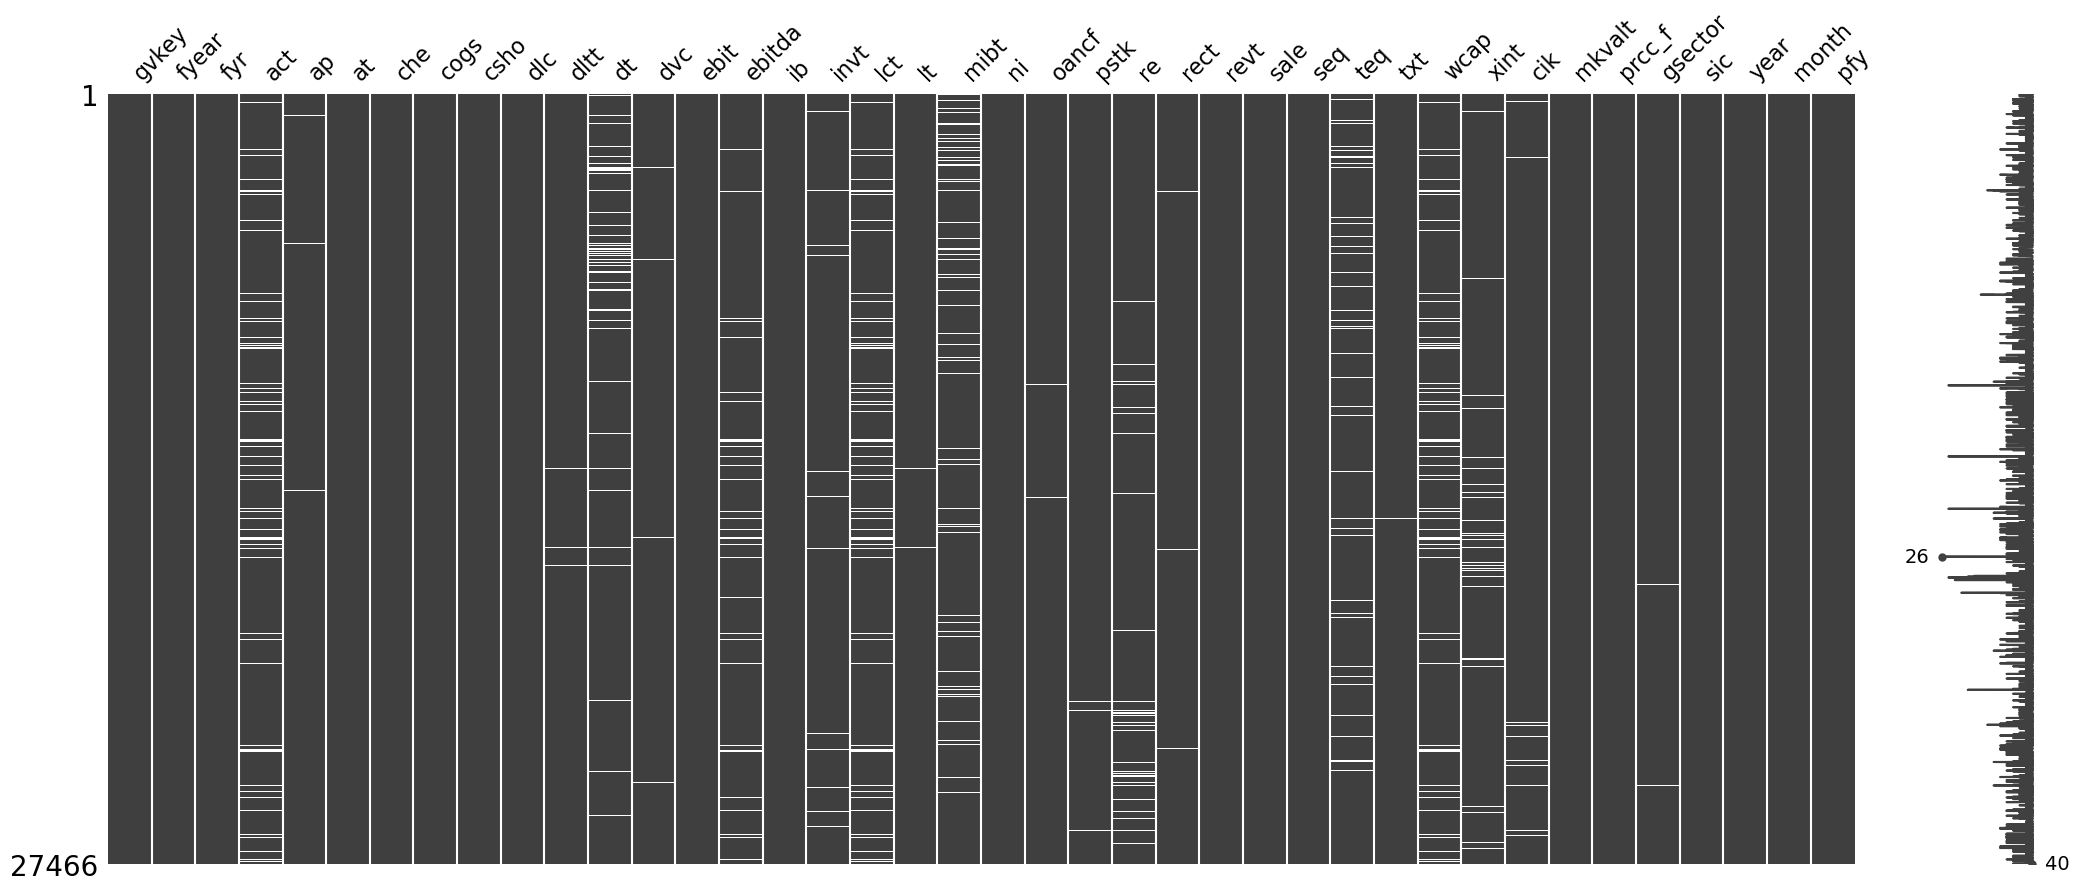

In [7]:
# 5.check data health
# visualise missing values of numeric column
import missingno as msno
#plt.figure(figsize=(10, 6))  # the layout of the graph
msno.matrix(financial_df.select_dtypes(include=[np.number]))
#plt.savefig('missing_data_matrix.jpg', dpi=300)  # sav as JPG
#plt.close()

# the white space in each row indicates missing data.
# The more white spaces a column has, the more missing data points there are

In [8]:
# check missing values of numeric data
columns_to_exclude = ['gvkey', 'fyear', 'fyr', 'sic', 'cik','year','month','pfy','gsector']
missing_values_raw = financial_df.select_dtypes(include=[np.number]).drop(columns=columns_to_exclude).isnull().sum()
missing_values_raw = pd.DataFrame(missing_values_raw, columns=['missing_values_raw'])
missing_values_raw = missing_values_raw.reset_index().rename(columns={'index': 'financial_data'})
missing_values_raw


,financial_data,missing_values_raw
0,act,1758
1,ap,113
2,at,0
3,che,2
4,cogs,14
5,csho,0
6,dlc,0
7,dltt,96
8,dt,1485
9,dvc,110


### Fill missing values

In [9]:
# 6. Explore data by industry
# 按照'fyear'和'gsector'分组
grouped = financial_df.groupby(['fyear','gsector'])

# 筛选财务变量
all_columns = financial_df.select_dtypes(include=['number']).columns.tolist()
financial_variables = [col for col in all_columns if col not in columns_to_exclude]

# 初始化结果字典
results = {var: {} for var in financial_variables}

# 计算每个变量的缺失值、中位数、均值和偏度
for var in financial_variables:
    # 缺失值
    results[var]['missing'] = grouped[var].apply(lambda x: x.isna().sum())

    # 中位数
    results[var]['median'] = grouped[var].median()

    # 均值
    results[var]['mean'] = grouped[var].mean()

    # 偏度
    results[var]['skewness'] = grouped[var].apply(lambda x: skew(x.dropna()))

# 分类偏度
def classify_skewness(skewness):
    if skewness < -0.5:
        return 'Left-skewed'
    elif skewness > 0.5:
        return 'Right-skewed'
    else:
        return 'Centered'

# 添加偏度分类
for var in financial_variables:
    results[var]['skewness_category'] = results[var]['skewness'].apply(classify_skewness)

# 转换结果为DataFrame以便查看
summary_df = pd.DataFrame({var: results[var] for var in financial_variables})
summary_df = summary_df.transpose()
#summary_df
#summary_df.to_csv("output.csv")


In [10]:
# 7. fill missing value using company mean
# 按照'gvkey'分组计算均值用于填补缺失值

df_filled = financial_df.copy()
for var in financial_variables:
    df_filled[var] = financial_df.groupby('gvkey')[var].transform(lambda x: x.fillna(x.mean()))

# 解除公司分组
df_filled = df_filled.reset_index(drop=True)

# 检查填补后每个变量的剩余缺失值
remaining_missing_1 = df_filled[financial_variables].isna().sum()


In [11]:
remaining_missing_after_com_mean = pd.DataFrame(remaining_missing_1, columns=['missing_values_after_com_mean'])
remaining_missing_after_com_mean = remaining_missing_after_com_mean.reset_index().rename(columns={'index': 'financial_data'})

missing_values = pd.merge(missing_values_raw, remaining_missing_after_com_mean, on='financial_data', how='left')
missing_values

,financial_data,missing_values_raw,missing_values_after_com_mean
0,act,1758,1617
1,ap,113,65
2,at,0,0
3,che,2,0
4,cogs,14,5
5,csho,0,0
6,dlc,0,0
7,dltt,96,10
8,dt,1485,1395
9,dvc,110,15


In [12]:
# 8. drop NA
financial_df_clean = df_filled.dropna()
financial_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22207 entries, 0 to 27464
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   gvkey     22207 non-null  int64         
 1   datadate  22207 non-null  datetime64[ns]
 2   fyear     22207 non-null  int64         
 3   indfmt    22207 non-null  object        
 4   consol    22207 non-null  object        
 5   popsrc    22207 non-null  object        
 6   datafmt   22207 non-null  object        
 7   tic       22207 non-null  object        
 8   conm      22207 non-null  object        
 9   curcd     22207 non-null  object        
 10  fyr       22207 non-null  int64         
 11  act       22207 non-null  float64       
 12  ap        22207 non-null  float64       
 13  at        22207 non-null  float64       
 14  che       22207 non-null  float64       
 15  cogs      22207 non-null  float64       
 16  csho      22207 non-null  float64       
 17  dlc       22

In [13]:
# 9. winsorise financial variables
wlimit = 0.05
for var in financial_variables:
  financial_df_clean[var] = winsorize(financial_df_clean[var], limits=[wlimit, wlimit])


/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/2712151983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_df_clean[var] = winsorize(financial_df_clean[var], limits=[wlimit, wlimit])


## Market Information

### Stock Price and Return
Source
The stock return data is sourced from Compustat Daily Updates – Security Monthly. The data period spans from June 2008 to June 2023, focusing on the North American market.
Initial Dataset
The initial dataset contains 415,131 rows of stock return data.
Filtering Criteria
The data is filtered based on the following criteria:
1.	Monthly Closing Price: Include only stocks where the monthly closing price is greater than $10.
2.	Issue Type Code: Include only stocks where the issue type code is equal to 0. This typically indicates common equity issues.
3.	 Industry Sector and Stock Exchange Code: a) Exclude stocks where gsector (Global Industry Classification Standard (GICS) sector) is equal to 40 (financial sector). b) Include stocks with the stock exchange code of 11, 12, or 14. These codes generally correspond to major stock exchanges such as the New York Stock Exchange (NYSE), NASDAQ, and other significant North American exchanges


In [14]:
# 1. Read Compustat monthly stock returns data
stock_df = pd.read_csv('Securities Monthly Raw Data.csv', parse_dates = ['datadate'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502021 entries, 0 to 502020
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gvkey     502021 non-null  int64         
 1   iid       502021 non-null  int64         
 2   datadate  502021 non-null  datetime64[ns]
 3   tic       502021 non-null  object        
 4   cusip     502021 non-null  object        
 5   conm      502021 non-null  object        
 6   prccm     502021 non-null  float64       
 7   trt1m     499411 non-null  float64       
 8   exchg     502021 non-null  int64         
 9   tpci      502021 non-null  int64         
 10  gsector   493564 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 42.1+ MB


In [15]:
stock_var = pd.read_excel('Variables Def.xlsx', sheet_name='Stock')
display(stock_var)

,WRDS ITEM,Full Name,Definition
0,exchg,Stock Exchange,This item identifies the major exchange on whi...
1,iid,Issue ID,This alphanumeric character code uniquely iden...
2,prccm,Price - Close - Monthly,This item contains the absolute close market p...
3,trt1m,Monthly Total Return,This item represents the monthly price appreci...
4,tpci,Issue Type,This item contains the code that identifies th...


In [16]:
# 2. Keep only one (main) class of common stock - primary common share
stock_df = stock_df.sort_values(by=['gvkey','datadate'])
stock_df = stock_df[stock_df['iid'] == 1]

In [17]:
# 3. Create portfolio formation year (pfy) variable, where
#  pfy = current year for Jul-Dec dates and previous year for Jan-Jun dates.
#  This is to facilitate compounding returns over July-June by pfy below.
stock_df['year'], stock_df['month'] = stock_df['datadate'].dt.year, stock_df['datadate'].dt.month
stock_df['pfy'] = np.where(stock_df.month > 6, stock_df.year, stock_df.year - 1)

# 4. Compute monthly return compounding factor (1+monthly return)
stock_df['mthret1'] = 1 + stock_df.trt1m/100
stock_df['mthret2'] = 1 - stock_df.trt1m/100 # short sell

#Keep relevant variables
stock_df = stock_df.sort_values(by=['gvkey','pfy'])
stock_df = stock_df[['gvkey', 'tic', 'datadate', 'month', 'pfy','prccm','mthret1','mthret2']]

stock_df = stock_df.dropna()
stock_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456386 entries, 0 to 502020
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gvkey     456386 non-null  int64         
 1   tic       456386 non-null  object        
 2   datadate  456386 non-null  datetime64[ns]
 3   month     456386 non-null  int64         
 4   pfy       456386 non-null  int64         
 5   prccm     456386 non-null  float64       
 6   mthret1   456386 non-null  float64       
 7   mthret2   456386 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 31.3+ MB


In [18]:
stock_df.head(12)

,gvkey,tic,datadate,month,pfy,prccm,mthret1,mthret2
0,1004,AIR,2006-01-31,1,2005,23.83,0.994990,1.005010
1,1004,AIR,2006-02-28,2,2005,25.31,1.062107,0.937893
2,1004,AIR,2006-03-31,3,2005,28.48,1.125247,0.874753
3,1004,AIR,2006-04-30,4,2005,26.68,0.936798,1.063202
4,1004,AIR,2006-05-31,5,2005,24.08,0.902549,1.097451
5,1004,AIR,2006-06-30,6,2005,22.23,0.923173,1.076827
6,1004,AIR,2006-07-31,7,2006,23.68,1.065227,0.934773
7,1004,AIR,2006-08-31,8,2006,22.31,0.942145,1.057855
8,1004,AIR,2006-09-30,9,2006,23.84,1.068579,0.931421
9,1004,AIR,2006-10-31,10,2006,26.04,1.092282,0.907718


In [19]:
# 5. Compound monthly returns to get annual returns of each pfy,
stock_df['yret'] = stock_df.groupby(['gvkey', 'pfy'])['mthret1'].cumprod() - 1
stock_df['yret_short'] = stock_df.groupby(['gvkey', 'pfy'])['mthret2'].cumprod() - 1 #for short sell
#stock_df

In [20]:
# 6. ensuring only firm-years with 12 mths of return data from Jul-Jun are selected by choosing the 12th observation (11th element) of each pfy for each firm
stock_df_group = stock_df.groupby(['gvkey', 'pfy']).nth(11) #Take the 12th row from each firm year - index start with 0 so we use 11
stock_df_group.head(12)


tic   datadate  month  prccm   mthret1   mthret2      yret  \
gvkey pfy                                                                
1004  2006  AIR 2007-06-30      6  33.01  1.015692  0.984308  0.484927   
      2007  AIR 2008-06-30      6  13.53  0.701763  1.298237 -0.590124   
      2008  AIR 2009-06-30      6  16.05  1.091837  0.908163  0.186253   
      2009  AIR 2010-06-30      6  16.74  0.849746  1.150254  0.042988   
      2010  AIR 2011-06-30      6  27.09  1.026525  0.973475  0.622943   
      2011  AIR 2012-06-30      6  13.48  1.118672  0.881328 -0.495039   
      2012  AIR 2013-06-30      6  21.98  1.095713  0.904287  0.660816   
      2013  AIR 2014-06-30      6  27.56  1.134156  0.865844  0.268179   
      2014  AIR 2015-06-30      6  31.87  1.078876  0.921124  0.168827   
      2015  AIR 2016-06-30      6  23.34  0.956166  1.043834 -0.258247   
      2016  AIR 2017-06-30      6  34.76  0.994848  1.005152  0.504034   
      2017  AIR 2018-06-30      6  46.49  1.040277  0.959723  0.347539   

            yret_short  
gvkey pfy               
1004  2006   -0.359921  
      2007    0.890860  
      2008   -0.327714  
      2009   -0.272863  
      2010   -0.453923  
      2011    0.442202  
      2012   -0.456639  
      2013   -0.274155  
      2014   -0.183650  
      2015    0.117556  
      2016   -0.413793  
      2017   -0.277290

In [24]:
#check data set
stock_df.describe()

,gvkey,month,pfy,prccm,mthret1,mthret2,yret,yret_short
count,456386.000000,456386.000000,456386.000000,456386.000000,456386.000000,456386.000000,456386.000000,456386.000000
mean,60877.440042,6.489167,2014.110676,52.811967,1.044941,0.955059,0.204251,-0.167797
std,67411.115941,3.448320,5.254118,121.109994,15.596234,15.596234,30.445229,23.552898
min,1004.000000,1.000000,2005.000000,10.000100,0.016139,-10498.000000,-0.983861,-10499.000000
25%,10453.000000,3.000000,2010.000000,18.540000,0.953129,0.928340,-0.072627,-0.239049
50%,27364.000000,6.000000,2014.000000,31.300000,1.010804,0.989196,0.055305,-0.088889
75%,120444.000000,9.000000,2019.000000,54.900000,1.071660,1.046871,0.222229,0.034099
max,352262.000000,12.000000,2023.000000,7000.450000,10500.000000,1.983861,12849.005000,4.761341


In [25]:
# 7. winsorize return
stock_df_group['yret_win'] = winsorize(stock_df_group['yret'], limits=[wlimit, wlimit])
stock_df_group['yret_short_win'] = winsorize(stock_df_group['yret_short'], limits=[wlimit, wlimit])
#stock_df_group.to_csv('annual-returns.csv')     # Write annual returns data to ouput CSV file

In [27]:
# Dropping the specified columns and then describing the DataFrame
stock_df_group.drop(columns=['datadate', 'month']).describe()

,prccm,mthret1,mthret2,yret,yret_short,yret_win,yret_short_win
count,30409.000000,30409.000000,30409.000000,30409.000000,30409.000000,30409.000000,30409.000000
mean,60.143530,1.006132,0.993868,0.163783,-0.151366,0.140794,-0.160016
std,131.823083,0.099761,0.099761,0.469150,0.323817,0.341213,0.254521
min,10.020000,0.500481,-0.673275,-0.925187,-3.279332,-0.410693,-0.599227
25%,22.560000,0.951664,0.944123,-0.103217,-0.338202,-0.103217,-0.338202
50%,36.400000,1.002820,0.997180,0.104338,-0.176035,0.104338,-0.176035
75%,62.720000,1.055877,1.048336,0.343453,-0.004283,0.343453,-0.004283
max,6350.620000,2.673275,1.499519,16.201121,4.761341,0.895841,0.377755


In [28]:
# check winsorised annual return rate
stock_df_group = stock_df_group.reset_index()
stock_df_group.info()
display(stock_df_group.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30409 entries, 0 to 30408
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gvkey           30409 non-null  int64         
 1   pfy             30409 non-null  int64         
 2   tic             30409 non-null  object        
 3   datadate        30409 non-null  datetime64[ns]
 4   month           30409 non-null  int64         
 5   prccm           30409 non-null  float64       
 6   mthret1         30409 non-null  float64       
 7   mthret2         30409 non-null  float64       
 8   yret            30409 non-null  float64       
 9   yret_short      30409 non-null  float64       
 10  yret_win        30409 non-null  float64       
 11  yret_short_win  30409 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 2.8+ MB


,gvkey,pfy,tic,datadate,month,prccm,mthret1,mthret2,yret,yret_short,yret_win,yret_short_win
0,1004,2006,AIR,2007-06-30,6,33.01,1.015692,0.984308,0.484927,-0.359921,0.484927,-0.359921
1,1004,2007,AIR,2008-06-30,6,13.53,0.701763,1.298237,-0.590124,0.890860,-0.410693,0.377755
2,1004,2008,AIR,2009-06-30,6,16.05,1.091837,0.908163,0.186253,-0.327714,0.186253,-0.327714
3,1004,2009,AIR,2010-06-30,6,16.74,0.849746,1.150254,0.042988,-0.272863,0.042988,-0.272863
4,1004,2010,AIR,2011-06-30,6,27.09,1.026525,0.973475,0.622943,-0.453923,0.622943,-0.453923


In [29]:
# 8. combine financial data and stock return information
stock_df_group = stock_df_group[['gvkey', 'pfy', 'yret', 'yret_win','yret_short','yret_short_win']]
financial_df_clean = pd.merge(financial_df_clean, stock_df_group, how='inner', on=['gvkey', 'pfy'])
financial_df_clean.info() ## left 14175 data points
financial_df_clean.head(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15807 entries, 0 to 15806
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gvkey           15807 non-null  int64         
 1   datadate        15807 non-null  datetime64[ns]
 2   fyear           15807 non-null  int64         
 3   indfmt          15807 non-null  object        
 4   consol          15807 non-null  object        
 5   popsrc          15807 non-null  object        
 6   datafmt         15807 non-null  object        
 7   tic             15807 non-null  object        
 8   conm            15807 non-null  object        
 9   curcd           15807 non-null  object        
 10  fyr             15807 non-null  int64         
 11  act             15807 non-null  float64       
 12  ap              15807 non-null  float64       
 13  at              15807 non-null  float64       
 14  che             15807 non-null  float64       
 15  co

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,0.0,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080,2007,5,2008,0.186253,0.186253,-0.327714,-0.327714
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,0.0,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1124.8048,26.39,20.0,5080,2011,5,2012,0.660816,0.660816,-0.456639,-0.456639
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.0,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,21.846,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.0,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.300,588.400,0.0,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.000,1750.0,A,1551.4580,44.69,20.0,5080,2018,5,2019,-0.432767,-0.410693,0.248227,0.248227


After combining the financial data(21,879) and stock returns(30,409), the effective data set was reduced to 15,807.

### Beta of Equity

In [30]:
# 1.read data
beta = pd.read_csv('Beta Monthly.csv')
beta.info()
beta.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583001 entries, 0 to 1583000
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   PERMNO  1583001 non-null  int64  
 1   DATE    1583001 non-null  object 
 2   n       1583001 non-null  int64  
 3   RET     1582743 non-null  object 
 4   b_mkt   1581786 non-null  float64
 5   alpha   1581786 non-null  float64
 6   ivol    1564966 non-null  object 
 7   tvol    1570911 non-null  object 
 8   R2      1575458 non-null  object 
 9   exret   1568444 non-null  object 
 10  TICKER  1581256 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 132.9+ MB


,PERMNO,DATE,n,RET,b_mkt,alpha,ivol,tvol,R2,exret,TICKER
0,10001,2007-07-31,12,-5.6667%,-0.3883,0.0315,8.7181%,8.7640%,1.0443%,-14.6554%,EWST
1,10001,2006-09-29,12,-5.4170%,0.4882,-0.0033,9.7135%,9.7665%,1.0831%,-7.2384%,EWST
2,10001,2006-12-29,12,-3.7294%,0.3387,0.0108,8.9024%,8.9252%,0.5094%,-4.4236%,EWST
3,10001,2007-12-31,12,-0.3930%,-0.7981,0.0242,7.9710%,8.2743%,7.1951%,-1.4381%,EWST
4,10001,2008-01-31,12,-0.6082%,-0.4046,0.0189,8.2159%,8.3241%,2.5844%,-5.8940%,EWST


In [31]:
# 2.change the DATE to datetime
beta['DATE'] = pd.to_datetime(beta['DATE'])
beta.DATE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1583001 entries, 0 to 1583000
Series name: DATE
Non-Null Count    Dtype         
--------------    -----         
1583001 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.1 MB


In [32]:
# 3. statistic descriptive of beta
beta.b_mkt.describe()

count    1.581786e+06
mean     9.949199e-01
std      4.983260e+00
min     -1.298480e+03
25%      3.037000e-01
50%      8.958000e-01
75%      1.506000e+00
max      2.905188e+03
Name: b_mkt, dtype: float64

In [33]:
# 4. calculate the year 'pyr'
beta['year'], beta['month'] = beta['DATE'].dt.year, beta['DATE'].dt.month
beta['pfy'] = np.where(beta.month > 6, beta.year, beta.year - 1)

beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583001 entries, 0 to 1583000
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   PERMNO  1583001 non-null  int64         
 1   DATE    1583001 non-null  datetime64[ns]
 2   n       1583001 non-null  int64         
 3   RET     1582743 non-null  object        
 4   b_mkt   1581786 non-null  float64       
 5   alpha   1581786 non-null  float64       
 6   ivol    1564966 non-null  object        
 7   tvol    1570911 non-null  object        
 8   R2      1575458 non-null  object        
 9   exret   1568444 non-null  object        
 10  TICKER  1581256 non-null  object        
 11  year    1583001 non-null  int64         
 12  month   1583001 non-null  int64         
 13  pfy     1583001 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 169.1+ MB


In [34]:
# 5. Calculate annual beta

# Group by 'pfy' and 'TICKER' and calculate the mean of 'b_mkt'
monthly_mean_beta = beta.groupby(['pfy', 'TICKER'])['b_mkt'].mean().reset_index()

# Adjust the mean monthly beta to an annual beta
monthly_mean_beta['annual_beta'] = monthly_mean_beta['b_mkt'] * np.sqrt(12)

# Drop the temporary mean monthly beta column if needed
annual_beta = monthly_mean_beta.drop(columns=['b_mkt'])

# Now, 'monthly_mean_beta' DataFrame contains 'pfy', 'TICKER', and the 'annual_beta'
print(annual_beta)

display(annual_beta.describe())

         pfy TICKER  annual_beta
0       2005      A     6.593513
1       2005     AA     6.017606
2       2005    AAA    -2.599924
3       2005    AAC     4.329203
4       2005   AACC     2.833808
...      ...    ...          ...
150618  2023   ZVSA     5.164802
150619  2023    ZWS     4.023669
150620  2023   ZYME     4.920352
150621  2023   ZYNE    -2.688605
150622  2023   ZYXI     2.808809

[150623 rows x 3 columns]


,pfy,annual_beta
count,150623.000000,150423.000000
mean,2014.604689,3.447483
std,5.589413,13.856169
min,2005.000000,-1102.879657
25%,2010.000000,1.188461
50%,2015.000000,3.121704
75%,2020.000000,5.078440
max,2023.000000,2219.558447


In [35]:
# 6.winsorize the annual beta
annual_beta['annual_beta'] = winsorize(annual_beta['annual_beta'], limits=[wlimit, wlimit])


In [36]:
# after winsorising the annual beta of equity
annual_beta.describe()

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,pfy,annual_beta
count,150623.000000,150623.000000
mean,2014.604689,3.409049
std,5.589413,3.195325
min,2005.000000,-2.129239
25%,2010.000000,1.191449
50%,2015.000000,3.126092
75%,2020.000000,5.089083
max,2023.000000,10.738311


In [37]:
# 7. combine beta and financial data
annual_beta.rename(columns={'TICKER': 'tic'}, inplace=True)
financial_beta_df = pd.merge(financial_df_clean,annual_beta, how = 'left', on = ['tic','pfy'])
financial_beta_df.info()# only 12950 financial and stock data have beta of equity

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15807 entries, 0 to 15806
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gvkey           15807 non-null  int64         
 1   datadate        15807 non-null  datetime64[ns]
 2   fyear           15807 non-null  int64         
 3   indfmt          15807 non-null  object        
 4   consol          15807 non-null  object        
 5   popsrc          15807 non-null  object        
 6   datafmt         15807 non-null  object        
 7   tic             15807 non-null  object        
 8   conm            15807 non-null  object        
 9   curcd           15807 non-null  object        
 10  fyr             15807 non-null  int64         
 11  act             15807 non-null  float64       
 12  ap              15807 non-null  float64       
 13  at              15807 non-null  float64       
 14  che             15807 non-null  float64       
 15  co

### Market Return and Risk-Free Rate

In [38]:
# Importing data from Yahoo

#from pandas_datareader import data as pdr
#import yfinance as yf
#yf.pdr_override()

# Specify the starting and ending dates for the time series
start = dt(2005, 1, 1)
end  = dt(2023, 12, 31)

In [39]:
# Obtain risk-free rate
# we use 10-year US Note as proxy for risk free rate
# ^TNX is CBOE Interest Rate 10 Year T No (^TNX) is an index published by the Chicago Board Options Exchange (CBOE) that tracks the yield on the 10-year U.S.
Rf = pdr.get_data_yahoo('^TNX', start, end)

[*********************100%***********************]  1 of 1 completed


In [40]:
# Use S&P 500 as a proxy for market return
sp500 = pdr.get_data_yahoo('^GSPC', start, end)

[*********************100%***********************]  1 of 1 completed


In [41]:
print(sp500.info())
print('\n')
print(Rf.info())
print('\n')

display(Rf)

display(sp500)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4781 entries, 2005-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4781 non-null   float64
 1   High       4781 non-null   float64
 2   Low        4781 non-null   float64
 3   Close      4781 non-null   float64
 4   Adj Close  4781 non-null   float64
 5   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.5 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4776 entries, 2005-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4776 non-null   float64
 1   High       4776 non-null   float64
 2   Low        4776 non-null   float64
 3   Close      4776 non-null   float64
 4   Adj Close  4776 non-null   float64
 5   Volume     4776 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.2 KB
N

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.257,4.270,4.203,4.220,4.220,0
2005-01-04,4.212,4.307,4.197,4.283,4.283,0
2005-01-05,4.298,4.304,4.255,4.277,4.277,0
2005-01-06,4.288,4.298,4.257,4.272,4.272,0
2005-01-07,4.255,4.313,4.148,4.285,4.285,0
...,...,...,...,...,...,...
2023-12-22,3.852,3.919,3.849,3.901,3.901,0
2023-12-26,3.908,3.908,3.882,3.886,3.886,0
2023-12-27,3.852,3.852,3.785,3.789,3.789,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [42]:
# resample daily data into monthly data
# sp500_annual_return times 100 to show as eg"-1.73%"
sp500_annual_return = sp500['Adj Close'].resample('A').mean().pct_change().mul(100)
print(sp500_annual_return.head())
print('\n')

# Rf_monthly also as "4.3%"
Rf_annual = Rf['Adj Close'].resample('A').mean()
print(Rf_annual.head())

Date
2005-12-31          NaN
2006-12-31     8.551133
2007-12-31    12.722475
2008-12-31   -17.407596
2009-12-31   -22.293958
Freq: A-DEC, Name: Adj Close, dtype: float64


Date
2005-12-31    4.282368
2006-12-31    4.791600
2007-12-31    4.626865
2008-12-31    3.648798
2009-12-31    3.248623
Freq: A-DEC, Name: Adj Close, dtype: float64


In [43]:
# combine Rf and sp500
sp500_annual_return.name = 'S&P500 annual return %'
Rf_annual.name = 'Risk-free rate %'
#sp500_annual_return = sp500_annual_return.rename(columns={'Adj Close': 'S&P500 annual return'})
sp500_annual_return.info() # 191
print('\n')
Rf_annual.info() # 192

data = pd.concat([sp500_annual_return,Rf_annual],axis = 1)
data.head()

<class 'pandas.core.series.Series'>
DatetimeIndex: 19 entries, 2005-12-31 to 2023-12-31
Freq: A-DEC
Series name: S&P500 annual return %
Non-Null Count  Dtype  
--------------  -----  
18 non-null     float64
dtypes: float64(1)
memory usage: 304.0 bytes


<class 'pandas.core.series.Series'>
DatetimeIndex: 19 entries, 2005-12-31 to 2023-12-31
Freq: A-DEC
Series name: Risk-free rate %
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 304.0 bytes


,S&P500 annual return %,Risk-free rate %
Date,,
2005-12-31,NaN,4.282368
2006-12-31,8.551133,4.791600
2007-12-31,12.722475,4.626865
2008-12-31,-17.407596,3.648798
2009-12-31,-22.293958,3.248623


In [44]:
#rename the columns in the data DataFrame
data.rename(columns={'Risk-free rate %': 'rf_rate','S&P500 annual return %': 'sp500_rate'}, inplace=True)

#print the renamed data to verify changes
print(data.head())

            sp500_rate   rf_rate
Date                            
2005-12-31         NaN  4.282368
2006-12-31    8.551133  4.791600
2007-12-31   12.722475  4.626865
2008-12-31  -17.407596  3.648798
2009-12-31  -22.293958  3.248623


In [45]:
#reset index and rename the index column
data.reset_index(inplace=True)

data.head()

,Date,sp500_rate,rf_rate
0,2005-12-31,NaN,4.282368
1,2006-12-31,8.551133,4.791600
2,2007-12-31,12.722475,4.626865
3,2008-12-31,-17.407596,3.648798
4,2009-12-31,-22.293958,3.248623


In [46]:
#rename the columns in the data dataFrame
data.rename(columns={
    'Date': 'datadate'
}, inplace=True)

data['pfy']= data['datadate'].dt.year

print(data.head())
data.info()

    datadate  sp500_rate   rf_rate   pfy
0 2005-12-31         NaN  4.282368  2005
1 2006-12-31    8.551133  4.791600  2006
2 2007-12-31   12.722475  4.626865  2007
3 2008-12-31  -17.407596  3.648798  2008
4 2009-12-31  -22.293958  3.248623  2009
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datadate    19 non-null     datetime64[ns]
 1   sp500_rate  18 non-null     float64       
 2   rf_rate     19 non-null     float64       
 3   pfy         19 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 736.0 bytes


In [47]:
#convert 'datadate' column to datetime
#data['datadate'] = pd.to_datetime(data['datadate'])

#perform left join of data_df into financial_df based on 'datadate'
financial_beta_rf_df = pd.merge(financial_beta_df, data[['sp500_rate','rf_rate','pfy']], on='pfy', how='left')

print(financial_beta_rf_df.info())

display(financial_beta_rf_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15807 entries, 0 to 15806
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gvkey           15807 non-null  int64         
 1   datadate        15807 non-null  datetime64[ns]
 2   fyear           15807 non-null  int64         
 3   indfmt          15807 non-null  object        
 4   consol          15807 non-null  object        
 5   popsrc          15807 non-null  object        
 6   datafmt         15807 non-null  object        
 7   tic             15807 non-null  object        
 8   conm            15807 non-null  object        
 9   curcd           15807 non-null  object        
 10  fyr             15807 non-null  int64         
 11  act             15807 non-null  float64       
 12  ap              15807 non-null  float64       
 13  at              15807 non-null  float64       
 14  che             15807 non-null  float64       
 15  co

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win,annual_beta,sp500_rate,rf_rate
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,0.0,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080,2007,5,2008,0.186253,0.186253,-0.327714,-0.327714,1.893940,-17.407596,3.648798
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,0.0,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1124.8048,26.39,20.0,5080,2011,5,2012,0.660816,0.660816,-0.456639,-0.456639,7.906668,8.812869,1.785852
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.0,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793,4.697870,1.629424,1.832641
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,21.846,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.0,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886,1.225974,12.132648,2.913685
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.300,588.400,0.0,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.000,1750.0,A,1551.4580,44.69,20.0,5080,2018,5,2019,-0.432767,-0.410693,0.248227,0.248227,5.700410,6.086277,2.136333


In [48]:
#calculate the market risk premium
financial_beta_rf_df ['market_premium'] = financial_beta_rf_df ['sp500_rate'] - financial_beta_rf_df ['rf_rate']

#function to calculate the cost of equity using CAPM
def calculate_cost_of_equity(row):
    return row['rf_rate']/100 + row['annual_beta']/100 * row['market_premium']/100

In [49]:
#apply the cost of equity calculation to the DataFrame
financial_beta_rf_df['cost_of_equity'] = financial_beta_rf_df.apply(calculate_cost_of_equity, axis=1)
financial_beta_rf_df.head(5)


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win,annual_beta,sp500_rate,rf_rate,market_premium,cost_of_equity
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,0.0,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080,2007,5,2008,0.186253,0.186253,-0.327714,-0.327714,1.893940,-17.407596,3.648798,-21.056395,0.032500
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,0.0,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1124.8048,26.39,20.0,5080,2011,5,2012,0.660816,0.660816,-0.456639,-0.456639,7.906668,8.812869,1.785852,7.027017,0.023415
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.0,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793,4.697870,1.629424,1.832641,-0.203218,0.018231
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,21.846,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.0,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886,1.225974,12.132648,2.913685,9.218962,0.030267
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.300,588.400,0.0,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.000,1750.0,A,1551.4580,44.69,20.0,5080,2018,5,2019,-0.432767,-0.410693,0.248227,0.248227,5.700410,6.086277,2.136333,3.949943,0.023615


In [50]:
# statistical description
columns_to_describe = financial_variables + ['annual_beta']+['cost_of_equity']+['market_premium']
financial_beta_rf_df[columns_to_describe].describe().round(2)
# the risk premium , sp500_rate, rf_rate and market_premium  have been multiplied by 100
# cost of equity is not magnified by 100 times

,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,mkvalt,prcc_f,annual_beta,cost_of_equity,market_premium
count,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,15807.00,14275.00,14275.00,15807.00
mean,2660.85,552.19,8263.35,852.11,3983.94,197.28,206.24,2114.34,2263.46,141.27,774.19,1095.94,455.27,560.32,1745.06,5068.98,51.51,465.94,849.30,0.00,1882.63,832.70,6556.15,6556.15,2984.21,3073.08,165.45,836.96,105.93,10862.21,58.76,3.88,0.03,6.83
std,3633.92,942.90,11819.78,1205.25,6109.86,249.51,392.94,3281.02,3503.18,277.94,1181.64,1632.01,785.26,874.63,2698.49,7725.51,128.74,805.76,1274.68,0.01,3544.62,1225.24,9554.50,9554.50,4176.58,4295.70,273.72,1118.57,160.09,15041.82,41.68,2.42,0.01,12.58
min,172.96,5.04,391.73,21.85,48.68,26.30,0.00,0.00,0.00,0.00,-147.66,-90.50,-337.81,0.00,48.49,93.93,0.00,-344.69,-65.99,0.00,-2260.13,10.41,145.83,145.83,46.12,57.06,-57.00,-367.34,0.00,1124.80,9.00,-2.13,0.01,-25.54
25%,500.68,42.68,1337.05,131.30,443.84,50.23,0.88,135.01,161.06,0.00,105.06,162.60,47.40,10.90,224.09,578.77,0.00,48.12,123.59,0.00,26.70,115.24,990.78,990.78,557.54,573.33,12.39,154.95,7.42,1996.29,29.36,2.34,0.02,3.76
50%,1129.95,149.51,3088.70,340.00,1408.19,93.60,23.62,688.02,732.69,14.70,286.67,408.77,148.60,173.00,574.53,1742.60,0.00,150.70,311.10,0.00,611.30,324.97,2565.94,2565.94,1211.60,1245.13,54.50,431.25,35.94,4141.54,45.43,3.72,0.03,8.44
75%,2895.46,522.00,8658.00,926.37,4266.91,211.00,179.00,2349.70,2508.60,114.70,823.82,1147.07,478.00,648.66,1789.08,5315.70,16.70,485.45,878.62,0.00,2056.50,884.30,6968.10,6968.10,3149.05,3251.47,170.00,1053.66,121.87,11578.64,73.55,5.25,0.03,14.59
max,13759.00,3594.00,44392.00,4525.00,23481.00,990.52,1473.76,12345.64,13187.00,1034.00,4402.00,6139.00,2873.00,3239.00,10296.10,29418.00,523.00,2947.00,4781.41,0.03,12347.00,4643.00,36529.00,36529.00,15637.20,16060.47,997.00,4029.00,603.00,55968.36,172.00,10.74,0.05,31.36


In [51]:
# Sort values by 'gvkey' and 'pfy'
financial_beta_rf_df = financial_beta_rf_df.sort_values(by=['gvkey', 'pfy'])
financial_beta_rf_df.info()
#financial_beta_rf_df.to_csv('financial_beta_rf_df.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15807 entries, 0 to 15806
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gvkey           15807 non-null  int64         
 1   datadate        15807 non-null  datetime64[ns]
 2   fyear           15807 non-null  int64         
 3   indfmt          15807 non-null  object        
 4   consol          15807 non-null  object        
 5   popsrc          15807 non-null  object        
 6   datafmt         15807 non-null  object        
 7   tic             15807 non-null  object        
 8   conm            15807 non-null  object        
 9   curcd           15807 non-null  object        
 10  fyr             15807 non-null  int64         
 11  act             15807 non-null  float64       
 12  ap              15807 non-null  float64       
 13  at              15807 non-null  float64       
 14  che             15807 non-null  float64       
 15  co

# Signals Selection

1. Firm quality
  - liquidity,default risk,leverage : Zscore,Fscore
  - profitability,operation efficiency: Fscore
  - franchise value: growth of intrinsic value
2. cheap stock
  - V/P ratio
  - EBIT/EV
  - intrinsic value/Enterprise Value vs Market value
   
3. Hypotheses
- Zscore: the lower the score is ,the lower the expected return. distress zone<1.81.
- Fscore: the higher the Fscore, the higher the expecter return is
- Growth of Intrisic value: the higher the growth, the higher expected return
- Intrinsic value vs Market value: IV higher than the market value indicates cheap stock
- V/P ratio:


## F score

### Construct Original Fscore

In [52]:
#import numpy as np
#import pandas as pd
#import datetime as dt
#import statsmodels.api as sma
#import scipy.stats as scs
#from scipy.stats.mstats import winsorize

# Convert 'datadate' to datetime format
#financial_beta_rf_df['datadate'] = pd.to_datetime(financial_beta_rf_df['datadate_x'])

# 1. compute financial components and Original Fscore

# Calculate at_lag
financial_beta_rf_df['at_lag'] = financial_beta_rf_df.groupby('gvkey')['at'].shift(1)

# Calculate ROA
financial_beta_rf_df['roa'] = financial_beta_rf_df['ib'] / financial_beta_rf_df['at_lag']

# Calculate CFO
financial_beta_rf_df['cfo'] = financial_beta_rf_df['oancf'] / financial_beta_rf_df['at_lag']

# Calculate ROA Change
financial_beta_rf_df['roa_lag'] = financial_beta_rf_df.groupby('gvkey')['roa'].shift(1)
financial_beta_rf_df['roa_change'] = financial_beta_rf_df['roa'] - financial_beta_rf_df['roa_lag']

# Calculate Accrual
financial_beta_rf_df['accrual'] = (financial_beta_rf_df['ib'] - financial_beta_rf_df['oancf']) / financial_beta_rf_df['at_lag'] # AT at the begining year??

# Calculate LEVER Change
financial_beta_rf_df['lever'] = financial_beta_rf_df['dltt'] / ((financial_beta_rf_df['at']+financial_beta_rf_df['at_lag'])/2) # should be average asstes?
financial_beta_rf_df['lever_lag'] = financial_beta_rf_df.groupby('gvkey')['lever'].shift(1)
financial_beta_rf_df['lever_change'] = financial_beta_rf_df['lever'] - financial_beta_rf_df['lever_lag']

# Calculate LIQUID Change
financial_beta_rf_df['current_ratio'] = financial_beta_rf_df['act'] / financial_beta_rf_df['lct']
financial_beta_rf_df['current_ratio_lag'] = financial_beta_rf_df.groupby('gvkey')['current_ratio'].shift(1)
financial_beta_rf_df['liquid_change'] = financial_beta_rf_df['current_ratio'] - financial_beta_rf_df['current_ratio_lag']

# Calculate EQ_OFFER
financial_beta_rf_df['eq_offer'] = financial_beta_rf_df.groupby('gvkey')['csho'].diff().fillna(0)
financial_beta_rf_df['eq_offer'] = financial_beta_rf_df['eq_offer'].apply(lambda x: 0 if x > 0 else 1)

# Calculate MARGIN Change
financial_beta_rf_df['gross_margin'] = (financial_beta_rf_df['revt'] - financial_beta_rf_df['cogs']) / financial_beta_rf_df['revt']
financial_beta_rf_df['gross_margin_lag'] = financial_beta_rf_df.groupby('gvkey')['gross_margin'].shift(1)
financial_beta_rf_df['margin_change'] = financial_beta_rf_df['gross_margin'] - financial_beta_rf_df['gross_margin_lag']

# Calculate TURN Change
financial_beta_rf_df['asset_turnover'] = financial_beta_rf_df['revt'] / financial_beta_rf_df['at_lag']
financial_beta_rf_df['asset_turnover_lag'] = financial_beta_rf_df.groupby('gvkey')['asset_turnover'].shift(1)
financial_beta_rf_df['turn_change'] = financial_beta_rf_df['asset_turnover'] - financial_beta_rf_df['asset_turnover_lag']

# Calculate F-score
financial_beta_rf_df['f_score'] = (
    (financial_beta_rf_df['roa'] > 0).astype(int) +
    (financial_beta_rf_df['roa_change'] > 0).astype(int) +
    (financial_beta_rf_df['accrual'] < 0).astype(int) +  # Accrual is expected to be negative
    (financial_beta_rf_df['lever_change'] < 0).astype(int) +
    (financial_beta_rf_df['liquid_change'] > 0).astype(int) +
    (financial_beta_rf_df['eq_offer'] == 1).astype(int) +
    (financial_beta_rf_df['margin_change'] > 0).astype(int) +
    (financial_beta_rf_df['turn_change'] > 0).astype(int)
)


financial_beta_rf_df.head()



,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win,annual_beta,sp500_rate,rf_rate,market_premium,cost_of_equity,at_lag,roa,cfo,roa_lag,roa_change,accrual,lever,lever_lag,lever_change,current_ratio,current_ratio_lag,liquid_change,eq_offer,gross_margin,gross_margin_lag,margin_change,asset_turnover,asset_turnover_lag,turn_change,f_score
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,0.0,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080,2007,5,2008,0.186253,0.186253,-0.327714,-0.327714,1.893940,-17.407596,3.648798,-21.056395,0.032500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.517372,NaN,NaN,1,0.211086,NaN,NaN,NaN,NaN,NaN,1
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,0.0,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1124.8048,26.39,20.0,5080,2011,5,2012,0.660816,0.660816,-0.456639,-0.456639,7.906668,8.812869,1.785852,7.027017,0.023415,1067.633,0.068506,0.101718,NaN,NaN,-0.033213,0.238007,NaN,NaN,2.197027,2.517372,-0.320345,0,0.207070,0.211086,-0.004016,1.663289,NaN,NaN,2
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.0,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793,4.697870,1.629424,1.832641,-0.203218,0.018231,1703.727,-0.031989,-0.025239,0.068506,-0.100494,-0.006750,0.052816,0.238007,-0.185191,2.315777,2.197027,0.118750,1,0.157812,0.207070,-0.049258,0.935772,1.663289,-0.727517,4
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,21.846,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.0,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886,1.225974,12.132648,2.913685,9.218962,0.030267,1515.000,0.033135,0.014389,-0.031989,0.065124,0.018746,0.102878,0.052816,0.050062,2.651447,2.315777,0.335671,1,0.195123,0.157812,0.037311,1.166733,0.935772,0.230961,6
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.300,588.400,0.0,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.000,1750.0,A,1551.4580,44.69,20.0,5080,2018,5,2019,-0.432767,-0.410693,0.248227,0.248227,5.700410,6.086277,2.136333,3.949943,0.023615,1504.100,0.048999,0.042750,0.033135,0.015864,0.006250,0.117010,0.102878,0.014132,2.828383,2.651447,0.176936,0,0.191672,0.195123,-0.003451,1.162356,1.166733,-0.004376,3


#### Statistic Description of Elements of Fscore

In [53]:
# 2. Examine the range of newly built financial variables
f_score_var = ['roa','roa_change', 'accrual', 'lever_change','current_ratio','liquid_change', 'eq_offer','gross_margin', 'margin_change', 'turn_change', 'f_score']
financial_beta_rf_df[f_score_var].describe().round(2)

,roa,roa_change,accrual,lever_change,current_ratio,liquid_change,eq_offer,gross_margin,margin_change,turn_change,f_score
count,13753.00,11999.00,13753.00,11999.00,15807.00,13753.00,15807.00,15807.00,13753.00,11999.00,15807.00
mean,0.06,-0.00,-0.06,0.01,2.39,-0.01,0.56,0.43,-0.00,-0.03,4.02
std,0.10,0.07,0.07,0.11,1.81,1.11,0.50,0.27,0.17,0.31,1.80
min,-0.86,-1.50,-1.49,-0.65,0.14,-22.54,0.00,-5.01,-4.27,-7.46,0.00
25%,0.03,-0.02,-0.09,-0.03,1.34,-0.24,0.00,0.29,-0.01,-0.09,3.00
50%,0.06,0.00,-0.05,0.00,1.86,0.00,1.00,0.41,0.00,-0.00,4.00
75%,0.10,0.02,-0.03,0.03,2.84,0.22,1.00,0.60,0.01,0.06,5.00
max,1.34,1.51,0.62,1.22,31.58,22.35,1.00,1.00,5.10,5.97,8.00


#### Plot Density of Elements of Fscore

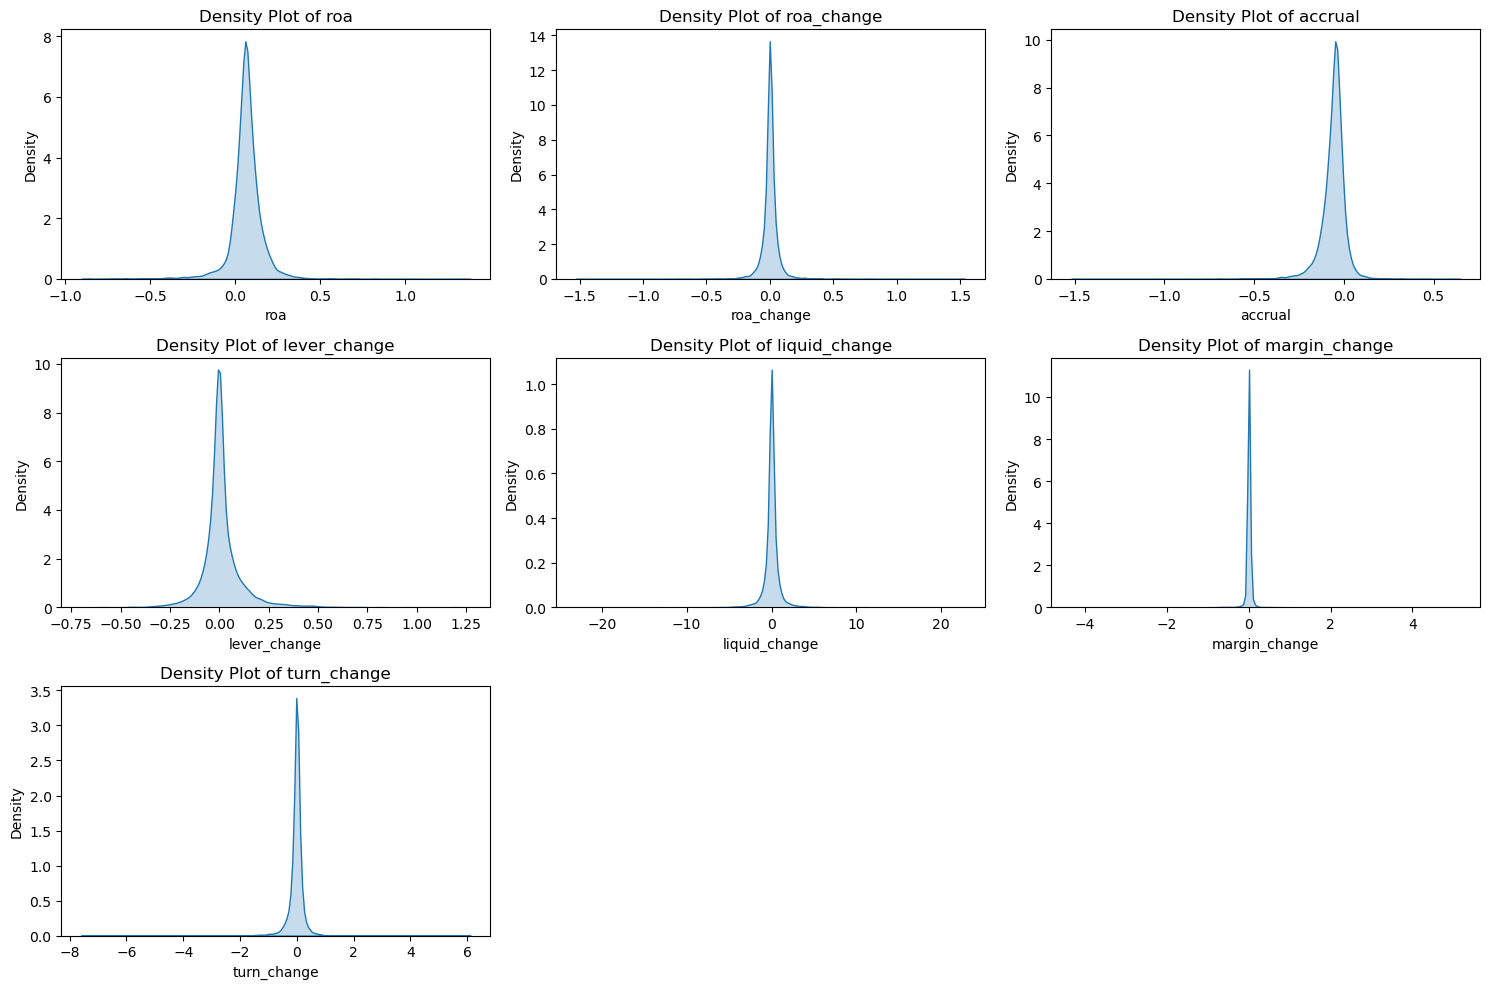

                roa    roa_change       accrual  lever_change  liquid_change  \
count  13753.000000  11999.000000  13753.000000  11999.000000   13753.000000   
mean       0.062579     -0.000228     -0.061218      0.010810      -0.012617   
std        0.101552      0.074765      0.073917      0.108845       1.112519   
min       -0.862351     -1.495991     -1.487822     -0.651576     -22.542417   
25%        0.029353     -0.019455     -0.085202     -0.026961      -0.240842   
50%        0.064719      0.000000     -0.051196      0.000000       0.000000   
75%        0.101615      0.018633     -0.026522      0.032100       0.219653   
max        1.338885      1.508857      0.616706      1.221966      22.349655   

       margin_change   turn_change  
count   13753.000000  11999.000000  
mean       -0.000732     -0.029340  
std         0.167621      0.311282  
min        -4.267348     -7.462681  
25%        -0.009399     -0.088467  
50%         0.000354     -0.001168  
75%         0.013329

In [54]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Plot density of elements side by side
# List of ratios to plot
ratios = ['roa', 'roa_change', 'accrual', 'lever_change', 'liquid_change', 'margin_change', 'turn_change']
# Plot density for each ratio
plt.figure(figsize=(15, 10))
for i, ratio in enumerate(ratios):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(financial_beta_rf_df[ratio], shade=True)
    plt.title(f'Density Plot of {ratio}')
    plt.xlabel(ratio)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

# save as JPG
# plt.savefig('density_plots.jpg', dpi=300)
# plt.close()

# Display descriptive statistics
desc_stats = financial_beta_rf_df[ratios].describe()
print(desc_stats)

In [55]:
#Plot the density of each variable separately
# select basic elements of Fscore
#f_score_var = ['roa', 'roa_change', 'accrual', 'lever_change', 'current_ratio', 'liquid_change', 'gross_margin', 'margin_change', 'turn_change']

# Plot the density of each variable separately
#for var in f_score_var:
#    plt.figure(figsize=(8, 6))
#    sns.kdeplot(financial_beta_rf_df[var], shade=True)
#    plt.title(f'Density Plot of {var}')
#    plt.xlabel('Value')
#    plt.ylabel('Density')
#    plt.show()

### Validate Original Fscore

In [56]:
# validate signal
## 1. log of the market value
financial_beta_rf_df['logmv'] = np.log(financial_beta_rf_df['mkvalt'])
## 2.winsorize the log market value
financial_beta_rf_df['logmv_win'] = winsorize(financial_beta_rf_df['logmv'], limits=[wlimit, wlimit])
## 3.Calculate the BM_ratio, and winsorize the BM_ratio
financial_beta_rf_df['BM_ratio']=financial_beta_rf_df['seq']/financial_beta_rf_df['mkvalt']
financial_beta_rf_df['BM_ratio']=winsorize(financial_beta_rf_df['BM_ratio'], limits=[wlimit, wlimit])
## 4.Filter the high BM_ratio stock
threshold=financial_beta_rf_df['BM_ratio'].quantile(0.80)#According to Piotroski's paper
f_score_highBM_df = financial_beta_rf_df[financial_beta_rf_df['BM_ratio'] > threshold]
f_score_highBM_df = f_score_highBM_df[f_score_highBM_df['pfy'] >= 2008]

f_score_highBM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2900 entries, 1 to 15804
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   gvkey               2900 non-null   int64         
 1   datadate            2900 non-null   datetime64[ns]
 2   fyear               2900 non-null   int64         
 3   indfmt              2900 non-null   object        
 4   consol              2900 non-null   object        
 5   popsrc              2900 non-null   object        
 6   datafmt             2900 non-null   object        
 7   tic                 2900 non-null   object        
 8   conm                2900 non-null   object        
 9   curcd               2900 non-null   object        
 10  fyr                 2900 non-null   int64         
 11  act                 2900 non-null   float64       
 12  ap                  2900 non-null   float64       
 13  at                  2900 non-null   float64    

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [57]:
# 5. statistical description of high BM_ratio profile
f_score_var = ['roa','roa_change', 'accrual', 'lever_change','current_ratio','liquid_change', 'eq_offer','gross_margin', 'margin_change', 'turn_change', 'f_score']
f_score_highBM_df[f_score_var].describe().round(2)

,roa,roa_change,accrual,lever_change,current_ratio,liquid_change,eq_offer,gross_margin,margin_change,turn_change,f_score
count,2740.00,2557.00,2740.00,2557.00,2900.00,2740.00,2900.0,2900.00,2740.00,2557.00,2900.00
mean,0.04,-0.01,-0.05,0.00,2.22,-0.00,0.5,0.35,-0.00,-0.06,4.21
std,0.06,0.07,0.06,0.09,1.52,0.91,0.5,0.20,0.14,0.39,1.61
min,-0.40,-0.72,-0.66,-0.45,0.17,-13.36,0.0,-2.18,-2.74,-5.74,1.00
25%,0.01,-0.03,-0.08,-0.03,1.35,-0.23,0.0,0.21,-0.01,-0.12,3.00
50%,0.04,-0.00,-0.05,-0.00,1.84,0.00,1.0,0.33,-0.00,-0.02,4.00
75%,0.06,0.01,-0.02,0.03,2.61,0.23,1.0,0.46,0.01,0.05,5.00
max,0.81,0.41,0.48,0.70,21.14,12.25,1.0,0.95,2.26,5.97,8.00


In [58]:
#import pandas as pd
#import statsmodels.formula.api as smf
#import scipy.stats as scs

# 6. regression model of Fscore and Annual return

# Sample DataFrame
f_score_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win','yret_short','yret_short_win', 'f_score']]

# drop na
f_score_df = f_score_df.dropna()

# Define a function to perform OLS regression with fixed effects and return coefficients and p-values
def olsreg_fe(d, yvar, xvars, fevar):
    formula = f'{yvar} ~ {" + ".join(xvars)} + C({fevar})'
    model = smf.ols(formula, data=d).fit()
    return pd.Series({'coef': model.params[xvars[0]], 'pval': model.pvalues[xvars[0]]})

# Group by 'pfy' and apply the regression
f_score_df_group = f_score_df.groupby('pfy').apply(olsreg_fe, 'yret_win', ['f_score'], 'pfy')
f_score_df_group = f_score_df_group.reset_index()  # Reset index to access grouped results properly

# Create a DataFrame to present coefficients and p-values side by side
results_df = f_score_df_group[['pfy', 'coef', 'pval']]

# Print results
print('Coefficients and p-values of year-by-year regressions\n', results_df, '\n'*4)
print('Summary statistics of year-by-year regression coefficients\n', results_df['coef'].describe().round(4), '\n'*4)
print('Summary statistics of year-by-year regression p-values\n', results_df['pval'].describe().round(4), '\n'*4)

# Perform a one-sample t-test to test whether the regression coefficient is significantly different from 0
tstat, pval = scs.ttest_1samp(results_df['coef'], 0)

# Print the time series t-statistics and p-values of year-by-year regression coefficients
print('Time series t-statistics and p-values of year-by-year regression coefficients\n')
print(pd.DataFrame({'coef': [results_df['coef'].mean()], 't-stat': [tstat.round(4)], 'p-value': [pval.round(4)]}, index=['f_score']), '\n'*4)


Coefficients and p-values of year-by-year regressions
      pfy      coef      pval
0   2008 -0.001278  0.915924
1   2009 -0.004957  0.677628
2   2010 -0.016094  0.205905
3   2011 -0.004958  0.551950
4   2012 -0.013535  0.182890
5   2013  0.012869  0.222688
6   2014  0.003074  0.778090
7   2015  0.014502  0.265191
8   2016 -0.000412  0.979292
9   2017 -0.034093  0.011149
10  2018 -0.003685  0.786346
11  2019 -0.000497  0.971921
12  2020 -0.018860  0.217681
13  2021 -0.017092  0.235206
14  2022  0.012710  0.353285 




Summary statistics of year-by-year regression coefficients
 count    15.0000
mean     -0.0048
std       0.0134
min      -0.0341
25%      -0.0148
50%      -0.0037
75%       0.0013
max       0.0145
Name: coef, dtype: float64 




Summary statistics of year-by-year regression p-values
 count    15.0000
mean      0.4903
std       0.3324
min       0.0111
25%       0.2202
50%       0.3533
75%       0.7822
max       0.9793
Name: pval, dtype: float64 




Time series t-statistics

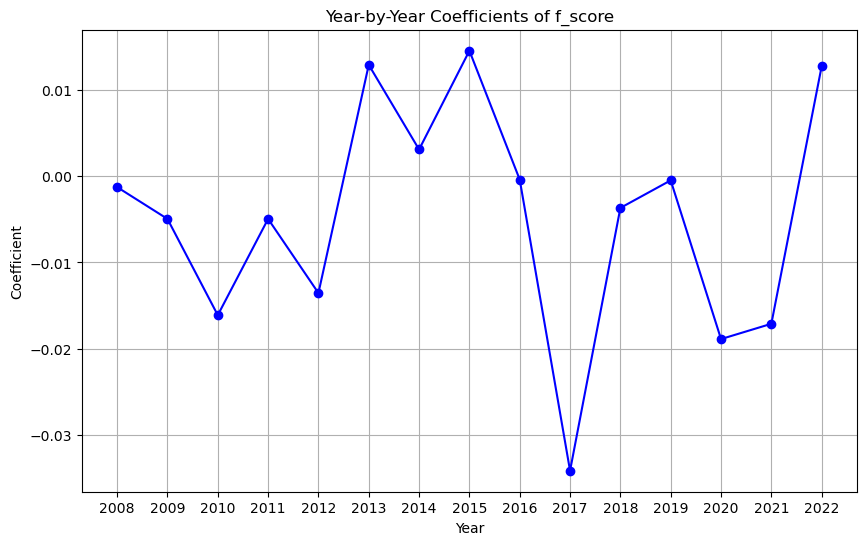

In [59]:
# Plotting the coefficients over the years
plt.figure(figsize=(10, 6))
plt.plot(results_df['pfy'], results_df['coef'], marker='o', linestyle='-', color='b')
plt.title('Year-by-Year Coefficients of f_score')
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.grid(True)
plt.xticks(results_df['pfy'])  # Ensure all years are shown on the x-axis
plt.show()

In [60]:
# 7.1 Explore Market size vs Annual return

f_score_highBM_df['logmv_dec'] = f_score_highBM_df.groupby('pfy')['logmv'].transform(pd.qcut, 10, labels=False)
f_score_highBM_df.groupby('logmv_dec')[['logmv','yret_win']].agg(['count', 'mean'])

logmv           yret_win          
          count      mean    count      mean
logmv_dec                                   
0           298  7.051936      298  0.165890
1           289  7.205468      289  0.156894
2           287  7.388180      287  0.173242
3           288  7.587361      288  0.129802
4           293  7.804575      293  0.164514
5           285  8.036641      285  0.147186
6           288  8.316024      288  0.137220
7           287  8.694347      287  0.161632
8           289  9.194725      289  0.122927
9           296  9.889228      296  0.114732

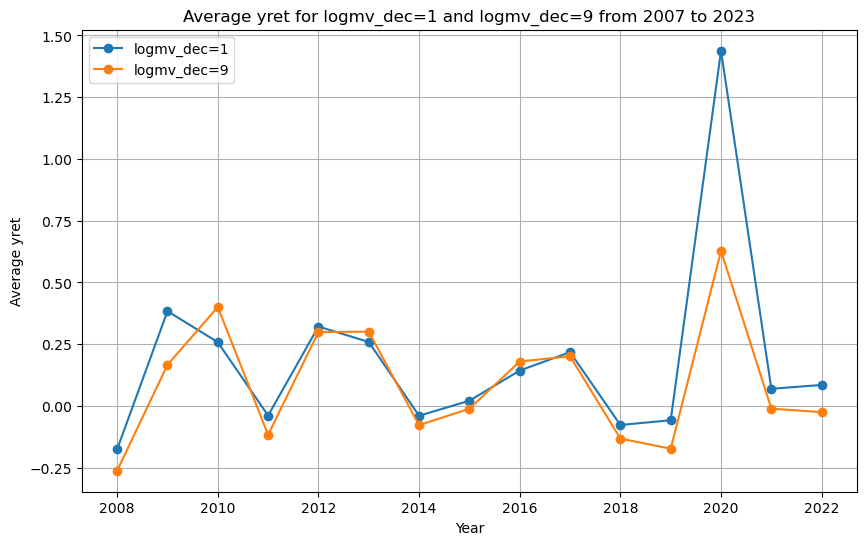

In [61]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Assume f_score_highBM_df already exists and contains the required data
years = range(2007, 2023)

# Store the average yret for each year
mean_yret_logmv_dec_1 = []
mean_yret_logmv_dec_9 = []

for year in years:
    # Select companies where logmv_dec is 1 and calculate the mean yret
    mean_yret_1 = f_score_highBM_df[(f_score_highBM_df['pfy'] == year) & (f_score_highBM_df['logmv_dec'] == 1)]['yret'].mean()
    mean_yret_logmv_dec_1.append(mean_yret_1)

    # Select companies where logmv_dec is 9 and calculate the mean yret
    mean_yret_9 = f_score_highBM_df[(f_score_highBM_df['pfy'] == year) & (f_score_highBM_df['logmv_dec'] == 9)]['yret'].mean()
    mean_yret_logmv_dec_9.append(mean_yret_9)

# Create a DataFrame to store the results for plotting
result_df = pd.DataFrame({
    'Year': years,
    'logmv_dec_1': mean_yret_logmv_dec_1,
    'logmv_dec_9': mean_yret_logmv_dec_9
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['logmv_dec_1'], label='logmv_dec=1', marker='o')
plt.plot(result_df['Year'], result_df['logmv_dec_9'], label='logmv_dec=9', marker='o')

plt.title('Average yret for logmv_dec=1 and logmv_dec=9 from 2007 to 2023')
plt.xlabel('Year')
plt.ylabel('Average yret')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
# 7.2 Explore Fscore vs Annual Return
#f_score_df['f_score_dec'] = f_score_df.groupby('pfy')['f_score'].transform(pd.qcut, 10, labels=False)
#f_score_df['f_score_dec'] = f_score_df.groupby('pfy')['f_score'].transform(lambda x: pd.qcut(x, 10, labels=False, duplicates='drop'))
f_score_highBM_df['f_score_dec'] = f_score_highBM_df.groupby('pfy')['f_score'].transform(
    lambda x: pd.qcut(x.rank(method='first'), 10, labels=False, duplicates='drop')
)
f_score_highBM_df.groupby('f_score_dec')[['f_score','yret_win']].agg(['count', 'mean'])

f_score           yret_win          
              count      mean    count      mean
f_score_dec                                     
0               298  1.348993      298  0.155523
1               289  2.519031      289  0.153851
2               287  3.216028      287  0.147940
3               288  3.638889      288  0.161051
4               293  4.126280      293  0.125352
5               285  4.438596      285  0.178637
6               288  4.944444      288  0.165744
7               287  5.331010      287  0.147445
8               289  5.858131      289  0.110979
9               296  6.712838      296  0.128422

In [63]:
# 8 decile table of Market size and Fscore
pd.pivot_table(f_score_highBM_df, index='f_score_dec', columns='logmv_dec',values='yret_win', aggfunc=np.mean)

# From the table, it appears that as the company's F-score increases, investors may attain lower stock returns.

logmv_dec,0,1,2,3,4,5,6,7,8,9
f_score_dec,,,,,,,,,,
0,0.164105,0.175666,0.242124,0.091277,0.171586,0.180357,0.268689,0.061438,0.011410,0.125396
1,0.124632,0.148750,0.204991,0.153681,0.154071,0.080837,0.089813,0.138616,0.298673,0.197825
2,0.145623,0.254803,0.158033,0.180043,0.240373,0.161224,0.017079,0.115438,0.046451,0.158758
3,0.193860,0.162478,0.232152,0.080782,0.109797,0.134192,0.240234,0.263744,0.166049,0.039418
4,0.158473,0.085529,0.115049,0.074357,0.293518,0.188406,0.008258,0.125271,0.107938,0.067693
5,0.147233,0.147589,0.173139,0.215254,0.092655,0.129220,0.208499,0.275519,0.181719,0.206346
6,0.218826,0.259197,0.144379,0.257468,0.145314,0.097473,0.142353,0.140907,0.215175,0.054365
7,0.141805,0.163449,0.164783,0.175240,0.071223,0.103416,0.200061,0.119576,0.154414,0.171279
8,0.210085,0.053007,0.135326,0.038920,0.202653,0.172581,0.131941,0.130188,0.010955,0.164214


In [64]:
# fscore vs short selling stock return
pd.pivot_table(f_score_highBM_df, index='f_score_dec', columns='logmv_dec',values='yret_short_win', aggfunc=np.mean)


logmv_dec,0,1,2,3,4,5,6,7,8,9
f_score_dec,,,,,,,,,,
0,-0.202964,-0.206613,-0.236969,-0.125658,-0.168293,-0.190047,-0.236711,-0.112844,-0.131498,-0.141474
1,-0.172306,-0.159127,-0.213380,-0.239770,-0.167440,-0.111121,-0.137318,-0.138462,-0.254955,-0.197952
2,-0.176036,-0.242525,-0.209375,-0.183831,-0.200883,-0.172356,-0.045624,-0.111959,-0.096740,-0.163196
3,-0.215844,-0.204796,-0.222223,-0.140138,-0.172218,-0.115109,-0.223780,-0.267367,-0.165155,-0.055169
4,-0.172563,-0.131680,-0.146163,-0.105478,-0.258530,-0.213071,-0.070051,-0.132172,-0.092178,-0.061976
5,-0.166813,-0.173771,-0.173478,-0.183474,-0.091258,-0.128786,-0.207988,-0.232707,-0.177869,-0.196939
6,-0.210847,-0.224685,-0.183087,-0.234091,-0.177257,-0.143644,-0.134755,-0.190056,-0.212327,-0.095017
7,-0.194884,-0.168744,-0.175994,-0.179277,-0.123818,-0.114265,-0.185794,-0.127723,-0.191351,-0.201781
8,-0.213377,-0.101721,-0.159795,-0.079888,-0.229709,-0.198418,-0.139242,-0.168586,-0.077610,-0.163311


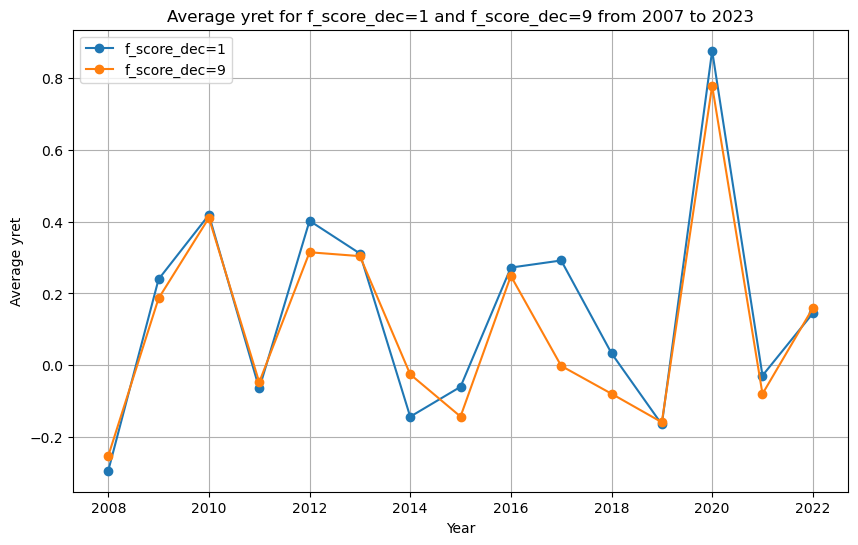

In [65]:
# 9 line graph of stock returns of the highest and lowest Fscore

#import pandas as pd
#import matplotlib.pyplot as plt

# Assume f_score_highBM_df already exists and contains the required data
years = range(2007, 2023)

# Store the average yret for each year
mean_yret_fscore_dec_1 = []
mean_yret_fscore_dec_9 = []

for year in years:
    # Select companies where f_score_dec is 1 and calculate the mean yret
    mean_yret_1 = f_score_highBM_df[(f_score_highBM_df['pfy'] == year) & (f_score_highBM_df['f_score_dec'] == 1)]['yret'].mean()
    mean_yret_fscore_dec_1.append(mean_yret_1)

    # Select companies where f_score_dec is 9 and calculate the mean yret
    mean_yret_9 = f_score_highBM_df[(f_score_highBM_df['pfy'] == year) & (f_score_highBM_df['f_score_dec'] == 9)]['yret'].mean()
    mean_yret_fscore_dec_9.append(mean_yret_9)

# Create a DataFrame to store the results for plotting
result_df = pd.DataFrame({
    'Year': years,
    'f_score_dec_1': mean_yret_fscore_dec_1,
    'f_score_dec_9': mean_yret_fscore_dec_9
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['f_score_dec_1'], label='f_score_dec=1', marker='o')
plt.plot(result_df['Year'], result_df['f_score_dec_9'], label='f_score_dec=9', marker='o')

plt.title('Average yret for f_score_dec=1 and f_score_dec=9 from 2007 to 2023')
plt.xlabel('Year')
plt.ylabel('Average yret')
plt.legend()
plt.grid(True)
plt.show()


### Further Analysis

#### Linear Regression (yret ~ components of Fscore)
Examine Statistical significance of components of Fscore to Annual Returan



In [66]:
# 1. Calculate individual F-score components
f_score_highBM_df['roa_positive'] = (f_score_highBM_df['roa'] > 0).astype(int)
f_score_highBM_df['roa_change_positive'] = (f_score_highBM_df['roa_change'] > 0).astype(int)
f_score_highBM_df['accrual_negative'] = (f_score_highBM_df['accrual'] < 0).astype(int)  # Accrual is expected to be negative
f_score_highBM_df['lever_decrease'] = (f_score_highBM_df['lever_change'] < 0).astype(int)
f_score_highBM_df['liquid_increase'] = (f_score_highBM_df['liquid_change'] > 0).astype(int)
f_score_highBM_df['no_eq_offer'] = (f_score_highBM_df['eq_offer'] == 1).astype(int)
f_score_highBM_df['margin_increase'] = (f_score_highBM_df['margin_change'] > 0).astype(int)
f_score_highBM_df['turn_increase'] = (f_score_highBM_df['turn_change'] > 0).astype(int)


In [67]:
# Discard - Univariate regression
# Univariate regression - Examine the significance of each basic financial variables(not binary variable) one by one
'''
f_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win','roa_positive','roa_change_positive','accrual_negative','lever_decrease','liquid_increase','no_eq_offer','margin_increase','turn_increase']]
f_score_spilt_df = f_score_spilt_df.dropna()

# Define the OLS regression function
def olsreg(d, yvar, xvars):
    Y = d[yvar]
    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data
    reg = sma.OLS(Y, X).fit()
    return reg.params[xvars]

# List of F-score components to regress
f_score_components = [
    'roa_positive', 'roa_change_positive', 'accrual_negative',
    'lever_decrease', 'liquid_increase', 'no_eq_offer',
    'margin_increase', 'turn_increase'
]

# Group the data by year
f_score_spilt_df_group = f_score_spilt_df.groupby('pfy')

# Initialize a dictionary to store t-stats and p-values
tstats_pvalues = {'component': [], 't-stat': [], 'p-value': []}

# Perform year-by-year regressions and store results
yearcoef_dict = {}
for component in f_score_components:
    yearcoef = f_score_spilt_df_group.apply(olsreg, 'yret_win', component)
    yearcoef_dict[component] = yearcoef

    # Print the coefficients
    print(f'Coefficients of year-by-year regressions for {component}\n', yearcoef, '\n'*4)
    print(f'Summary statistics of year-by-year regression coefficients for {component}\n', yearcoef.describe().round(4), '\n'*4)

    # Perform t-test
    tstat, pval = scs.ttest_1samp(yearcoef, 0)
    print(f'Time series t-statistics and p-values of year-by-year regression coefficients for {component}\n')
    print(pd.DataFrame({'t-stat': tstat.round(4), 'p-value': pval.round(4)}, index=[component]), '\n'*4)

    # Store t-stats and p-values in the dictionary
    tstats_pvalues['component'].append(component)
    tstats_pvalues['t-stat'].append(tstat)  # t-stat for the component
    tstats_pvalues['p-value'].append(pval)  # p-value for the component

# Convert the dictionary to a DataFrame
tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print(tstats_pvalues_df)
'''

"\nf_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win','roa_positive','roa_change_positive','accrual_negative','lever_decrease','liquid_increase','no_eq_offer','margin_increase','turn_increase']]\nf_score_spilt_df = f_score_spilt_df.dropna()\n\n# Define the OLS regression function\ndef olsreg(d, yvar, xvars):\n    Y = d[yvar]\n    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data\n    reg = sma.OLS(Y, X).fit()\n    return reg.params[xvars]\n\n# List of F-score components to regress\nf_score_components = [\n    'roa_positive', 'roa_change_positive', 'accrual_negative',\n    'lever_decrease', 'liquid_increase', 'no_eq_offer',\n    'margin_increase', 'turn_increase'\n]\n\n# Group the data by year\nf_score_spilt_df_group = f_score_spilt_df.groupby('pfy')\n\n# Initialize a dictionary to store t-stats and p-values\ntstats_pvalues = {'component': [], 't-stat': [], 'p-value': []}\n\n# Perform year-by-ye

In [68]:
# 2. multivariate regression - Examine the significance of each component to Annual Return

# import pandas as pd
# import statsmodels.formula.api as smf
# import scipy.stats as scs

# Sample DataFrame
f_score_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win', 'roa_positive', 'roa_change_positive', 'accrual_negative', 'lever_decrease', 'liquid_increase', 'no_eq_offer', 'margin_increase', 'turn_increase']]
f_score_df = f_score_df.dropna()

# Define a function to perform OLS regression with fixed effects and return coefficients and p-values
def olsreg_fe(d, yvar, xvars, fevar):
    formula = f'{yvar} ~ {" + ".join(xvars)} + C({fevar})'
    model = smf.ols(formula, data=d).fit()
    return pd.DataFrame({'coef': model.params[xvars], 'pval': model.pvalues[xvars]})

# List of F-score components to regress
f_score_components = [
    'roa_positive', 'roa_change_positive', 'accrual_negative',
    'lever_decrease', 'liquid_increase', 'no_eq_offer',
    'margin_increase', 'turn_increase'
]

# Group by 'pfy' and apply the regression
f_score_df_group = f_score_df.groupby('pfy').apply(olsreg_fe, 'yret_win', f_score_components, 'pfy')
f_score_df_group = f_score_df_group.reset_index()  # Reset index to access grouped results properly

# Print results
print('Coefficients and p-values of year-by-year regressions\n', f_score_df_group, '\n'*4)
print('Summary statistics of year-by-year regression coefficients\n', f_score_df_group['coef'].describe().round(4), '\n'*4)
print('Summary statistics of year-by-year regression p-values\n', f_score_df_group['pval'].describe().round(4), '\n'*4)

# Perform a one-sample t-test to test whether the regression coefficients are significantly different from 0
tstats_pvalues = {'component': [],'coef': [], 't-stat': [], 'p-value': []}
for component in f_score_components:
    coef_data = f_score_df_group[f_score_df_group['level_1'] == component]['coef']
    tstat, pval = scs.ttest_1samp(coef_data, 0)
    tstats_pvalues['coef'].append(coef_data.mean())
    tstats_pvalues['component'].append(component)
    tstats_pvalues['t-stat'].append(tstat)
    tstats_pvalues['p-value'].append(pval)

# Convert the dictionary to a DataFrame

tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print(tstats_pvalues_df)


Coefficients and p-values of year-by-year regressions
       pfy              level_1      coef      pval
0    2008         roa_positive  0.020089  0.748616
1    2008  roa_change_positive  0.007125  0.887653
2    2008     accrual_negative  0.003298  0.949162
3    2008       lever_decrease -0.077424  0.050030
4    2008      liquid_increase  0.024827  0.527053
..    ...                  ...       ...       ...
115  2022       lever_decrease -0.036094  0.476700
116  2022      liquid_increase  0.035890  0.481501
117  2022          no_eq_offer -0.014641  0.767278
118  2022      margin_increase  0.055447  0.283274
119  2022        turn_increase  0.054718  0.359509

[120 rows x 4 columns] 




Summary statistics of year-by-year regression coefficients
 count    120.0000
mean      -0.0025
std        0.0510
min       -0.1435
25%       -0.0362
50%       -0.0016
75%        0.0384
max        0.1023
Name: coef, dtype: float64 




Summary statistics of year-by-year regression p-values
 count    120

In [69]:

# check the multivariate regeression  year by year
'''
# Filter out rows that contain NA values
f_score_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win', 'f_score',
                                'roa_positive', 'roa_change_positive', 'accrual_negative',
                                'lever_decrease', 'liquid_increase', 'no_eq_offer',
                                'margin_increase', 'turn_increase']].dropna()

# 定义一个函数来执行 OLS 回归并返回回归结果的摘要
def olsreg_fe(d, yvar, xvars, fevar):
    formula = f'{yvar} ~ {" + ".join(xvars)} + C({fevar})'
    model = smf.ols(formula, data=d).fit()
    return model.summary()

# 自变量列表
f_score_components = [
    'roa_positive', 'roa_change_positive', 'accrual_negative',
    'lever_decrease', 'liquid_increase', 'no_eq_offer',
    'margin_increase', 'turn_increase'
]

# 按年度分组并应用回归
f_score_df_group = f_score_df.groupby('pfy').apply(olsreg_fe, 'yret_win', f_score_components, 'pfy')

# 显示每个年度的回归结果摘要
for year, summary in f_score_df_group.items():
  print(f"Year: {year}")
  print(summary)
  print("\n" + "="*80 + "\n")
'''





'\n# Filter out rows that contain NA values\nf_score_df = f_score_highBM_df[[\'gvkey\', \'conm\', \'pfy\', \'logmv\', \'yret\', \'yret_win\', \'f_score\',\n                                \'roa_positive\', \'roa_change_positive\', \'accrual_negative\',\n                                \'lever_decrease\', \'liquid_increase\', \'no_eq_offer\',\n                                \'margin_increase\', \'turn_increase\']].dropna()\n\n# 定义一个函数来执行 OLS 回归并返回回归结果的摘要\ndef olsreg_fe(d, yvar, xvars, fevar):\n    formula = f\'{yvar} ~ {" + ".join(xvars)} + C({fevar})\'\n    model = smf.ols(formula, data=d).fit()\n    return model.summary()\n\n# 自变量列表\nf_score_components = [\n    \'roa_positive\', \'roa_change_positive\', \'accrual_negative\',\n    \'lever_decrease\', \'liquid_increase\', \'no_eq_offer\',\n    \'margin_increase\', \'turn_increase\'\n]\n\n# 按年度分组并应用回归\nf_score_df_group = f_score_df.groupby(\'pfy\').apply(olsreg_fe, \'yret_win\', f_score_components, \'pfy\')\n\n# 显示每个年度的回归结果摘要\nfor year,

In [70]:
# 3. Univariate Regrssion - Examine the significance of each binary component of Fscore

#import numpy as np
#import pandas as pd
#import statsmodels.api as sma
#import scipy.stats as scs

# Ensure the f_score_spilt_df is defined with your actual data before running this code
f_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win','roa_positive','roa_change_positive','accrual_negative','lever_decrease','liquid_increase','no_eq_offer','margin_increase','turn_increase']]
f_score_spilt_df = f_score_spilt_df.dropna()

# Define the OLS regression function
def olsreg(d, yvar, xvars):
    Y = d[yvar]
    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data
    reg = sma.OLS(Y, X).fit()
    return reg

# List of F-score components to regress
f_score_components = [
    'roa_positive', 'roa_change_positive', 'accrual_negative',
    'lever_decrease', 'liquid_increase', 'no_eq_offer',
    'margin_increase', 'turn_increase'
]

# Group the data by year
f_score_spilt_df_group = f_score_spilt_df.groupby('pfy')

# Initialize a dictionary to store coefficients, t-stats, and p-values
tstats_pvalues = {'component': [], 'coef': [], 't-stat': [], 'p-value': []}

# Perform year-by-year regressions and store results
yearcoef_dict = {}
for component in f_score_components:
    yearcoef = f_score_spilt_df_group.apply(lambda d: olsreg(d, 'yret_win', component).params[component])
    yearcoef_dict[component] = yearcoef

    # Print the coefficients
    print(f'Coefficients of year-by-year regressions for {component}\n', yearcoef, '\n'*4)
    print(f'Summary statistics of year-by-year regression coefficients for {component}\n', yearcoef.describe().round(4), '\n'*4)

    # Perform t-test
    tstat, pval = scs.ttest_1samp(yearcoef, 0)
    print(f'Time series t-statistics and p-values of year-by-year regression coefficients for {component}\n')
    print(pd.DataFrame({'t-stat': tstat.round(4), 'p-value': pval.round(4)}, index=[component]), '\n'*4)

    # Store coefficients, t-stats, and p-values in the dictionary
    tstats_pvalues['component'].append(component)
    tstats_pvalues['coef'].append(yearcoef.mean())  # mean coefficient for the component
    tstats_pvalues['t-stat'].append(tstat)  # t-stat for the component
    tstats_pvalues['p-value'].append(pval)  # p-value for the component

    # Print regression summary for each year
    #for year, group in f_score_spilt_df_group:
    #    reg_result = olsreg(group, 'yret_win', component)
    #    print(f'Regression summary for {component} in year {year}\n')
    #    print(reg_result.summary(), '\n'*4)

# Convert the dictionary to a DataFrame
tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print(tstats_pvalues_df)

## only  accrual_negative is significant


Coefficients of year-by-year regressions for roa_positive
 pfy
2008   -0.011082
2009   -0.008702
2010   -0.037015
2011   -0.086446
2012    0.039322
2013   -0.016062
2014    0.011903
2015    0.086633
2016    0.051926
2017   -0.141829
2018   -0.001336
2019    0.027357
2020   -0.108610
2021   -0.045144
2022    0.047911
dtype: float64 




Summary statistics of year-by-year regression coefficients for roa_positive
 count    15.0000
mean     -0.0127
std       0.0631
min      -0.1418
25%      -0.0411
50%      -0.0087
75%       0.0333
max       0.0866
dtype: float64 




Time series t-statistics and p-values of year-by-year regression coefficients for roa_positive

              t-stat  p-value
roa_positive -0.7822   0.4471 




Coefficients of year-by-year regressions for roa_change_positive
 pfy
2008   -0.004867
2009    0.005365
2010   -0.066340
2011   -0.054959
2012   -0.063316
2013    0.049582
2014    0.007791
2015    0.041321
2016    0.034549
2017   -0.134037
2018   -0.026348
2019    0.0

#### Use Alternative ratio to modify Fscore

In [71]:
# 1. Compute alternative ratios

# Quick Ratio
f_score_highBM_df['quick_ratio'] = (f_score_highBM_df['act'] - f_score_highBM_df['rect']) / f_score_highBM_df['lct']

# Return on Equity (ROE)
f_score_highBM_df['roe'] = f_score_highBM_df['ib'] / f_score_highBM_df['seq']

# Operating Margin
f_score_highBM_df['op_margin'] = f_score_highBM_df['ebit'] / f_score_highBM_df['sale']

# Ebitda Margin
f_score_highBM_df['ebitda_margin'] = f_score_highBM_df['ebitda'] / f_score_highBM_df['sale']

# Interest Coverage Ratio
f_score_highBM_df['int_cov_ratio'] = f_score_highBM_df['ebit'] / f_score_highBM_df['xint']

# Cash Ratio
f_score_highBM_df['cash_ratio'] = f_score_highBM_df['che'] / f_score_highBM_df['lct']

# Net Working Capital
f_score_highBM_df['net_wcap'] = f_score_highBM_df['act'] - f_score_highBM_df['lct']

# Operating Cash Flow Ratio
f_score_highBM_df['ocf_ratio'] = f_score_highBM_df['oancf'] / f_score_highBM_df['lct']

# Dividend Payout Ratio
f_score_highBM_df['div_payout_ratio'] = f_score_highBM_df['dvc'] / f_score_highBM_df['ib']

# Payable Turnover Ratio
f_score_highBM_df['invt_lag'] = f_score_highBM_df.groupby('gvkey')['invt'].shift(1)
f_score_highBM_df['purchase']= f_score_highBM_df['cogs']+(f_score_highBM_df['invt']-f_score_highBM_df['invt_lag'])
f_score_highBM_df['payable_turnover'] = f_score_highBM_df['cogs'] / f_score_highBM_df['ap']

# Receivable Turnover Ratio
f_score_highBM_df['receivable_turnover'] = f_score_highBM_df['sale'] / f_score_highBM_df['rect']

# Inventory Turnover Ratio
f_score_highBM_df['inventory_turnover'] = f_score_highBM_df['cogs'] / f_score_highBM_df['invt']
# Debt to Equity Ratio
f_score_highBM_df['debt_to_equity_ratio'] = f_score_highBM_df['dt']/ f_score_highBM_df['seq']

alt_ratios = [
     'quick_ratio', 'roe',  'op_margin',
    'int_cov_ratio', 'cash_ratio', 'net_wcap','ebitda_margin',
    'ocf_ratio', 'div_payout_ratio','payable_turnover','receivable_turnover',
     'inventory_turnover','debt_to_equity_ratio'
]

for ratio in alt_ratios:
    f_score_highBM_df[ratio] = winsorize(f_score_highBM_df[ratio], limits=[wlimit,wlimit])

# Cash Conversion Cycle
f_score_highBM_df['days_inventory_outstanding'] = 365 / f_score_highBM_df['inventory_turnover']
f_score_highBM_df['days_sales_outstanding'] = 365 / f_score_highBM_df['receivable_turnover']
f_score_highBM_df['days_payables_outstanding'] = 365 / f_score_highBM_df['payable_turnover']
f_score_highBM_df['cash_conversion_cycle'] = f_score_highBM_df['days_inventory_outstanding'] + f_score_highBM_df['days_sales_outstanding'] - f_score_highBM_df['days_payables_outstanding']



In [72]:
#f_score_highBM_df.describe()

In [73]:
# 2. Alternatives Subset

#import numpy as np
#import pandas as pd
#import statsmodels.api as sma
#import scipy.stats as scs

# Ensure the f_score_spilt_df is defined with your actual data before running this code
f_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv',
    'yret', 'yret_win',  'quick_ratio','roe', 'op_margin','int_cov_ratio',
    'cash_ratio', 'net_wcap','ocf_ratio', 'div_payout_ratio','ebitda_margin',
    'payable_turnover','receivable_turnover','inventory_turnover','cash_conversion_cycle','debt_to_equity_ratio']]

# Replace infinite values with NaN
f_score_spilt_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values
f_score_spilt_df = f_score_spilt_df.dropna()

f_score_spilt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497 entries, 1 to 15804
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gvkey                  2497 non-null   int64  
 1   conm                   2497 non-null   object 
 2   pfy                    2497 non-null   int64  
 3   logmv                  2497 non-null   float64
 4   yret                   2497 non-null   float64
 5   yret_win               2497 non-null   float64
 6   quick_ratio            2497 non-null   float64
 7   roe                    2497 non-null   float64
 8   op_margin              2497 non-null   float64
 9   int_cov_ratio          2497 non-null   float64
 10  cash_ratio             2497 non-null   float64
 11  net_wcap               2497 non-null   float64
 12  ocf_ratio              2497 non-null   float64
 13  div_payout_ratio       2497 non-null   float64
 14  ebitda_margin          2497 non-null   float64
 15  pay

/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/1045791003.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_score_spilt_df.replace([np.inf, -np.inf], np.nan, inplace=True)


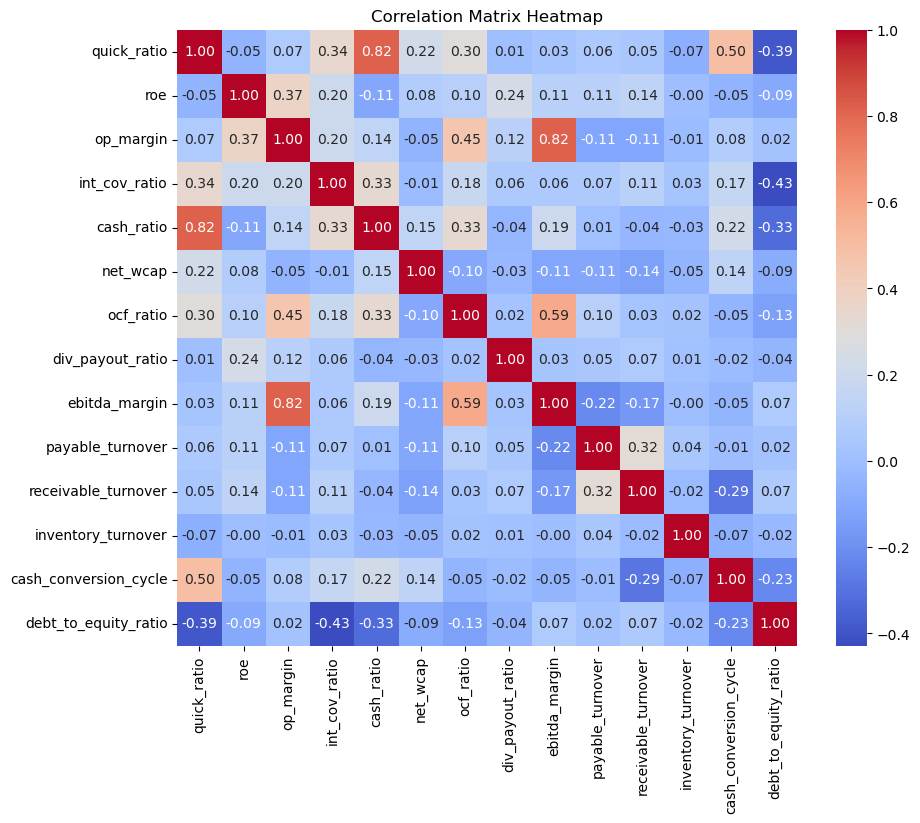

In [74]:
# 3. Collinearity check
f_score_components = [ 'quick_ratio','roe', 'op_margin','int_cov_ratio',
    'cash_ratio', 'net_wcap','ocf_ratio', 'div_payout_ratio','ebitda_margin',
    'payable_turnover','receivable_turnover','inventory_turnover','cash_conversion_cycle','debt_to_equity_ratio']


correlation_matrix = f_score_spilt_df[f_score_components].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()



In [75]:
# 4. Select alternative ratios to compute Fscore and avoid hight collinearity
# Define a list of ratios to compare against prior year
ratios_to_compare = ['roe', 'op_margin', 'cash_ratio', 'net_wcap', 'ebitda_margin',
                     'ocf_ratio', 'div_payout_ratio', 'payable_turnover', 'receivable_turnover',
                     'inventory_turnover', 'cash_conversion_cycle']

# Create columns indicating whether each ratio has increased compared to the prior year
for ratio in ratios_to_compare:
    # Create a column to indicate if the current year's ratio is greater than the previous year's ratio
    f_score_highBM_df[f'{ratio}_increase'] = (f_score_highBM_df[ratio] > f_score_highBM_df.groupby('gvkey')[ratio].shift(1)).astype(int)

# Print the DataFrame to see the new columns
print(f_score_highBM_df.head())

f_score_highBM_df['int_cov_ratio_increase'] = (f_score_highBM_df['int_cov_ratio'] > 1).astype(int)
f_score_highBM_df['debt_to_equity_ratio'] = (f_score_highBM_df['debt_to_equity_ratio'] < 1).astype(int)

# Calculate f_score2
f_score_highBM_df['f_score2'] = (
    f_score_highBM_df['ebitda_margin_increase'] +
    f_score_highBM_df['cash_conversion_cycle_increase'] +
    f_score_highBM_df['payable_turnover_increase'] +
    f_score_highBM_df['div_payout_ratio_increase'] +
    f_score_highBM_df['net_wcap_increase'] +
    f_score_highBM_df['int_cov_ratio_increase'] +
    f_score_highBM_df['roe_increase'] +
    f_score_highBM_df['accrual_negative'] +
    f_score_highBM_df['debt_to_equity_ratio']
)

# Print the DataFrame to see the f_score2 column
display(f_score_highBM_df.head())


   gvkey   datadate  fyear indfmt consol popsrc datafmt  tic      conm curcd  \
1   1004 2011-05-31   2010   INDL      C      D     STD  AIR  AAR CORP   USD   
2   1004 2015-05-31   2014   INDL      C      D     STD  AIR  AAR CORP   USD   
3   1004 2017-05-31   2016   INDL      C      D     STD  AIR  AAR CORP   USD   
4   1004 2018-05-31   2017   INDL      C      D     STD  AIR  AAR CORP   USD   
5   1004 2019-05-31   2018   INDL      C      D     STD  AIR  AAR CORP   USD   

   fyr      act       ap        at     che      cogs    csho      dlc  \
1    5  913.985  185.096  1703.727  57.433  1408.071  39.781  114.075   
2    5  954.100  142.300  1515.000  54.700  1342.700  35.423   69.000   
3    5  888.500  177.400  1504.100  21.846  1422.700  34.354    2.000   
4    5  942.700  170.000  1524.700  41.600  1413.200  34.716    0.000   
5    5  952.500  187.800  1517.200  41.100  1679.500  34.788    0.000   

      dltt       dt     dvc     ebit   ebitda      ib     invt     lct  \
1  329

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win,annual_beta,sp500_rate,rf_rate,market_premium,cost_of_equity,at_lag,roa,cfo,roa_lag,roa_change,accrual,lever,lever_lag,lever_change,current_ratio,current_ratio_lag,liquid_change,eq_offer,gross_margin,gross_margin_lag,margin_change,asset_turnover,asset_turnover_lag,turn_change,f_score,logmv,logmv_win,BM_ratio,logmv_dec,f_score_dec,roa_positive,roa_change_positive,accrual_negative,lever_decrease,liquid_increase,no_eq_offer,margin_increase,turn_increase,quick_ratio,roe,op_margin,ebitda_margin,int_cov_ratio,cash_ratio,net_wcap,ocf_ratio,div_payout_ratio,invt_lag,purchase,payable_turnover,receivable_turnover,inventory_turnover,debt_to_equity_ratio,days_inventory_outstanding,days_sales_outstanding,days_payables_outstanding,cash_conversion_cycle,roe_increase,op_margin_increase,cash_ratio_increase,net_wcap_increase,ebitda_margin_increase,ocf_ratio_increase,div_payout_ratio_increase,payable_turnover_increase,receivable_turnover_increase,inventory_turnover_increase,cash_conversion_cycle_increase,int_cov_ratio_increase,f_score2
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.01,868.438,0.0,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.67,1750.0,A,1124.8048,26.39,20.0,5080,2011,5,2012,0.660816,0.660816,-0.456639,-0.456639,7.906668,8.812869,1.785852,7.027017,0.023415,1067.633,0.068506,0.101718,NaN,NaN,-0.033213,0.238007,NaN,NaN,2.197027,2.517372,-0.320345,0,0.207070,0.211086,-0.004016,1.663289,NaN,NaN,2,7.025365,7.056252,0.743102,0,0,1,0,1,0,0,0,0,0,1.484330,0.087503,0.077158,0.110550,4.467427,0.138057,497.975,0.261047,0.040785,NaN,NaN,7.607247,5.989369,2.775760,1,131.495507,60.941312,47.980563,144.456256,0,0,0,0,0,0,0,0,0,0,0,1,3
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.00,669.900,0.0,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.50,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793,4.697870,1.629424,1.832641,-0.203218,0.018231,1703.727,-0.031989,-0.025239,0.068506,-0.100494,-0.006750,0.052816,0.238007,-0.185191,2.315777,2.197027,0.118750,1,0.157812,0.207070,-0.049258,0.935772,1.663289,-0.727517,4,7.025365,7.056252,0.751330,0,4,0,0,1,1,1,1,0,0,1.754854,-0.064489,-0.005394,0.052500,-0.324528,0.132767,542.100,0.040693,-0.218349,507.274,1402.126,9.435699,6.898745,2.369331,1,154.051910,52.908173,38.682878,168.277205,0,0,0,1,0,0,0,1,1,0,1,0,5
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,21.846,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.10,589.900,0.0,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.50,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886,1.225974,12.132648,2.913685,9.218962,0.030267,1515.000,0.033135,0.014389,-0.031989,0.065124,0.018746,0.102878,0.052816,0.050062,2.651447,2.315777,0.335671,1,0.195123,0.157812,0.037311,1.166733,0.935772,0.230961,6,7.090351,7.090351,0.761625,0,8,1,1,0,0,1,1,1,1,1.901224,0.054911,0.043675,0.083842,14.036364,0.065192,553.400,0.065055,0.203187,566.700,1457.100,8.019729,7.031026,2.366827,1,154.214873,51.912763,45.512757,160.614879,1,1,0,1,1,1,1,0,1,0,0,1,6
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700,41.600,1413.200,34.716,0.000,177.200,177.200,10.300,86.000,126.500,73.700,547.900,333.30,588.400,0.0,15.600,64.300,0.0,701.200,203.000,1748.300,1748.300,936.300,936.300,3.500,609.400,8.00,1750.0,

In [76]:
# 5. Examine the significance of Fscore_2 to annual return

#import numpy as np
#import pandas as pd
#import statsmodels.api as sma
#import scipy.stats as scs

# Ensure the f_score_spilt_df is defined with your actual data before running this code
f_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win','f_score2']]



# Define the OLS regression function
def olsreg(d, yvar, xvars):
    Y = d[yvar]
    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data
    reg = sma.OLS(Y, X).fit()
    return reg

# List of F-score components to regress
f_score_components = ['f_score2']

# Group the data by year
f_score_spilt_df_group = f_score_spilt_df.groupby('pfy')

# Initialize a dictionary to store coefficients, t-stats, and p-values
tstats_pvalues = {'component': [], 'coef': [], 't-stat': [], 'p-value': []}

# Perform year-by-year regressions and store results
yearcoef_dict = {}
for component in f_score_components:
    yearcoef = f_score_spilt_df_group.apply(lambda d: olsreg(d, 'yret_win', component).params[component])
    yearcoef_dict[component] = yearcoef

    # Print the coefficients
    print(f'Coefficients of year-by-year regressions for {component}\n', yearcoef, '\n'*4)
    print(f'Summary statistics of year-by-year regression coefficients for {component}\n', yearcoef.describe().round(4), '\n'*4)

    # Perform t-test
    tstat, pval = scs.ttest_1samp(yearcoef, 0)
    print(f'Time series t-statistics and p-values of year-by-year regression coefficients for {component}\n')
    print(pd.DataFrame({'t-stat': tstat.round(4), 'p-value': pval.round(4)}, index=[component]), '\n'*4)

    # Store coefficients, t-stats, and p-values in the dictionary
    tstats_pvalues['component'].append(component)
    tstats_pvalues['coef'].append(yearcoef.mean())  # mean coefficient for the component
    tstats_pvalues['t-stat'].append(tstat)  # t-stat for the component
    tstats_pvalues['p-value'].append(pval)  # p-value for the component

    # Print regression summary for each year
    #for year, group in f_score_spilt_df_group:
    #    reg_result = olsreg(group, 'yret_win', component)
    #    print(f'Regression summary for {component} in year {year}\n')
    #    print(reg_result.summary(), '\n'*4)

# Convert the dictionary to a DataFrame
tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print(tstats_pvalues_df)

# Compared to Original Fscore which is statistically significant to annual return ,Fscore 2 built by alternative financial ratios is not statistically significant.

Coefficients of year-by-year regressions for f_score2
 pfy
2008    0.002618
2009   -0.003863
2010   -0.003049
2011   -0.004097
2012   -0.018664
2013   -0.003298
2014   -0.017930
2015    0.028328
2016    0.016516
2017   -0.013513
2018   -0.006809
2019   -0.000076
2020   -0.019030
2021   -0.002654
2022    0.026239
dtype: float64 




Summary statistics of year-by-year regression coefficients for f_score2
 count    15.0000
mean     -0.0013
std       0.0148
min      -0.0190
25%      -0.0102
50%      -0.0033
75%       0.0013
max       0.0283
dtype: float64 




Time series t-statistics and p-values of year-by-year regression coefficients for f_score2

          t-stat  p-value
f_score2 -0.3364   0.7415 




  component      coef    t-stat   p-value
0  f_score2 -0.001285 -0.336441  0.741528


In [77]:
# 6. Examine the significance of selected alternative binary variable to Annual Return - Multivariate Regression
#import pandas as pd
#import statsmodels.formula.api as smf
#import scipy.stats as scs

# Define a function to perform OLS regression with fixed effects and return coefficients and p-values
def olsreg_fe(d, yvar, xvars, fevar):
    formula = f'{yvar} ~ {" + ".join(xvars)} + C({fevar})'
    model = smf.ols(formula, data=d).fit()
    return pd.DataFrame({'coef': model.params[xvars], 'pval': model.pvalues[xvars]})

# Sample DataFrame
f_score_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret',  'yret_win',
'roe_increase','op_margin_increase','int_cov_ratio_increase','cash_ratio_increase', 'net_wcap_increase',
'ebitda_margin_increase','ocf_ratio_increase', 'div_payout_ratio_increase','payable_turnover_increase',
'receivable_turnover_increase','inventory_turnover_increase','accrual_negative','debt_to_equity_ratio',
'cash_conversion_cycle_increase']]
f_score_df = f_score_df.dropna()

# List of F-score components to regress
f_score_components = [
  'ebitda_margin_increase','cash_conversion_cycle_increase','payable_turnover_increase', 'div_payout_ratio_increase',
'net_wcap_increase','int_cov_ratio_increase','roe_increase','accrual_negative','debt_to_equity_ratio'
]

# Group by 'pfy' and apply the regression
f_score_df_group = f_score_df.groupby('pfy').apply(olsreg_fe, 'yret_win', f_score_components, 'pfy')
f_score_df_group = f_score_df_group.reset_index()  # Reset index to access grouped results properly

# Print results
print('Coefficients and p-values of year-by-year regressions\n', f_score_df_group, '\n'*4)
print('Summary statistics of year-by-year regression coefficients\n', f_score_df_group['coef'].describe().round(4), '\n'*4)
print('Summary statistics of year-by-year regression p-values\n', f_score_df_group['pval'].describe().round(4), '\n'*4)

# Perform a one-sample t-test to test whether the regression coefficients are significantly different from 0
tstats_pvalues = {'component': [], 't-stat': [], 'p-value': []}
for component in f_score_components:
    coef_data = f_score_df_group[f_score_df_group['level_1'] == component]['coef']
    tstat, pval = scs.ttest_1samp(coef_data, 0)
    tstats_pvalues['component'].append(component)
    tstats_pvalues['t-stat'].append(tstat)
    tstats_pvalues['p-value'].append(pval)

# Convert the dictionary to a DataFrame
tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print('Time series t-statistics and p-values of year-by-year regression coefficients\n', tstats_pvalues_df, '\n'*4)

# Only cash_conversion_cycle_increase, accrual_negative in Fscore 2 are statistically significant

Coefficients and p-values of year-by-year regressions
       pfy                         level_1          coef      pval
0    2008          ebitda_margin_increase  1.951462e-17  0.065811
1    2008  cash_conversion_cycle_increase -1.435348e-17  0.151088
2    2008       payable_turnover_increase  0.000000e+00       NaN
3    2008       div_payout_ratio_increase  0.000000e+00       NaN
4    2008               net_wcap_increase  0.000000e+00       NaN
..    ...                             ...           ...       ...
130  2022               net_wcap_increase  1.005513e-01  0.051715
131  2022          int_cov_ratio_increase -5.743129e-02  0.404572
132  2022                    roe_increase  7.839453e-02  0.176842
133  2022                accrual_negative -4.763639e-02  0.368853
134  2022            debt_to_equity_ratio -9.426921e-03  0.870568

[135 rows x 4 columns] 




Summary statistics of year-by-year regression coefficients
 count    135.0000
mean      -0.0057
std        0.0624
min       

In [78]:
# Abandon - univariate regession of alternative binary variables

'''
#import numpy as np
#import pandas as pd
#import statsmodels.api as sma
#import scipy.stats as scs

# Ensure the f_score_spilt_df is defined with your actual data before running this code
f_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win',
'roe_increase','op_margin_increase','int_cov_ratio_increase','cash_ratio_increase', 'net_wcap_increase',
'ebitda_margin_increase','ocf_ratio_increase', 'div_payout_ratio_increase','payable_turnover_increase',
'receivable_turnover_increase','inventory_turnover_increase','debt_to_equity_ratio']]


# Define the OLS regression function
def olsreg(d, yvar, xvars):
    Y = d[yvar]
    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data
    reg = sma.OLS(Y, X).fit()
    return reg

# List of F-score components to regress
f_score_components = ['roe_increase','op_margin_increase','int_cov_ratio_increase','cash_ratio_increase', 'net_wcap_increase',
'ebitda_margin_increase','ocf_ratio_increase', 'div_payout_ratio_increase','payable_turnover_increase',
'receivable_turnover_increase','inventory_turnover_increase','debt_to_equity_ratio']

# Group the data by year
f_score_spilt_df_group = f_score_spilt_df.groupby('pfy')

# Initialize a dictionary to store coefficients, t-stats, and p-values
tstats_pvalues = {'component': [], 'coef': [], 't-stat': [], 'p-value': []}

# Perform year-by-year regressions and store results
yearcoef_dict = {}
for component in f_score_components:
    yearcoef = f_score_spilt_df_group.apply(lambda d: olsreg(d, 'yret_win', component).params[component])
    yearcoef_dict[component] = yearcoef

    # Print the coefficients
    print(f'Coefficients of year-by-year regressions for {component}\n', yearcoef, '\n'*4)
    print(f'Summary statistics of year-by-year regression coefficients for {component}\n', yearcoef.describe().round(4), '\n'*4)

    # Perform t-test
    tstat, pval = scs.ttest_1samp(yearcoef, 0)
    print(f'Time series t-statistics and p-values of year-by-year regression coefficients for {component}\n')
    print(pd.DataFrame({'t-stat': tstat.round(4), 'p-value': pval.round(4)}, index=[component]), '\n'*4)

    # Store coefficients, t-stats, and p-values in the dictionary
    tstats_pvalues['component'].append(component)
    tstats_pvalues['coef'].append(yearcoef.mean())  # mean coefficient for the component
    tstats_pvalues['t-stat'].append(tstat)  # t-stat for the component
    tstats_pvalues['p-value'].append(pval)  # p-value for the component

    # Print regression summary for each year
    #for year, group in f_score_spilt_df_group:
    #    reg_result = olsreg(group, 'yret_win', component)
    #    print(f'Regression summary for {component} in year {year}\n')
    #    print(reg_result.summary(), '\n'*4)

# Convert the dictionary to a DataFrame
tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print(tstats_pvalues_df)
'''

"\n#import numpy as np\n#import pandas as pd\n#import statsmodels.api as sma\n#import scipy.stats as scs\n\n# Ensure the f_score_spilt_df is defined with your actual data before running this code\nf_score_spilt_df = f_score_highBM_df[['gvkey', 'conm', 'pfy', 'logmv', 'yret', 'yret_win',\n'roe_increase','op_margin_increase','int_cov_ratio_increase','cash_ratio_increase', 'net_wcap_increase',\n'ebitda_margin_increase','ocf_ratio_increase', 'div_payout_ratio_increase','payable_turnover_increase',\n'receivable_turnover_increase','inventory_turnover_increase','debt_to_equity_ratio']]\n\n\n# Define the OLS regression function\ndef olsreg(d, yvar, xvars):\n    Y = d[yvar]\n    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data\n    reg = sma.OLS(Y, X).fit()\n    return reg\n\n# List of F-score components to regress\nf_score_components = ['roe_increase','op_margin_increase','int_cov_ratio_increase','cash_ratio_increase', 'net_wcap_increase',

In [79]:
# 7 Fscore 2 vs Annual Return
f_score_highBM_df['f_score2_dec'] = f_score_highBM_df.groupby('pfy')['f_score2'].transform(
    lambda x: pd.qcut(x.rank(method='first'), 10, labels=False, duplicates='drop')
)
f_score_highBM_df.groupby('f_score2_dec')[['f_score2','yret_win']].agg(['count', 'mean'])

## it seems there is also negative relation between fscore 2 and annual return of stocks

f_score2           yret_win          
                count      mean    count      mean
f_score2_dec                                      
0                 298  1.654362      298  0.151525
1                 289  2.629758      289  0.148997
2                 287  3.278746      287  0.142500
3                 288  3.996528      288  0.114022
4                 293  4.515358      293  0.172161
5                 285  4.873684      285  0.174420
6                 288  5.347222      288  0.163459
7                 287  5.773519      287  0.155261
8                 289  6.377163      289  0.130106
9                 296  7.287162      296  0.121913

In [80]:
# 8 decile table of Market size and Fscore2
pd.pivot_table(f_score_highBM_df, index='f_score2_dec', columns='logmv_dec',values='yret_win', aggfunc=np.mean)

# From the table, it appears that as the company's F-score increases, investors may attain lower stock returns.

logmv_dec,0,1,2,3,4,5,6,7,8,9
f_score2_dec,,,,,,,,,,
0,0.154884,0.211976,0.279751,0.146547,0.250197,0.037057,0.178780,0.040972,0.007861,0.034696
1,0.173759,0.141910,0.201632,0.094138,0.078906,0.234456,0.382691,0.106921,0.036493,0.095019
2,0.186202,0.076059,0.204740,0.164054,0.195578,0.101973,0.062987,0.211448,0.185228,0.074831
3,0.143688,0.158168,0.055502,0.158734,0.053812,0.182441,0.053338,0.081705,0.168337,0.110614
4,0.234378,0.140055,0.193155,0.168048,0.192455,0.201332,0.129217,0.176891,0.119494,0.166716
5,0.246582,0.208687,0.153277,0.162012,0.184491,0.207245,0.144525,0.228755,0.140933,0.092896
6,0.213724,0.199652,0.206346,0.038363,0.215618,0.134749,0.161290,0.247606,-0.012395,0.180195
7,-0.021164,0.201804,0.195371,0.147475,0.178924,0.150026,0.080291,0.160192,0.254407,0.121373
8,0.083715,0.125248,0.070699,0.080744,0.183272,0.156526,0.185770,0.170054,0.093455,0.099252


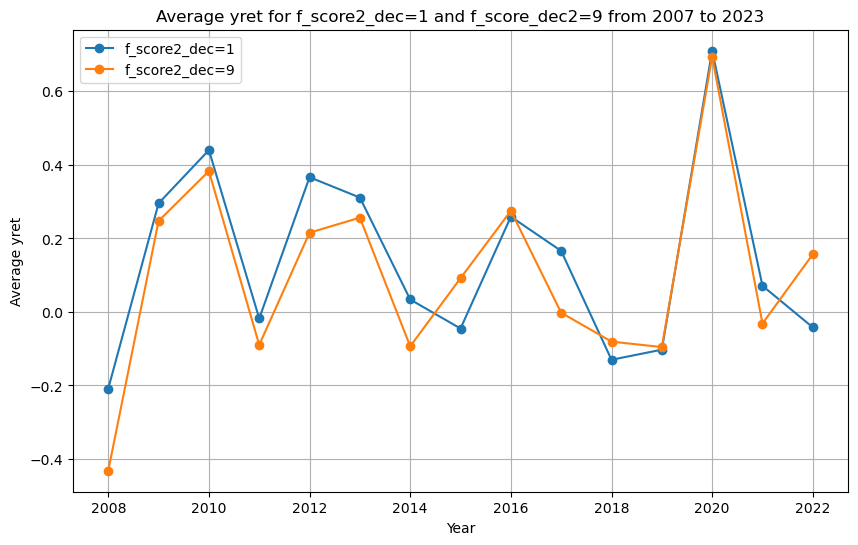

In [81]:
# 9 line chart of stock returns of the highest and lowes Fscore2

#import pandas as pd
#import matplotlib.pyplot as plt

# Assume f_score_highBM_df already exists and contains the required data
years = range(2007, 2023)

# Store the average yret for each year
mean_yret_fscore_dec_1 = []
mean_yret_fscore_dec_9 = []

for year in years:
    # Select companies where f_score_dec is 1 and calculate the mean yret
    mean_yret_1 = f_score_highBM_df[(f_score_highBM_df['pfy'] == year) & (f_score_highBM_df['f_score2_dec'] == 1)]['yret'].mean()
    mean_yret_fscore_dec_1.append(mean_yret_1)

    # Select companies where f_score_dec is 9 and calculate the mean yret
    mean_yret_9 = f_score_highBM_df[(f_score_highBM_df['pfy'] == year) & (f_score_highBM_df['f_score2_dec'] == 9)]['yret'].mean()
    mean_yret_fscore_dec_9.append(mean_yret_9)

# Create a DataFrame to store the results for plotting
result_df = pd.DataFrame({
    'Year': years,
    'f_score_dec_1': mean_yret_fscore_dec_1,
    'f_score_dec_9': mean_yret_fscore_dec_9
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['f_score_dec_1'], label='f_score2_dec=1', marker='o')
plt.plot(result_df['Year'], result_df['f_score_dec_9'], label='f_score2_dec=9', marker='o')

plt.title('Average yret for f_score2_dec=1 and f_score_dec2=9 from 2007 to 2023')
plt.xlabel('Year')
plt.ylabel('Average yret')
plt.legend()
plt.grid(True)
plt.show()


## Instrinsic Value

### Compute Safety Margin
- 1.Compute Enterprise Value and The Value of Growing Firm
- 2.Compute Safety Margin

In [82]:
# Sort values by 'gvkey' and 'pfy'
financial_beta_rf_df = financial_beta_rf_df.sort_values(by=['gvkey', 'pfy'])

# Compute interest=bearing debts
financial_beta_rf_df['ib_debt'] = financial_beta_rf_df['dlc'] + financial_beta_rf_df['dltt']

# Calculate enterprise value
financial_beta_rf_df['enterprise_v'] = (financial_beta_rf_df['seq'] + financial_beta_rf_df['ib_debt'] - financial_beta_rf_df['che']
                      + financial_beta_rf_df['pstk'] + financial_beta_rf_df['mibt'])

# Calculate ROIC
financial_beta_rf_df['roic'] = financial_beta_rf_df['ni'] / financial_beta_rf_df.groupby('gvkey')['seq'].transform('mean')

# Reset index
financial_beta_rf_df.reset_index(drop=True, inplace=True)

# Calculate growth rate (g)
financial_beta_rf_df['g'] = financial_beta_rf_df.groupby('gvkey')['ib'].pct_change()

#Calculate effective tax rate
financial_beta_rf_df['tax_rate'] = financial_beta_rf_df['txt'] / (financial_beta_rf_df['ib']+financial_beta_rf_df['txt'])

# Calculate WACC
# limitation: used interest / interest=bearing debts instead of YTM
financial_beta_rf_df['wacc'] = (financial_beta_rf_df['ib_debt'] / (financial_beta_rf_df['ib_debt'] + financial_beta_rf_df['seq']) *
                                financial_beta_rf_df['xint'] / financial_beta_rf_df['ib_debt'] * (1-financial_beta_rf_df['tax_rate']) +
                                financial_beta_rf_df['seq'] / (financial_beta_rf_df['ib_debt'] + financial_beta_rf_df['seq']) *
                                financial_beta_rf_df['cost_of_equity'])

# Calculate going firm value
# limitation:only have the debts data, do not have the full data of long term finnacial liability
financial_beta_rf_df['net_op_asset'] = financial_beta_rf_df['at'] - financial_beta_rf_df['che'] - (financial_beta_rf_df['lct'] - financial_beta_rf_df['dlc'])
financial_beta_rf_df['going_firm_v'] = ((financial_beta_rf_df['net_op_asset']) *
                                        (financial_beta_rf_df['roic'] - financial_beta_rf_df['g']) /
                                        (financial_beta_rf_df['wacc'] - financial_beta_rf_df['g']))


# Calculate safety margin proxy
financial_beta_rf_df['net_financial_lt'] = financial_beta_rf_df['dltt']+financial_beta_rf_df['dlc'] - financial_beta_rf_df['che']
financial_beta_rf_df['intrinsic_value_equity'] = financial_beta_rf_df['going_firm_v'] - financial_beta_rf_df['net_financial_lt']
financial_beta_rf_df['enterprise_value_equity'] = financial_beta_rf_df['enterprise_v'] - financial_beta_rf_df['net_financial_lt']


financial_beta_rf_df['safety_margin_proxy_iv'] = (financial_beta_rf_df['intrinsic_value_equity'] - financial_beta_rf_df['mkvalt']) / financial_beta_rf_df['intrinsic_value_equity']
financial_beta_rf_df['safety_margin_proxy_ev'] = (financial_beta_rf_df['enterprise_value_equity'] - financial_beta_rf_df['mkvalt']) / financial_beta_rf_df['enterprise_value_equity']

# Display the updated DataFrame
print(financial_beta_rf_df)


        gvkey   datadate  fyear indfmt consol popsrc datafmt   tic  \
0        1004 2007-05-31   2006   INDL      C      D     STD   AIR   
1        1004 2011-05-31   2010   INDL      C      D     STD   AIR   
2        1004 2015-05-31   2014   INDL      C      D     STD   AIR   
3        1004 2017-05-31   2016   INDL      C      D     STD   AIR   
4        1004 2018-05-31   2017   INDL      C      D     STD   AIR   
...       ...        ...    ...    ...    ...    ...     ...   ...   
15802  328795 2019-12-31   2019   INDL      C      D     STD   ACA   
15803  328795 2020-12-31   2020   INDL      C      D     STD   ACA   
15804  328795 2021-12-31   2021   INDL      C      D     STD   ACA   
15805  339965 2021-01-31   2020   INDL      C      D     STD  SNOW   
15806  339965 2022-01-31   2021   INDL      C      D     STD  SNOW   

                conm curcd  fyr       act       ap        at       che  \
0           AAR CORP   USD    5   645.721  110.239  1067.633    83.317   
1          

In [83]:
# winsorise enterprise value and intrinsic value
financial_beta_rf_df['safety_margin_proxy_ev'] = winsorize(financial_beta_rf_df['safety_margin_proxy_ev'], limits=[wlimit, wlimit])
financial_beta_rf_df['safety_margin_proxy_iv'] = winsorize(financial_beta_rf_df['safety_margin_proxy_iv'], limits=[wlimit, wlimit])


In [84]:
#drop na values
intrinsic_data = financial_beta_rf_df.dropna()

# Check size of the intrinsic value data
#financial_beta_rf_df.info()
intrinsic_data.info() # 9004 data points

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10153 entries, 2 to 15804
Data columns (total 94 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   gvkey                    10153 non-null  int64         
 1   datadate                 10153 non-null  datetime64[ns]
 2   fyear                    10153 non-null  int64         
 3   indfmt                   10153 non-null  object        
 4   consol                   10153 non-null  object        
 5   popsrc                   10153 non-null  object        
 6   datafmt                  10153 non-null  object        
 7   tic                      10153 non-null  object        
 8   conm                     10153 non-null  object        
 9   curcd                    10153 non-null  object        
 10  fyr                      10153 non-null  int64         
 11  act                      10153 non-null  float64       
 12  ap                       10153 n

In [85]:
# check result
columns_to_describe = ['enterprise_v','going_firm_v','intrinsic_value_equity','enterprise_value_equity','g','wacc','roic','safety_margin_proxy_ev','safety_margin_proxy_iv','BM_ratio']
intrinsic_data[columns_to_describe].describe().round(2)

,enterprise_v,going_firm_v,intrinsic_value_equity,enterprise_value_equity,g,wacc,roic,safety_margin_proxy_ev,safety_margin_proxy_iv,BM_ratio
count,10153.00,10153.00,10153.00,10153.00,10153.00,10153.00,10153.00,10153.00,10153.00,10153.00
mean,5584.70,14917.92,12974.84,3641.61,-0.27,inf,0.22,-4.48,1.88,0.34
std,7014.19,631325.14,631137.12,4571.89,41.73,NaN,0.79,6.24,46.16,0.21
min,-1726.03,-41030800.24,-41032389.32,46.12,-3414.09,-0.94,-7.47,-25.33,-9.36,0.03
25%,1012.00,368.56,268.45,771.74,-0.30,0.02,0.07,-4.34,-1.83,0.18
50%,2451.97,2027.44,1529.06,1601.71,0.00,0.03,0.15,-2.33,-0.25,0.30
75%,6850.00,8520.78,6147.80,4279.41,0.29,0.03,0.24,-1.12,0.82,0.46
max,29563.61,22844769.64,22836303.00,16160.23,1567.00,inf,37.36,-0.21,2623.68,0.81


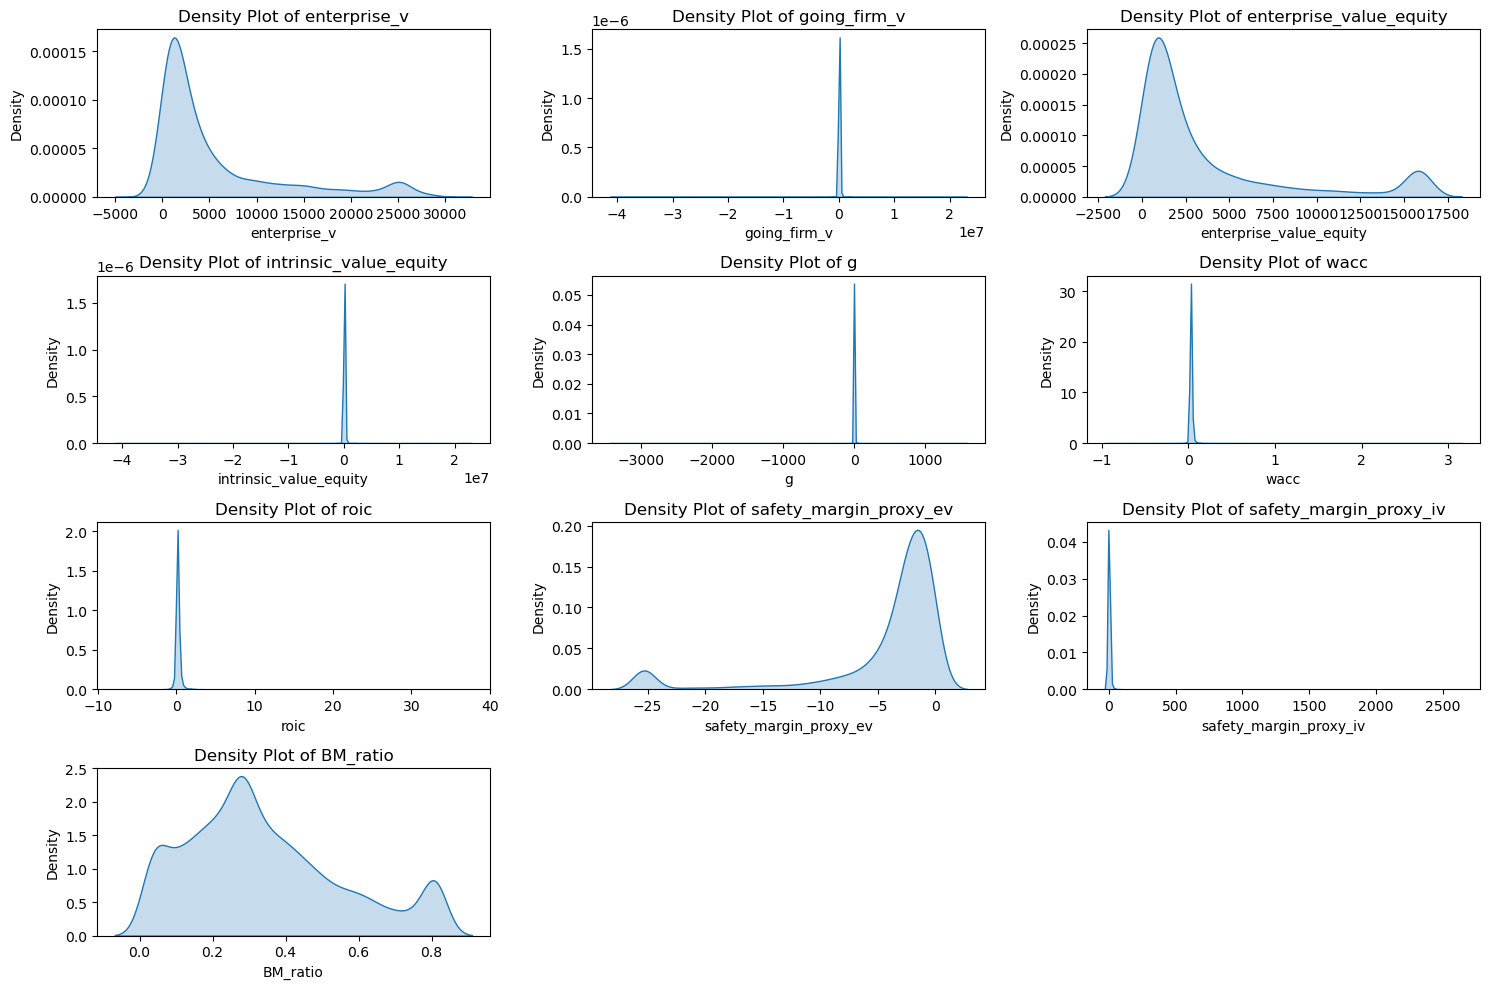

In [86]:
# List of ratios to plot
ratios = ['enterprise_v','going_firm_v','enterprise_value_equity','intrinsic_value_equity','g','wacc','roic','safety_margin_proxy_ev','safety_margin_proxy_iv','BM_ratio']

# Plot density for each ratio
plt.figure(figsize=(15, 10))

for i, ratio in enumerate(ratios):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(intrinsic_data[ratio], shade=True)
    plt.title(f'Density Plot of {ratio}')
    plt.xlabel(ratio)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Validate Safety Margin

In [87]:
### Annual returns on 10 decile portfolios sorted year-by-year on enterprise value
intrinsic_data['safety_margin_proxy_ev'] = intrinsic_data.groupby('pfy')['safety_margin_proxy_ev'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
print(intrinsic_data.groupby('safety_margin_proxy_ev')[['safety_margin_proxy_ev','yret']].agg(['count', 'mean']))

### Annual returns on 10 decile portfolios sorted year-by-year on intrinsic value
intrinsic_data['safety_margin_proxy_iv'] = intrinsic_data.groupby('pfy')['safety_margin_proxy_iv'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
print(intrinsic_data.groupby('safety_margin_proxy_iv')[['safety_margin_proxy_iv','yret']].agg(['count', 'mean']))

# two safety margin proxies shows higher stock returns comes from both ends, the largest safety_margin group and the samllest group

                       safety_margin_proxy_ev       yret          
                                        count mean count      mean
safety_margin_proxy_ev                                            
0                                        1023  0.0  1023  0.169891
1                                        1013  1.0  1013  0.141767
2                                        1014  2.0  1014  0.146798
3                                        1015  3.0  1015  0.141501
4                                        1017  4.0  1017  0.138013
5                                        1009  5.0  1009  0.155306
6                                        1015  6.0  1015  0.139475
7                                        1014  7.0  1014  0.142389
8                                        1057  8.0  1057  0.133986
9                                         976  9.0   976  0.153856
                       safety_margin_proxy_iv       yret          
                                        count mean count      

/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/175166641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intrinsic_data['safety_margin_proxy_ev'] = intrinsic_data.groupby('pfy')['safety_margin_proxy_ev'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/175166641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intrinsic_data['safety_margin_proxy_iv'] = intrinsic_data.groupby('pfy')[

In [88]:
### Annual returns on 10 decile portfolios sorted year-by-year on market value
intrinsic_data['logmv_win'] = intrinsic_data.groupby('pfy')['logmv_win'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
intrinsic_data.groupby('logmv_win')[['logmv_win','yret_win']].agg(['count', 'mean'])

/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/3989910949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intrinsic_data['logmv_win'] = intrinsic_data.groupby('pfy')['logmv_win'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer


logmv_win      yret_win          
              count mean    count      mean
logmv_win                                  
0              1023  0.0     1023  0.145021
1              1013  1.0     1013  0.144161
2              1013  2.0     1013  0.134413
3              1016  3.0     1016  0.112762
4              1016  4.0     1016  0.155201
5              1010  5.0     1010  0.138604
6              1015  6.0     1015  0.134738
7              1014  7.0     1014  0.131243
8              1109  8.0     1109  0.143008
9               924  9.0      924  0.121734

In [89]:
# Annual returns on 10x10 portfolios sorted independently year-by-year on enterprise value and firm size (log of market cap)
intrinsic_data_pivot_ev = pd.pivot_table(intrinsic_data, index='safety_margin_proxy_ev', columns='logmv_win',
               values='yret_win', aggfunc=np.mean)
display(intrinsic_data_pivot_ev)

# Annual returns on 10x10 portfolios sorted independently year-by-year on intrinsic value and firm size (log of market cap)
intrinsic_data_pivot_iv = pd.pivot_table(intrinsic_data, index='safety_margin_proxy_iv', columns='logmv_win',
               values='yret_win', aggfunc=np.mean)
display(intrinsic_data_pivot_iv)

logmv_win,0,1,2,3,4,5,6,7,8,9
safety_margin_proxy_ev,,,,,,,,,,
0,0.182358,0.253076,0.156299,0.074210,0.189428,0.185867,0.167647,0.126833,0.175599,0.169624
1,0.122880,0.122414,0.176422,0.097307,0.182187,0.082470,0.113044,0.169345,0.157442,0.132442
2,0.214155,0.152735,0.074852,0.120254,0.171826,0.156175,0.132409,0.107175,0.170371,0.164956
3,0.148506,0.154479,0.109745,0.071642,0.182871,0.135254,0.141162,0.116412,0.166000,0.128728
4,0.088449,0.199531,0.194197,0.132353,0.161255,0.233752,0.089155,0.122804,0.114035,0.065506
5,0.163944,0.138730,0.171878,0.160314,0.128141,0.081557,0.221456,0.149422,0.163132,0.109007
6,0.113716,0.100454,0.142049,0.130438,0.133104,0.143871,0.151274,0.135645,0.117653,0.191729
7,0.170537,0.125170,0.115211,0.132002,0.126413,0.096121,0.145993,0.131439,0.097148,0.895841
8,0.123308,0.130181,0.153068,0.070237,0.164464,0.138455,0.098103,0.134142,0.088267,NaN


logmv_win,0,1,2,3,4,5,6,7,8,9
safety_margin_proxy_iv,,,,,,,,,,
0,0.127330,0.189832,0.129297,0.115169,0.197274,0.162292,0.111193,0.141563,0.173002,0.148727
1,0.195273,0.211713,0.132216,0.110979,0.158399,0.135119,0.133618,0.112244,0.146450,0.039591
2,0.118665,0.138256,0.182690,0.110460,0.159758,0.149763,0.138809,0.103296,0.107493,0.098206
3,0.198332,0.137989,0.104886,0.099437,0.175978,0.044824,0.141905,0.138320,0.136473,0.104513
4,0.121825,0.084923,0.164767,0.079511,0.107353,0.137268,0.207855,0.161815,0.060848,0.151438
5,0.149851,0.144235,0.116832,0.085959,0.137932,0.100184,0.144195,0.122716,0.135891,0.112627
6,0.090321,0.122851,0.070903,0.175741,0.132693,0.132085,0.123151,0.116507,0.200579,0.124793
7,0.267621,0.166207,0.183203,0.096208,0.147265,0.160265,0.146013,0.136513,0.177316,0.123719
8,0.141189,0.133294,0.130097,0.083303,0.151754,0.170610,0.162331,0.152491,0.154674,0.144127


In [90]:
# run regression to analyse significance of safety margin against yearly return
# Define the OLS regression function
def olsreg(d, yvar, xvars):
    Y = d[yvar]
    X = sma.add_constant(d[xvars])  # Add a constant term (intercept term) to the independent variable data
    reg = sma.OLS(Y, X).fit()
    return reg

# List of F-score components to regress
safety_margin_components = ['safety_margin_proxy_iv', 'safety_margin_proxy_ev']

# Group the data by year
intrinsic_data_group = intrinsic_data.groupby('pfy')

# Initialize a dictionary to store coefficients, t-stats, and p-values
tstats_pvalues = {'component': [], 'coef': [], 't-stat': [], 'p-value': []}

# Perform year-by-year regressions and store results
yearcoef_dict = {}
for component in safety_margin_components:
    yearcoef = intrinsic_data_group.apply(lambda d: olsreg(d, 'yret_win', component).params[component])
    yearcoef_dict[component] = yearcoef

    # Print the coefficients
    print(f'Coefficients of year-by-year regressions for {component}\n', yearcoef, '\n'*4)
    print(f'Summary statistics of year-by-year regression coefficients for {component}\n', yearcoef.describe().round(4), '\n'*4)

    # Perform t-test
    tstat, pval = scs.ttest_1samp(yearcoef, 0)
    print(f'Time series t-statistics and p-values of year-by-year regression coefficients for {component}\n')
    print(pd.DataFrame({'t-stat': tstat.round(4), 'p-value': pval.round(4)}, index=[component]), '\n'*4)

    # Store coefficients, t-stats, and p-values in the dictionary
    tstats_pvalues['component'].append(component)
    tstats_pvalues['coef'].append(yearcoef.mean())  # mean coefficient for the component
    tstats_pvalues['t-stat'].append(tstat)  # t-stat for the component
    tstats_pvalues['p-value'].append(pval)  # p-value for the component

    # Print regression summary for each year
    #for year, group in intrinsic_data_group:
    #    reg_result = olsreg(group, 'yret_win', component)
    #    print(f'Regression summary for {component} in year {year}\n')
    #    print(reg_result.summary(), '\n'*4)

# Convert the dictionary to a DataFrame
tstats_pvalues_df = pd.DataFrame(tstats_pvalues)
print(tstats_pvalues_df)

Coefficients of year-by-year regressions for safety_margin_proxy_iv
 pfy
2008    0.002957
2009    0.001632
2010   -0.008501
2011    0.001524
2012   -0.004427
2013   -0.005165
2014   -0.002976
2015    0.001485
2016   -0.010153
2017   -0.003664
2018   -0.005023
2019   -0.012498
2020    0.009364
2021    0.020096
2022   -0.000310
dtype: float64 




Summary statistics of year-by-year regression coefficients for safety_margin_proxy_iv
 count    15.0000
mean     -0.0010
std       0.0081
min      -0.0125
25%      -0.0051
50%      -0.0030
75%       0.0016
max       0.0201
dtype: float64 




Time series t-statistics and p-values of year-by-year regression coefficients for safety_margin_proxy_iv

                        t-stat  p-value
safety_margin_proxy_iv -0.4997   0.6251 




Coefficients of year-by-year regressions for safety_margin_proxy_ev
 pfy
2008   -0.008985
2009    0.010717
2010    0.006399
2011   -0.015887
2012    0.007611
2013    0.006716
2014   -0.019498
2015   -0.004226
2016   -0

## Z Score

Zscore can be used to evaluate financial stress and company credit. Usually the higher the Zscore is , the more financial health the company could be.

### Build z score

In [91]:
# calculate componets
financial_beta_rf_df['wcap_at'] = financial_beta_rf_df['wcap'] / financial_beta_rf_df['at']
financial_beta_rf_df['re_at'] = financial_beta_rf_df['re'] / financial_beta_rf_df['at']
financial_beta_rf_df['ebit_at'] = financial_beta_rf_df['ebit'] / financial_beta_rf_df['at']
financial_beta_rf_df['mve_lt'] = financial_beta_rf_df['mkvalt'] / (financial_beta_rf_df['dltt']+financial_beta_rf_df['lct']) # lt
financial_beta_rf_df['revt_at'] = financial_beta_rf_df['revt'] / financial_beta_rf_df['at']

In [92]:
# check any infinite data
columns_to_describe = ['wcap_at','re_at','ebit_at','mve_lt','revt_at']
financial_beta_rf_df[columns_to_describe].describe().round(2)


,wcap_at,re_at,ebit_at,mve_lt,revt_at
count,15807.00,15807.00,15807.00,15807.00,15807.00
mean,0.20,0.19,0.10,7.50,0.92
std,0.19,0.46,0.09,13.79,0.67
min,-0.94,-4.22,-0.38,0.09,0.01
25%,0.06,0.01,0.06,1.87,0.49
50%,0.16,0.25,0.10,3.25,0.78
75%,0.30,0.42,0.14,7.27,1.14
max,1.37,2.53,0.83,545.68,13.18


In [93]:
# zscore
# Z = 1.2 * wcap_at + 1.4 * re_at + 3.3 * ebit_at + 0.6 * mve_lt + 0.999 * revt_at)
financial_beta_rf_df['zscore'] = 1.2*financial_beta_rf_df['wcap_at']+1.4*financial_beta_rf_df['re_at']+3.3*financial_beta_rf_df['ebit_at']+0.6*financial_beta_rf_df['mve_lt']+0.999*financial_beta_rf_df['revt_at']


In [94]:
# descriptive statistics of z score
financial_beta_rf_df['zscore'].describe()

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    15807.000000
mean         6.235707
std          8.320291
min         -3.518620
25%          2.676905
50%          3.879413
75%          6.662449
max        328.298655
Name: zscore, dtype: float64

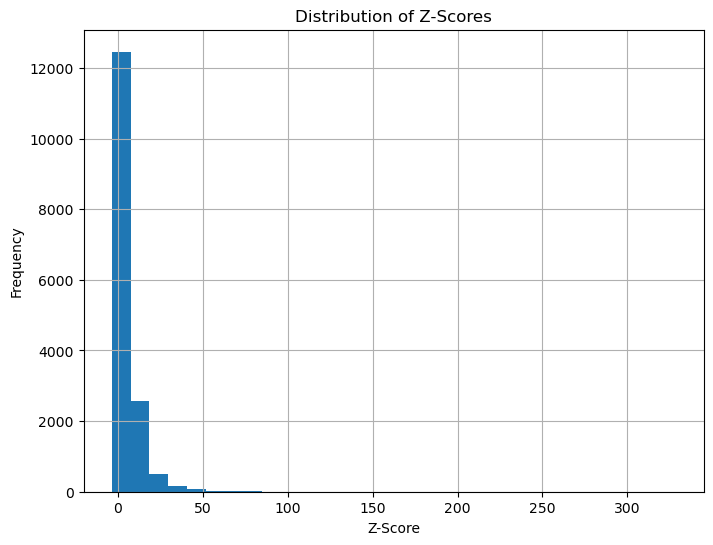

In [95]:
# plot bar chart of Zscore
financial_beta_rf_df['zscore'].hist(bins=30, figsize=(8,6))
plt.title('Distribution of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.show()

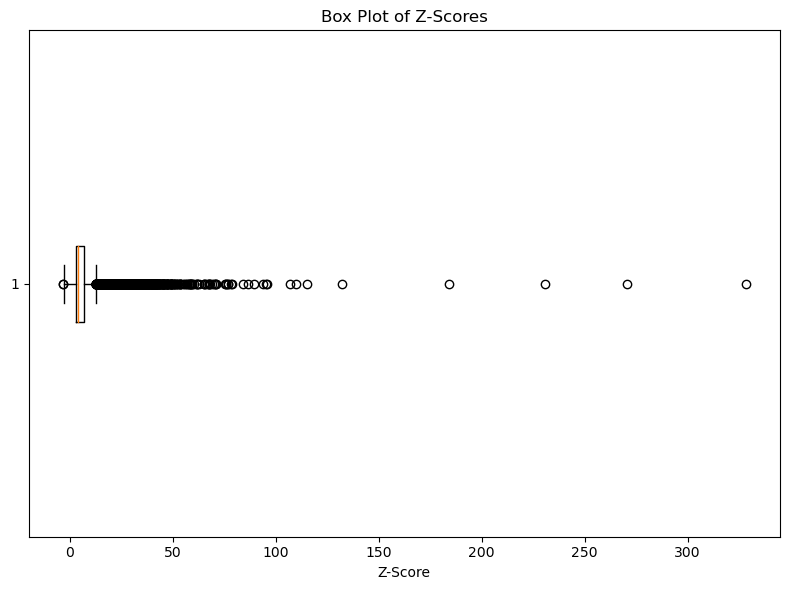

In [96]:
# boxplot
plt.figure(figsize=(8,6))
plt.boxplot(financial_beta_rf_df['zscore'], vert=False)
plt.title('Box Plot of Z-Scores')
plt.xlabel('Z-Score')
plt.tight_layout()
plt.show()

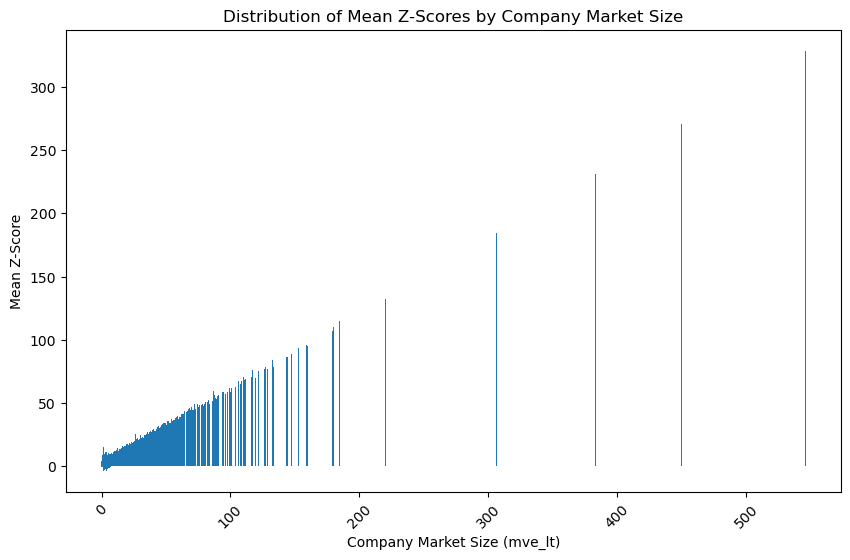

In [97]:
# Group by mve lt and calculate the mean zscore for each group
zscore_grouped = financial_beta_rf_df.groupby('mve_lt')['zscore'].mean().reset_index()

# bar plot
plt.figure(figsize=(10,6))
plt.bar(zscore_grouped['mve_lt'], zscore_grouped['zscore'])
plt.xlabel('Company Market Size (mve_lt)')
plt.ylabel('Mean Z-Score')
plt.title('Distribution of Mean Z-Scores by Company Market Size')
plt.xticks(rotation=45)
plt.show()

### Label company by Zscore

According to Altman Z Score, the cut-off points are usually:
- Z>2.67 Non-distress Zone
- 1.81<Z<2.67 Grey Zone
- Z<1.81 Distress Zone

In [98]:
# glance at distressed companies whose zscore is below 1.81
financial_beta_rf_df[financial_beta_rf_df['zscore']<1.81].pivot_table(index='gvkey', values='zscore', aggfunc='mean').sort_values(by='zscore', ascending=True)


,zscore
gvkey,
19471,-2.112755
29127,-1.541459
30137,-1.260166
31843,-1.239196
160668,-1.132711
...,...
33647,1.798151
14624,1.803433
185836,1.803710


In [99]:
# creat function to label company financial distress
def label_company(z):
    if z < 1.81:
        return 'Distress Zone'
    elif z <= 2.67:
        return 'Grey Zone'
    else:
        return 'Non-distress Zone'

# label company
financial_beta_rf_df['z_label'] = financial_beta_rf_df['zscore'].apply(label_company)

In [100]:
# setsub of zscore
signal_z = financial_beta_rf_df[['gvkey','pfy','logmv_win','zscore','yret_win','z_label']]
signal_z = signal_z.dropna()
signal_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gvkey      15807 non-null  int64  
 1   pfy        15807 non-null  int64  
 2   logmv_win  15807 non-null  float64
 3   zscore     15807 non-null  float64
 4   yret_win   15807 non-null  float64
 5   z_label    15807 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 741.1+ KB


In [101]:
# stock return by z_label
signal_z['logmv_dec'] = signal_z.groupby('pfy')['logmv_win'].transform(pd.qcut, 10, labels=False)
pd.pivot_table(signal_z, index = 'z_label', columns = 'logmv_dec',values = 'yret_win', aggfunc = np.mean)

# The highest market capitalization stocks and the lowest market capitalization stocks both seem to exhibit this pattern:
# as the Z-score decreases, indicating greater financial distress, the company's stock returns tend to be higher.

logmv_dec,0,1,2,3,4,5,6,7,8,9
z_label,,,,,,,,,,
Distress Zone,0.217819,0.142576,0.124930,0.161994,0.135095,0.158264,0.159814,0.145648,0.108914,0.258562
Grey Zone,0.134799,0.160890,0.169722,0.130953,0.165766,0.128437,0.117703,0.104754,0.136264,0.178030
Non-distress Zone,0.122563,0.132700,0.144421,0.105326,0.112855,0.140607,0.136682,0.111982,0.126509,0.116775


In [102]:
## cut off all the outliers which are zscore above 10
signal_z_cut = signal_z[signal_z['zscore']<5]

## pivot table of truncated zscore
pd.pivot_table(signal_z_cut, index = 'z_label', columns = 'logmv_dec',values = 'yret_win', aggfunc = np.mean)



logmv_dec,0,1,2,3,4,5,6,7,8,9
z_label,,,,,,,,,,
Distress Zone,0.217819,0.142576,0.124930,0.161994,0.135095,0.158264,0.159814,0.145648,0.108914,0.258562
Grey Zone,0.134799,0.160890,0.169722,0.130953,0.165766,0.128437,0.117703,0.104754,0.136264,0.178030
Non-distress Zone,0.131732,0.138157,0.148616,0.114887,0.121937,0.143628,0.149260,0.120226,0.127736,0.117687


### Validate the signal

In [103]:
# prepare decile matrix
# decimal matrix of truncated zscore
signal_z['z_quantitle'] = signal_z.groupby('pfy')['zscore'].transform(pd.qcut, 10, labels=False)

pd.pivot_table(signal_z, index='z_quantitle', columns='logmv_dec',values='yret_win', aggfunc=np.mean)

# The relationship between annual stock returns and Z-score does not appear to be consistent across the ten groups of stocks divided by market capitalization.

logmv_dec,0,1,2,3,4,5,6,7,8,9
z_quantitle,,,,,,,,,,
0,0.232394,0.135310,0.132359,0.150482,0.154765,0.130863,0.140318,0.134396,0.062178,0.155296
1,0.125347,0.129043,0.161211,0.105406,0.087120,0.134117,0.131306,0.110894,0.147578,0.185598
2,0.148533,0.181035,0.102640,0.126766,0.179102,0.153732,0.134064,0.072684,0.124571,0.115759
3,0.103566,0.126541,0.144622,0.126013,0.098546,0.121406,0.132744,0.141565,0.135183,0.118226
4,0.134105,0.146829,0.164189,0.113528,0.112062,0.155292,0.125236,0.119478,0.117093,0.106814
5,0.150156,0.121708,0.163009,0.117050,0.129391,0.114000,0.181246,0.117670,0.124707,0.139193
6,0.100605,0.098847,0.161247,0.149427,0.119257,0.158279,0.126690,0.120519,0.181041,0.111065
7,0.104904,0.182321,0.149375,0.116786,0.165289,0.121542,0.130896,0.109434,0.127478,0.130256
8,0.112989,0.135549,0.156931,0.097487,0.094166,0.131156,0.097520,0.143293,0.113526,0.166131


In [104]:
# truncated zscore decile matrix
signal_z_cut['z_quantitle'] = signal_z_cut.groupby('pfy')['zscore'].transform(pd.qcut, 10, labels=False)

#signal_z_cut['logmv_dec'] = signal_z_cut.groupby('pfy')['logmv'].transform(pd.qcut, 10, labels=False)
pd.pivot_table(signal_z_cut, index='z_quantitle', columns='logmv_dec',values='yret_win', aggfunc=np.mean)

/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/3557215195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_z_cut['z_quantitle'] = signal_z_cut.groupby('pfy')['zscore'].transform(pd.qcut, 10, labels=False)


logmv_dec,0,1,2,3,4,5,6,7,8,9
z_quantitle,,,,,,,,,,
0,0.216280,0.152439,0.106972,0.188088,0.128838,0.147196,0.188324,0.133081,0.103289,0.222749
1,0.209030,0.128916,0.151459,0.102936,0.156913,0.144626,0.105117,0.137710,0.092220,0.215084
2,0.122235,0.112663,0.217418,0.094293,0.095497,0.130412,0.131441,0.111348,0.148165,0.207810
3,0.108245,0.205036,0.154342,0.136312,0.189270,0.139725,0.108363,0.090603,0.131389,0.105901
4,0.186545,0.126198,0.050258,0.156002,0.148066,0.153533,0.170000,0.055897,0.139677,0.143941
5,0.108409,0.158542,0.183542,0.105929,0.113254,0.132954,0.127360,0.159166,0.137979,0.101597
6,0.111860,0.132974,0.187302,0.115924,0.111941,0.167907,0.143250,0.124629,0.122244,0.132526
7,0.166623,0.171083,0.120573,0.115769,0.129244,0.154224,0.143375,0.152879,0.131928,0.098009
8,0.131787,0.145293,0.164731,0.126047,0.103056,0.114768,0.210655,0.111124,0.089674,0.151116


In [105]:
# OLS regression of HSBC against HSI
reg1 = smf.ols(formula='yret_win ~ zscore',data = signal_z).fit()
print(reg1.summary())

# Althoug the parttern is not obvious, the regression result indicate zscore is statistically significant.

                            OLS Regression Results                            
Dep. Variable:               yret_win   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.721
Date:                Tue, 18 Jun 2024   Prob (F-statistic):            0.00315
Time:                        01:24:02   Log-Likelihood:                -5153.5
No. Observations:               15807   AIC:                         1.031e+04
Df Residuals:                   15805   BIC:                         1.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1358      0.003     40.758      0.0

In [106]:
# Fit the Logit model with the data that has been added with the z label column
logit_model_label = smf.ols(formula='yret_win ~ z_label', data=financial_beta_rf_df).fit()
print(logit_model_label.summary())

                            OLS Regression Results                            
Dep. Variable:               yret_win   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.068
Date:                Tue, 18 Jun 2024   Prob (F-statistic):            0.00232
Time:                        01:24:02   Log-Likelihood:                -5151.8
No. Observations:               15807   AIC:                         1.031e+04
Df Residuals:                   15804   BIC:                         1.033e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## V/P Ratio

###Forecast Earnings From Analysts

In [107]:
#load one year ahead eps forecast from analysts
forecast_eps_fy1 = pd.read_csv('eps_forecast_fy1.csv')
print(forecast_eps_fy1.info())

#load two year ahead eps forecast from analysts
forecast_eps_fy2 = pd.read_csv('eps_forecast_fy2.csv')
print(forecast_eps_fy2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303739 entries, 0 to 3303738
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   TICKER       object 
 1   CUSIP        object 
 2   OFTIC        object 
 3   CNAME        object 
 4   ANALYS       int64  
 5   FPI          int64  
 6   MEASURE      object 
 7   VALUE        float64
 8   FPEDATS      object 
 9   ANNDATS      object 
 10  ACTUAL       float64
 11  ANNDATS_ACT  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 302.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190306 entries, 0 to 3190305
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   TICKER       object 
 1   CUSIP        object 
 2   OFTIC        object 
 3   CNAME        object 
 4   ANALYS       int64  
 5   FPI          int64  
 6   MEASURE      object 
 7   VALUE        float64
 8   FPEDATS      object 
 9   ANNDATS      object 
 10  ACTUAL       float64
 11

In [108]:
##processing forecast_eps_fy1 data
#convert the 'FPEDATS' column to datetime format for forecast_eps_fy1
forecast_eps_fy1['FPEDATS'] = pd.to_datetime(forecast_eps_fy1['FPEDATS'])
forecast_eps_fy1['ANNDATS_ACT'] = pd.to_datetime(forecast_eps_fy1['ANNDATS_ACT'])
forecast_eps_fy1['ANNDATS'] = pd.to_datetime(forecast_eps_fy1['ANNDATS'])

#extract the year from the 'FPEDATS' column and obtain fy1 (forecast year - 1 year ahead)
forecast_eps_fy1['forecast_year1'] = forecast_eps_fy1['FPEDATS'].dt.year +1

#FPEDATS is therefore the pfy
forecast_eps_fy1['pfy'] = forecast_eps_fy1['ANNDATS'].dt.year

In [109]:
##processing forecast_eps_fy2 data
#convert the 'FPEDATS' column to datetime format for forecast_eps_fy2
forecast_eps_fy2['FPEDATS'] = pd.to_datetime(forecast_eps_fy2['FPEDATS'])
forecast_eps_fy2['ANNDATS_ACT'] = pd.to_datetime(forecast_eps_fy2['ANNDATS_ACT'])
forecast_eps_fy2['ANNDATS'] = pd.to_datetime(forecast_eps_fy2['ANNDATS'])

#extract the year from the 'FPEDATS' column and obtain forecast year (2 year ahead)
forecast_eps_fy2['forecast_year2'] = forecast_eps_fy2['FPEDATS'].dt.year + 1

#FPEDATS is therefore the pfy
forecast_eps_fy2['pfy'] = forecast_eps_fy2['ANNDATS'].dt.year

In [110]:
print(forecast_eps_fy1.head())
print(forecast_eps_fy2.head())

  TICKER     CUSIP OFTIC           CNAME  ANALYS  FPI MEASURE  VALUE  \
0   0000  87482X10  TLMR  TALMER BANCORP  119962    1     EPS   0.73   
1   0000  87482X10  TLMR  TALMER BANCORP   80474    1     EPS   0.83   
2   0000  87482X10  TLMR  TALMER BANCORP   50789    1     EPS   0.66   
3   0000  87482X10  TLMR  TALMER BANCORP   79092    1     EPS   0.80   
4   0000  87482X10  TLMR  TALMER BANCORP   71182    1     EPS   0.86   

     FPEDATS    ANNDATS  ACTUAL ANNDATS_ACT  forecast_year1   pfy  
0 2014-12-31 2014-03-09    1.21  2015-01-30            2015  2014  
1 2014-12-31 2014-03-10    1.21  2015-01-30            2015  2014  
2 2014-12-31 2014-03-10    1.21  2015-01-30            2015  2014  
3 2014-12-31 2014-03-10    1.21  2015-01-30            2015  2014  
4 2014-12-31 2014-03-17    1.21  2015-01-30            2015  2014  
  TICKER     CUSIP OFTIC           CNAME  ANALYS  FPI MEASURE  VALUE  \
0   0000  87482X10  TLMR  TALMER BANCORP  119962    2     EPS   0.90   
1   0000  87482

In [111]:
##processing forecast_eps_fy1 data
#rename fields in forecast_eps_fy1
forecast_eps_fy1.rename(columns={'OFTIC': 'tic'}, inplace=True)
forecast_eps_fy1.rename(columns={'VALUE': 'fy1_eps'}, inplace=True)
forecast_eps_fy1.rename(columns={'ACTUAL': 'actual_eps1'}, inplace=True)

In [112]:
##processing forecast_eps_fy2 data
#rename fields in forecast_eps_fy2
forecast_eps_fy2.rename(columns={'OFTIC': 'tic'}, inplace=True)
forecast_eps_fy2.rename(columns={'VALUE': 'fy2_eps'}, inplace=True)
forecast_eps_fy2.rename(columns={'ACTUAL': 'actual_eps2'}, inplace=True)

In [113]:
##processing forecast_eps_fy1 data
#retain only pfy, tic, forecast_eps, actual_eps
forecast_eps_fy1 = forecast_eps_fy1[['pfy', 'forecast_year1','tic','fy1_eps','actual_eps1']]
forecast_eps_fy1.head()

,pfy,forecast_year1,tic,fy1_eps,actual_eps1
0,2014,2015,TLMR,0.73,1.21
1,2014,2015,TLMR,0.83,1.21
2,2014,2015,TLMR,0.66,1.21
3,2014,2015,TLMR,0.80,1.21
4,2014,2015,TLMR,0.86,1.21


In [114]:
##processing forecast_eps_fy1 data
#group by 'pfy', 'tic' and compute the average of 'value'
forecast_eps_fy1 = forecast_eps_fy1.groupby(['pfy', 'tic'])['fy1_eps'].mean().round(2).reset_index()
forecast_eps_fy1.head()

,pfy,tic,fy1_eps
0,2006,A,1.64
1,2006,AA,8.88
2,2006,AACB,2.13
3,2006,AACC,1.35
4,2006,AACE,1.71


In [115]:
##processing forecast_eps_fy2 data
#retain only pfy, tic, forecast_eps, actual_eps
forecast_eps_fy2 = forecast_eps_fy2[['pfy', 'forecast_year2','tic','fy2_eps','actual_eps2']]
forecast_eps_fy2.head()

,pfy,forecast_year2,tic,fy2_eps,actual_eps2
0,2014,2016,TLMR,0.90,1.02
1,2014,2016,TLMR,0.78,1.02
2,2014,2016,TLMR,0.86,1.02
3,2014,2016,TLMR,0.86,1.02
4,2014,2016,TLMR,0.85,1.02


In [116]:
##processing forecast_eps_fy2 data
#group by 'pfy', 'tic' and compute the average of 'value'
forecast_eps_fy2 = forecast_eps_fy2.groupby(['pfy', 'tic'])['fy2_eps'].mean().round(2).reset_index()
forecast_eps_fy2.head()

,pfy,tic,fy2_eps
0,2006,A,1.88
1,2006,AA,9.34
2,2006,AACB,2.78
3,2006,AACC,1.53
4,2006,AACE,2.23


In [117]:
forecast_eps_fy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93840 entries, 0 to 93839
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pfy      93840 non-null  int64  
 1   tic      93840 non-null  object 
 2   fy1_eps  93840 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [118]:
from scipy.stats.mstats import winsorize

#set winsorized tail limits (% of left and right tails)
wlimit = 0.025

#winsorize fy1_eps and fy2_eps
forecast_eps_fy1['fy1_eps'] = winsorize(forecast_eps_fy1['fy1_eps'], limits=[wlimit, wlimit])
forecast_eps_fy2['fy2_eps'] = winsorize(forecast_eps_fy2['fy2_eps'], limits=[wlimit, wlimit])

In [119]:
##checking forecast_eps_fy1 data
forecast_eps_fy1.describe()

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,pfy,fy1_eps
count,93840.000000,93840.000000
mean,2014.966773,0.939200
std,5.449395,5.965264
min,2006.000000,-24.370000
25%,2010.000000,-0.030000
50%,2015.000000,0.900000
75%,2020.000000,2.400000
max,2024.000000,17.970000


In [120]:
##checking forecast_eps_fy2 data
forecast_eps_fy2.describe()

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,pfy,fy2_eps
count,93961.000000,93961.000000
mean,2014.985568,1.786564
std,5.455172,5.204559
min,2006.000000,-15.180000
25%,2010.000000,0.190000
50%,2015.000000,1.150000
75%,2020.000000,2.750000
max,2024.000000,21.190000


In [121]:
#drop rows where fy1_eps are NaN
forecast_eps_fy1 = forecast_eps_fy1.dropna(subset=['fy1_eps', 'pfy'])

#drop rows where fy2_eps are NaN
forecast_eps_fy2 = forecast_eps_fy2.dropna(subset=['fy2_eps', 'pfy'])

In [122]:
#check for NA values in forecast_eps_fy1 and forecast_eps_fy2
has_na_fy1 = forecast_eps_fy1.isna().any().any()
print (has_na_fy1)

has_na_fy2 = forecast_eps_fy2.isna().any().any()
print (has_na_fy2)

False
False


In [123]:
#merge forecast_eps_fy1 into financial ratios data
financial_beta_rf_df = pd.merge(financial_beta_rf_df, forecast_eps_fy1, how = 'inner', on = ['pfy','tic'])

In [124]:
#merge forecast_eps_fy2 into financial ratios data
financial_beta_rf_df = pd.merge(financial_beta_rf_df, forecast_eps_fy2, how = 'inner', on = ['pfy','tic'])
display(financial_beta_rf_df.head(5))
print(financial_beta_rf_df.info())

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win,annual_beta,sp500_rate,rf_rate,market_premium,cost_of_equity,at_lag,roa,cfo,roa_lag,roa_change,accrual,lever,lever_lag,lever_change,current_ratio,current_ratio_lag,liquid_change,eq_offer,gross_margin,gross_margin_lag,margin_change,asset_turnover,asset_turnover_lag,turn_change,f_score,logmv,logmv_win,BM_ratio,ib_debt,enterprise_v,roic,g,tax_rate,wacc,net_op_asset,going_firm_v,net_financial_lt,intrinsic_value_equity,enterprise_value_equity,safety_margin_proxy_iv,safety_margin_proxy_ev,wcap_at,re_at,ebit_at,mve_lt,revt_at,zscore,z_label,fy1_eps,fy2_eps
0,1004,2007-05-31,2006,INDL,C,D,STD,AIR,AAR CORP,USD,5,645.721,110.239,1067.633,83.317,837.171,37.729,74.245,253.611,327.856,0.000,86.708,118.907,59.447,342.593,256.506,573.390,0.0,58.660,-21.239,0.0,242.153,181.691,1061.169,1061.169,494.243,494.243,27.974,389.215,17.678,1750.0,A,1226.1925,32.50,20.0,5080,2007,5,2008,0.186253,0.186253,-0.327714,-0.327714,1.893940,-17.407596,3.648798,-21.056395,0.032500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.517372,NaN,NaN,1,0.211086,NaN,NaN,NaN,NaN,NaN,1,7.111669,7.111669,0.403071,327.856,738.782,0.069526,NaN,0.319992,0.034161,802.055,NaN,244.539,NaN,494.243,NaN,-1.480951,0.364559,0.226813,0.081215,2.403748,0.993945,3.458219,Non-distress Zone,1.90,2.27
1,1004,2011-05-31,2010,INDL,C,D,STD,AIR,AAR CORP,USD,5,913.985,185.096,1703.727,57.433,1408.071,39.781,114.075,329.802,343.877,2.983,137.016,196.312,73.139,507.274,416.010,868.438,0.0,69.826,108.598,0.0,467.485,296.489,1775.782,1775.782,835.845,835.289,35.364,497.975,30.670,1750.0,A,1124.8048,26.39,20.0,5080,2011,5,2012,0.660816,0.660816,-0.456639,-0.456639,7.906668,8.812869,1.785852,7.027017,0.023415,1067.633,0.068506,0.101718,NaN,NaN,-0.033213,0.238007,NaN,NaN,2.197027,2.517372,-0.320345,0,0.207070,0.211086,-0.004016,1.663289,NaN,NaN,2,7.025365,7.056252,0.743102,443.877,1222.289,0.082760,0.230323,0.325926,0.031448,1344.359,997.496329,386.444,611.052329,835.845,-0.840767,-0.345710,0.292286,0.274390,0.080421,1.508161,1.042293,2.946426,Non-distress Zone,1.76,1.97
2,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.100,142.300,1515.000,54.700,1342.700,35.423,69.000,85.000,154.000,11.900,-8.600,83.700,-54.500,566.700,412.000,669.900,0.0,10.200,-43.000,0.0,603.900,231.100,1594.300,1594.300,845.100,845.100,-28.500,542.100,26.500,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793,4.697870,1.629424,1.832641,-0.203218,0.018231,1703.727,-0.031989,-0.025239,0.068506,-0.100494,-0.006750,0.052816,0.238007,-0.185191,2.315777,2.197027,0.118750,1,0.157812,0.207070,-0.049258,0.935772,1.663289,-0.727517,4,7.025365,7.056252,0.751330,154.000,944.400,0.012089,-1.745156,0.343373,0.032837,1117.300,1104.262041,99.300,1004.962041,845.100,-0.119251,-0.330972,0.357822,0.398614,-0.005677,2.263189,1.052343,3.377917,Non-distress Zone,1.34,1.80
3,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.500,177.400,1504.100,21.846,1422.700,34.354,2.000,155.300,157.300,10.200,77.200,148.200,50.200,601.100,335.100,589.900,0.0,56.500,21.800,0.0,688.000,251.400,1767.600,1767.600,914.200,914.200,24.100,553.400,5.500,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886,1.225974,12.132648,2.913685,9.218962,0.030267,1515.000,0.033135,0.014389,-0.031989,0.065124,0.018746,0.102878,0.052816,0.050062,2.651447,2.315777,0.335671,1,0.195123,0.157812,0.037311,1.166733,0.935772,0.230961,6,7.090351,7.090351,0.761625,157.300,1049.654,0.066966,-1.921101,0.324361,0.029292,1149.154,1171.351257,135.454,1035.897257,914.200,-0.158733,-0.312983,0.367928,0.457416,0.051326,2.447653,1.175188,3.893877,Non-distress Zone,2.24,2.93
4,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.700,170.000,1524.700

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14094 entries, 0 to 14093
Columns: 103 entries, gvkey to fy2_eps
dtypes: datetime64[ns](1), float64(84), int64(9), object(9)
memory usage: 11.2+ MB
None


In [125]:
#financial_beta_rf_df.info()

In [126]:
financial_beta_rf_df[['fy1_eps','fy2_eps']].describe()

,fy1_eps,fy2_eps
count,14094.000000,14094.000000
mean,2.952796,3.441686
std,3.588299,3.798389
min,-24.370000,-15.180000
25%,1.120000,1.380000
50%,2.240000,2.590000
75%,4.000000,4.510000
max,17.970000,21.190000


###Compute Forecasted ROE

In [127]:
#compute book values per share (bvps)
financial_beta_rf_df['bvps'] = financial_beta_rf_df['seq']/financial_df['csho']

#compute dividend payout ratio
#for firms with negative earnings, use dividends / 6% of total assets
financial_beta_rf_df['div_payout_ratio'] = financial_beta_rf_df.apply(lambda row: row['dvc'] / row['ni'] if row['ni'] > 0 else row['dvc'] / (0.06 * row['at']), axis=1)

# Replace infinite values with NaN
financial_beta_rf_df['div_payout_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

#calculate ROE
financial_beta_rf_df['roe'] = financial_beta_rf_df['fy1_eps'] / ((financial_beta_rf_df['bvps'] + financial_beta_rf_df.groupby('gvkey')['bvps'].shift(1)) / 2)

#calculate long term (terminal) growth rate (g)
financial_beta_rf_df['g'] = financial_beta_rf_df.groupby('gvkey')['ib'].pct_change()

In [128]:
#from scipy.stats.mstats import winsorize

#set winsorized tail limits (% of left and right tails)
wlimit = 0.05

#winsorize bvps and div_payout_ratio
financial_beta_rf_df['bvps'] = winsorize(financial_beta_rf_df['bvps'], limits=[wlimit, wlimit])
financial_beta_rf_df['div_payout_ratio'] = winsorize(financial_beta_rf_df['div_payout_ratio'], limits=[wlimit, wlimit])

In [129]:
financial_beta_rf_df[['bvps','div_payout_ratio']].describe()

,bvps,div_payout_ratio
count,14094.000000,14094.000000
mean,29.536949,0.202577
std,45.752277,0.254705
min,0.387490,0.000000
25%,3.023382,0.000000
50%,10.067338,0.096276
75%,30.093083,0.350865
max,175.242937,0.886203


In [130]:
#sort the financial_beta_rf_df by 'gvkey' and 'year'
financial_beta_rf_df = financial_beta_rf_df.sort_values(by=['gvkey', 'year'])

#calculate the average book value per share for year t
financial_beta_rf_df['avg_bvps'] = (financial_beta_rf_df['bvps'] + financial_beta_rf_df.groupby('gvkey')['bvps'].shift(1)) / 2

#calculate FROE for year t
financial_beta_rf_df['froet'] = financial_beta_rf_df['fy1_eps'] / financial_beta_rf_df['avg_bvps']

#calculate the ending book value for year t
financial_beta_rf_df['ending_bvps'] = financial_beta_rf_df.groupby('gvkey')['bvps'].shift(1) * (1 + financial_beta_rf_df['froet'] * (1 - financial_beta_rf_df['div_payout_ratio']))

#fill missing values in 'ending_book_value_per_share' with initial book values where applicable
financial_beta_rf_df['ending_bvps'] = financial_beta_rf_df['ending_bvps'].fillna(financial_beta_rf_df['bvps'])

#print the DataFrame
print(financial_beta_rf_df)

        gvkey   datadate  fyear indfmt consol popsrc datafmt   tic  \
0        1004 2007-05-31   2006   INDL      C      D     STD   AIR   
1        1004 2011-05-31   2010   INDL      C      D     STD   AIR   
2        1004 2015-05-31   2014   INDL      C      D     STD   AIR   
3        1004 2017-05-31   2016   INDL      C      D     STD   AIR   
4        1004 2018-05-31   2017   INDL      C      D     STD   AIR   
...       ...        ...    ...    ...    ...    ...     ...   ...   
14089  328795 2019-12-31   2019   INDL      C      D     STD   ACA   
14090  328795 2020-12-31   2020   INDL      C      D     STD   ACA   
14091  328795 2021-12-31   2021   INDL      C      D     STD   ACA   
14092  339965 2021-01-31   2020   INDL      C      D     STD  SNOW   
14093  339965 2022-01-31   2021   INDL      C      D     STD  SNOW   

                conm curcd  fyr       act       ap        at       che  \
0           AAR CORP   USD    5   645.721  110.239  1067.633    83.317   
1          

In [131]:
#from scipy.stats.mstats import winsorize

#set winsorized tail limits (% of left and right tails)
wlimit = 0.05

#winsorize avg_bvps and ending_bvps
financial_beta_rf_df['avg_bvps'] = winsorize(financial_beta_rf_df['avg_bvps'], limits=[wlimit, wlimit])
financial_beta_rf_df['ending_bvps'] = winsorize(financial_beta_rf_df['ending_bvps'], limits=[wlimit, wlimit])
financial_beta_rf_df['froet'] = winsorize(financial_beta_rf_df['froet'], limits=[wlimit, wlimit])

In [132]:
financial_beta_rf_df[['froet','bvps','avg_bvps','ending_bvps']].describe()

,froet,bvps,avg_bvps,ending_bvps
count,12195.000000,14094.000000,12195.000000,14094.000000
mean,0.909904,29.536949,30.678222,29.908605
std,2.765529,45.752277,45.279572,44.014495
min,-0.009514,0.387490,0.567843,0.736277
25%,0.051743,3.023382,3.617574,4.305747
50%,0.173784,10.067338,11.295902,11.488845
75%,0.603616,30.093083,33.213818,31.129091
max,46.375442,175.242937,175.242937,170.377843


###Compute Fundamental Value (V) using FROE_t1, FROE_t2

In estimating V, we use the I/B/E/S mean (also called consensus) forecast from the May statistical period of year t. This mean estimate is determined from analyst forecasts on file with I/B/E/S as of the Thursday after the third Friday of each month. Since these monthly reports are widely available soon after each computer run, the May statistics are in the public domain well before our portfolio formation date. Our valuation formula uses three pieces of I/B/E/S data: earnings-per-share forecasts one-year-ahead (fy1), EPS forecasts two- years-ahead (fy2), and a five-year long-term growth rate (g).

Between 1975 and 1979, analysts reported just fy1 and fy2, but after 1980, most firms also had (g) information. The Appendix explains the procedure we followed to derive future ROE forecasts when all three variables are not in the May I/B/E/S report. In estimating Eqs. (3.1), (3.2) and (3.3), we remove firms with negative book values, because ROEs for these firms cannot be interpreted in economic terms. In addition, some firms have extremely low book values, or earnings, leading to unreasonable ROE or k estimates. We eliminate such firms by considering only firms with ROEs or FROEs of less than 100% and dividend payout ratios of less than 100%. These procedures eliminate 1075 firm-years. We also remove 51 firms with stock prices of under $1 as of the end of June in year t. These firms have unstable B/P, V/P (historical) and V/P (forecast) ratios and poor market liquidity (that is, they cannot be included in equal-weighted portfolios without incurring dispropor-tionally large trading costs).

In [133]:
#sort the DataFrame by 'gvkey' and 'pfy'
financial_beta_rf_df= financial_beta_rf_df.sort_values(by=['gvkey', 'pfy'])

#step 1: calculate FROE and B for year t+1
financial_beta_rf_df['froet_t+1'] = financial_beta_rf_df['fy1_eps'] / ((financial_beta_rf_df['bvps'] + financial_beta_rf_df.groupby('gvkey')['bvps'].shift(1)) / 2)
financial_beta_rf_df['bvt_t+1'] = financial_beta_rf_df['bvps'] * (1 + financial_beta_rf_df['froet_t+1'] * (1 - financial_beta_rf_df['div_payout_ratio']))

#step 2: calculate FROE and B for year t+2
financial_beta_rf_df['froet_t+2'] = financial_beta_rf_df['fy2_eps'] / ((financial_beta_rf_df['bvt_t+1'] + financial_beta_rf_df['bvps']) / 2)
financial_beta_rf_df['bvt_t+2'] = financial_beta_rf_df['bvt_t+1'] * (1 + financial_beta_rf_df['froet_t+2'] * (1 - financial_beta_rf_df['div_payout_ratio']))

#step 3: calculate FROE and B for year t+3
# Use FROE for t+2 as a proxy if long-term growth is not available
financial_beta_rf_df['froet_t+3'] = (financial_beta_rf_df['fy2_eps'] * (1 + financial_beta_rf_df['g'])) / ((financial_beta_rf_df['bvt_t+2'] + financial_beta_rf_df['bvt_t+1']) / 2)
financial_beta_rf_df['bvt_t+3'] = financial_beta_rf_df['bvt_t+2'] * (1 + financial_beta_rf_df['froet_t+3'] * (1 - financial_beta_rf_df['div_payout_ratio']))

#fill missing values in 'froet_t+3' with 'froet_t+2' where long-term growth is not available
financial_beta_rf_df['froet_t+3'] = financial_beta_rf_df['froet_t+3'].fillna(financial_beta_rf_df['froet_t+2'])

##based on Frankel and Lee paper, there is a need to filter out -ve bvps, ROE or FROE > 100%, DPR>100%
#filter out firms with negative book values
financial_beta_rf_df = financial_beta_rf_df[financial_beta_rf_df['bvps'] > 0]

#filter out firms with ROEs or FROEs of 100% or more
financial_beta_rf_df = financial_beta_rf_df[(financial_beta_rf_df['roe'] < 1) & (financial_beta_rf_df['froet_t+1'] < 1) & (financial_beta_rf_df['froet_t+2'] < 1) & (financial_beta_rf_df['froet_t+3'] < 1)]

#filter out firms with dividend payout ratios of 100% or more
financial_beta_rf_df = financial_beta_rf_df[financial_beta_rf_df['div_payout_ratio'] < 1]

#filter out firms with stock prices under $1 at the end of June
financial_beta_rf_df = financial_beta_rf_df[financial_beta_rf_df['prcc_f'] >= 1]

# Calculate intrinsic value V_P
def calculate_vp(row):
    r = row['cost_of_equity']
    B_t = row['bvps']
    FROE_t1 = row['froet_t+1']
    FROE_t2 = row['froet_t+2']
    FROE_t3 = row['froet_t+3']
    B_t1 = row['bvt_t+1']
    B_t2 = row['bvt_t+2']
    B_t3 = row['bvt_t+3']

    # V_P(2a)
    Value_2a = B_t + ((FROE_t1 - r) * B_t) / (1 + r) + ((FROE_t1 - r) * B_t) / ((1 + r) * r)

    # V_P(2b)
    Value_2b = B_t + ((FROE_t1 - r) * B_t) / (1 + r) + ((FROE_t2 - r) * B_t1) / ((1 + r) * r)

    # V_P(3)
    Value_3 = B_t + ((FROE_t1 - r) * B_t) / (1 + r) + ((FROE_t2 - r) * B_t1) / ((1 + r) * r) + ((FROE_t3 - r) * B_t2) / ((1 + r) * r)

    return Value_2a, Value_2b, Value_3

# Apply the calculation to each row
financial_beta_rf_df[['Value_2a', 'Value_2b', 'Value_3']] = financial_beta_rf_df.apply(calculate_vp, axis=1, result_type="expand")

# Print the DataFrame with intrinsic values
print(financial_beta_rf_df[['gvkey', 'pfy', 'bvps', 'froet_t+1', 'bvt_t+1', 'froet_t+2', 'bvt_t+2', 'froet_t+3', 'bvt_t+3', 'Value_2a', 'Value_2b', 'Value_3']])

        gvkey   pfy        bvps  froet_t+1     bvt_t+1  froet_t+2     bvt_t+2  \
1        1004  2012   21.011161   0.103193   23.086731   0.089347   25.061333   
2        1004  2016   23.857381   0.059730   24.019542   0.075193   24.225071   
3        1004  2018   26.611166   0.088768   28.546936   0.106240   31.032244   
4        1004  2019   26.970273   0.095929   27.849266   0.106531   28.857224   
5        1004  2020   26.040589   0.052819   26.197111   0.062407   26.383156   
...       ...   ...         ...        ...         ...        ...         ...   
14087  326688  2022   40.700158   0.054626   41.953141   0.057832   43.320508   
14089  328795  2020   25.569472   0.099866   27.899866   0.096878   30.366574   
14090  328795  2021   22.095590   0.077625   23.653080   0.103610   25.878468   
14091  328795  2022   61.412941   0.047899   63.940382   0.036058   65.921315   
14093  339965  2022  127.301825   0.000238  127.332146   0.001807  127.562173   

       froet_t+3     bvt_t+

In [134]:
financial_beta_rf_df[['prcc_f','Value_2a', 'Value_2b', 'Value_3']].describe()

,prcc_f,Value_2a,Value_2b,Value_3
count,9400.000000,9377.000000,9377.000000,9377.000000
mean,60.480500,127.428773,156.416529,166.445118
std,41.894065,164.816740,216.913120,2755.241520
min,9.000000,-993.110145,-931.853576,-203135.710043
25%,30.607500,41.295725,53.922638,48.456444
50%,47.595000,88.300368,105.497610,158.287204
75%,76.715000,166.462333,192.788190,346.027949
max,172.000000,1968.610595,10681.662333,20339.682768


In [135]:
#compute V/P ratios as per Frankel and Lee paper
financial_beta_rf_df['VP_2a_ratio'] = financial_beta_rf_df['Value_2a'] / financial_beta_rf_df['prcc_f']
financial_beta_rf_df['VP_2b_ratio'] = financial_beta_rf_df['Value_2b'] / financial_beta_rf_df['prcc_f']
financial_beta_rf_df['VP_3_ratio'] = financial_beta_rf_df['Value_3'] / financial_beta_rf_df['prcc_f']

In [136]:
#print the financial ratios dataframe with V/P ratios
print(financial_beta_rf_df[['gvkey', 'pfy', 'prcc_f', 'Value_2a', 'Value_2b', 'Value_3', 'VP_2a_ratio', 'VP_2b_ratio', 'VP_3_ratio']])

        gvkey   pfy  prcc_f    Value_2a    Value_2b     Value_3  VP_2a_ratio  \
1        1004  2012   26.39   92.600375   86.170743  166.976695     3.508919   
2        1004  2016   29.54   78.163935   98.534109    2.180528     2.646037   
3        1004  2018   34.94   78.046006   97.672421  -22.605948     2.233715   
4        1004  2019   44.69  109.558687  124.403511  276.710905     2.451526   
5        1004  2020   30.09   84.942131  100.554574  188.028416     2.822936   
...       ...   ...     ...         ...         ...         ...          ...   
14087  326688  2022   38.00   82.627832   88.753054 -461.557835     2.174417   
14089  328795  2020   44.55  250.692362  262.901565  625.524257     5.627214   
14090  328795  2021   54.93   87.504290  122.779788  213.986917     1.593015   
14091  328795  2022   52.70  107.392626   82.330198   71.399885     2.037811   
14093  339965  2022  172.00    1.056711    7.793175 -108.411643     0.006144   

       VP_2b_ratio  VP_3_ratio  
1     

In [137]:
#from scipy.stats.mstats import winsorize

#set winsorized tail limits (% of left and right tails)
wlimit = 0.05

#winsorize avg_bvps and ending_bvps
financial_beta_rf_df['VP_2a_ratio'] = winsorize(financial_beta_rf_df['VP_2a_ratio'], limits=[wlimit, wlimit])
financial_beta_rf_df['VP_2b_ratio'] = winsorize(financial_beta_rf_df['VP_2b_ratio'], limits=[wlimit, wlimit])
financial_beta_rf_df['VP_3_ratio'] = winsorize(financial_beta_rf_df['VP_3_ratio'], limits=[wlimit, wlimit])

In [138]:
financial_beta_rf_df[['VP_2a_ratio','VP_2b_ratio', 'VP_3_ratio']].describe()

,VP_2a_ratio,VP_2b_ratio,VP_3_ratio
count,9400.000000,9400.000000,9400.000000
mean,2.159799,2.584862,3.856853
std,1.561094,1.643823,4.163357
min,-0.288915,0.132937,-4.132082
25%,1.052818,1.381766,1.180353
50%,1.941892,2.349768,3.490147
75%,3.004814,3.478816,6.050745
max,5.768108,6.403402,13.311831


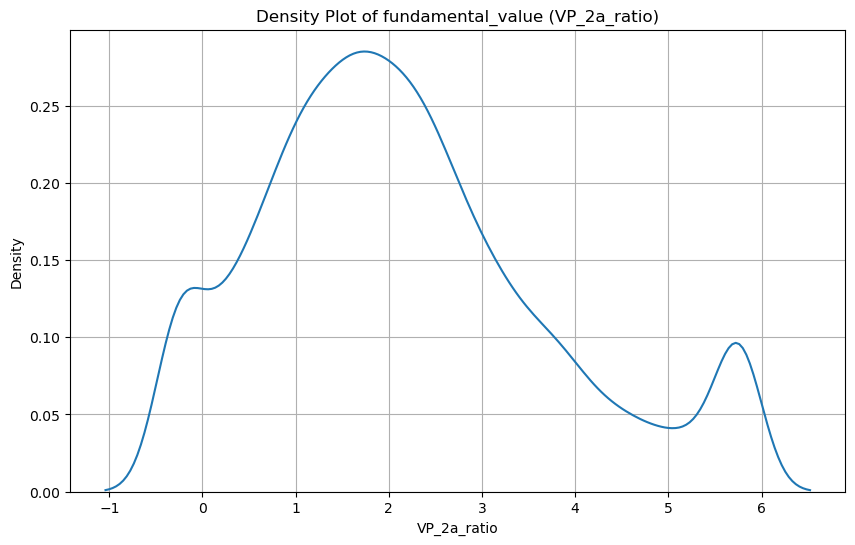

In [139]:
plt.figure(figsize=(10, 6))
sns.kdeplot(financial_beta_rf_df['VP_2a_ratio'])
plt.title('Density Plot of fundamental_value (VP_2a_ratio)')
plt.xlabel('VP_2a_ratio')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [140]:
#function to calculate the fundamental value using Residual Income Model
def calculate_fundamental_value(group):
    #extract data for the company
    bvps = group['bvps'].values
    eps = group['ni'].values
    future_eps = group[['fy1_eps','fy2_eps']].values.flatten()
    cost_of_equity = group['cost_of_equity'].values[0]  #assume cost of equity is constant

    #calculate residual income for each year
    residual_income = np.array([eps[i] - cost_of_equity * bvps[i] for i in range(len(eps)-1)])
    future_residual_income = np.array([future_eps[i] - cost_of_equity * bvps[-1] for i in range(len(future_eps))])

    #calculate present value of residual income
    present_value_ri = sum([ri / (1 + cost_of_equity) ** (i+1) for i, ri in enumerate(residual_income)])
    present_value_future_ri = sum([ri / (1 + cost_of_equity) ** (i+len(eps)) for i, ri in enumerate(future_residual_income)])

    #calculate fundamental value as the book value at the start of the period plus the present value of residual income
    fundamental_value = bvps[0] + present_value_ri + present_value_future_ri

    return fundamental_value

#apply the fundamental value calculation for each company
fundamental_value = financial_beta_rf_df.groupby('gvkey').apply(calculate_fundamental_value).reset_index(name='fundamental_value')

#merge fundamental values back to the original DataFrame
financial_beta_rf_df = financial_beta_rf_df.merge(fundamental_value, on='gvkey')


In [141]:
financial_beta_rf_df['fundamental_value'].describe()

count     9365.000000
mean      4993.619691
std       7705.222775
min      -2223.227723
25%        435.864309
50%       1663.796482
75%       5825.297638
max      33823.056980
Name: fundamental_value, dtype: float64

In [142]:
#calculate V/P ratio
financial_beta_rf_df['V/P'] = financial_beta_rf_df['fundamental_value'] / (financial_beta_rf_df['prcc_f'])

print(financial_beta_rf_df[['gvkey', 'fyear', 'fundamental_value', 'V/P']])

       gvkey  fyear  fundamental_value       V/P
0       1004   2010         184.201163  6.979961
1       1004   2014         184.201163  6.235652
2       1004   2016         184.201163  5.271928
3       1004   2017         184.201163  4.121753
4       1004   2018         184.201163  6.121674
...      ...    ...                ...       ...
9395  326688   2021         240.853017  6.338237
9396  328795   2019         251.017237  5.634506
9397  328795   2020         251.017237  4.569766
9398  328795   2021         251.017237  4.763135
9399  339965   2021         120.545750  0.700847

[9400 rows x 4 columns]


In [143]:
financial_beta_rf_df['V/P'].describe()

count    9365.000000
mean      105.586440
std       196.848686
min       -93.370652
25%         9.415677
50%        34.174426
75%       109.948913
max      2098.523981
Name: V/P, dtype: float64

In [144]:
display(financial_beta_rf_df.isna().sum())

gvkey                 0
datadate              0
fyear                 0
indfmt                0
consol                0
                     ..
VP_2a_ratio           0
VP_2b_ratio           0
VP_3_ratio            0
fundamental_value    35
V/P                  35
Length: 123, dtype: int64

In [145]:
financial_beta_rf_df.dropna(inplace=True)
financial_beta_rf_df.info()
financial_beta_rf_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7614 entries, 1 to 9398
Columns: 123 entries, gvkey to V/P
dtypes: datetime64[ns](1), float64(104), int64(9), object(9)
memory usage: 7.2+ MB


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,fyr,act,ap,at,che,cogs,csho,dlc,dltt,dt,dvc,ebit,ebitda,ib,invt,lct,lt,mibt,ni,oancf,pstk,re,rect,revt,sale,seq,teq,txt,wcap,xint,cik,costat,mkvalt,prcc_f,gsector,sic,year,month,pfy,yret,yret_win,yret_short,yret_short_win,annual_beta,sp500_rate,rf_rate,market_premium,cost_of_equity,at_lag,roa,cfo,roa_lag,roa_change,accrual,lever,lever_lag,lever_change,current_ratio,current_ratio_lag,liquid_change,eq_offer,gross_margin,gross_margin_lag,margin_change,asset_turnover,asset_turnover_lag,turn_change,f_score,logmv,logmv_win,BM_ratio,ib_debt,enterprise_v,roic,g,tax_rate,wacc,net_op_asset,going_firm_v,net_financial_lt,intrinsic_value_equity,enterprise_value_equity,safety_margin_proxy_iv,safety_margin_proxy_ev,wcap_at,re_at,ebit_at,mve_lt,revt_at,zscore,z_label,fy1_eps,fy2_eps,bvps,div_payout_ratio,roe,avg_bvps,froet,ending_bvps,froet_t+1,bvt_t+1,froet_t+2,bvt_t+2,froet_t+3,bvt_t+3,Value_2a,Value_2b,Value_3,VP_2a_ratio,VP_2b_ratio,VP_3_ratio,fundamental_value,V/P
1,1004,2015-05-31,2014,INDL,C,D,STD,AIR,AAR CORP,USD,5,954.1,142.3,1515.0,54.700,1342.7,35.423,69.0,85.0,154.0,11.9,-8.6,83.7,-54.5,566.7,412.0,669.9,0.0,10.2,-43.0,0.0,603.9,231.1,1594.3,1594.3,845.1,845.1,-28.5,542.1,26.5,1750.0,A,1124.8048,29.54,20.0,5080,2015,5,2016,0.504034,0.504034,-0.413793,-0.413793,4.697870,1.629424,1.832641,-0.203218,0.018231,1703.727,-0.031989,-0.025239,0.068506,-0.100494,-0.006750,0.052816,0.238007,-0.185191,2.315777,2.197027,0.118750,1,0.157812,0.207070,-0.049258,0.935772,1.663289,-0.727517,4,7.025365,7.056252,0.751330,154.0,944.400,0.012089,-1.745156,0.343373,0.032837,1117.300,1104.262041,99.300,1004.962041,845.1,-0.119251,-0.330972,0.357822,0.398614,-0.005677,2.263189,1.052343,3.377917,Non-distress Zone,1.34,1.80,23.857381,0.886203,0.059730,22.434271,0.059730,21.153976,0.059730,24.019542,0.075193,24.225071,-0.055603,24.071786,78.163935,98.534109,2.180528,2.646037,3.335616,0.073816,184.201163,6.235652
2,1004,2017-05-31,2016,INDL,C,D,STD,AIR,AAR CORP,USD,5,888.5,177.4,1504.1,21.846,1422.7,34.354,2.0,155.3,157.3,10.2,77.2,148.2,50.2,601.1,335.1,589.9,0.0,56.5,21.8,0.0,688.0,251.4,1767.6,1767.6,914.2,914.2,24.1,553.4,5.5,1750.0,A,1200.3288,34.94,20.0,5080,2017,5,2018,-0.202800,-0.202800,0.126886,0.126886,1.225974,12.132648,2.913685,9.218962,0.030267,1515.000,0.033135,0.014389,-0.031989,0.065124,0.018746,0.102878,0.052816,0.050062,2.651447,2.315777,0.335671,1,0.195123,0.157812,0.037311,1.166733,0.935772,0.230961,6,7.090351,7.090351,0.761625,157.3,1049.654,0.066966,-1.921101,0.324361,0.029292,1149.154,1171.351257,135.454,1035.897257,914.2,-0.158733,-0.312983,0.367928,0.457416,0.051326,2.447653,1.175188,3.893877,Non-distress Zone,2.24,2.93,26.611166,0.180531,0.088768,25.234273,0.088768,25.592832,0.088768,28.546936,0.106240,31.032244,-0.090596,28.728385,78.046006,97.672421,-22.605948,2.233715,2.795433,-0.646993,184.201163,5.271928
3,1004,2018-05-31,2017,INDL,C,D,STD,AIR,AAR CORP,USD,5,942.7,170.0,1524.7,41.600,1413.2,34.716,0.0,177.2,177.2,10.3,86.0,126.5,73.7,547.9,333.3,588.4,0.0,15.6,64.3,0.0,701.2,203.0,1748.3,1748.3,936.3,936.3,3.5,609.4,8.0,1750.0,A,1551.4580,44.69,20.0,5080,2018,5,2019,-0.432767,-0.410693,0.248227,0.248227,5.700410,6.086277,2.136333,3.949943,0.023615,1504.100,0.048999,0.042750,0.033135,0.015864,0.006250,0.117010,0.102878,0.014132,2.828383,2.651447,0.176936,0,0.191672,0.195123,-0.003451,1.162356,1.166733,-0.004376,3,7.346950,7.346950,0.603497,177.2,1071.900,0.018490,0.468127,0.045337,0.026716,1149.800,1171.227410,135.600,1035.627410,936.3,-0.498085,-0.657010,0.399685,0.459894,0.056405,3.039095,1.146652,4.278571,Non-distress Zone,2.57,2.92,26.970273,0.660256,0.095929,26.790720,0.095929,27.478455,0.095929,27.849266,0.106531,28.857224,0.151197,30.339570,109.558687,124.403511,276.710905,2.451526,2.783699,6.191786,184.201163,4.121753
4,1004,2019-05-31,2018,INDL,C,D,STD,AIR,AAR CORP,USD,5,952.5,187.8,1517.2,41.100,1679.5,34.788,0.0,141.7,141.7,10.5,110.7,153.5,84.1,589.0,3

In [146]:
financial_beta_rf_df[['V/P']].describe()

,V/P
count,7614.000000
mean,114.185425
std,202.950197
min,-65.820856
25%,12.279277
50%,38.667742
75%,122.397757
max,2098.523981


In [147]:
#print(financial_beta_rf_df.columns)
cols = financial_beta_rf_df.columns.tolist()
print(cols)

['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt', 'tic', 'conm', 'curcd', 'fyr', 'act', 'ap', 'at', 'che', 'cogs', 'csho', 'dlc', 'dltt', 'dt', 'dvc', 'ebit', 'ebitda', 'ib', 'invt', 'lct', 'lt', 'mibt', 'ni', 'oancf', 'pstk', 're', 'rect', 'revt', 'sale', 'seq', 'teq', 'txt', 'wcap', 'xint', 'cik', 'costat', 'mkvalt', 'prcc_f', 'gsector', 'sic', 'year', 'month', 'pfy', 'yret', 'yret_win', 'yret_short', 'yret_short_win', 'annual_beta', 'sp500_rate', 'rf_rate', 'market_premium', 'cost_of_equity', 'at_lag', 'roa', 'cfo', 'roa_lag', 'roa_change', 'accrual', 'lever', 'lever_lag', 'lever_change', 'current_ratio', 'current_ratio_lag', 'liquid_change', 'eq_offer', 'gross_margin', 'gross_margin_lag', 'margin_change', 'asset_turnover', 'asset_turnover_lag', 'turn_change', 'f_score', 'logmv', 'logmv_win', 'BM_ratio', 'ib_debt', 'enterprise_v', 'roic', 'g', 'tax_rate', 'wacc', 'net_op_asset', 'going_firm_v', 'net_financial_lt', 'intrinsic_value_equity', 'enterprise_value_equ

In [148]:
'''
if 'rf_rate' in cols:
    print("'rf_rate' in DataFrame ")
else:
    print("'rf_rate' is not in DataFrame ")
'''

'\nif \'rf_rate\' in cols:\n    print("\'rf_rate\' in DataFrame ")\nelse:\n    print("\'rf_rate\' is not in DataFrame ")\n'

### Validate V/P on average yearly return

In [149]:
###annual returns on 10 decile portfolios sorted year-by-year on VP_2a_ratio
financial_beta_rf_df['VP2a_quantile'] = financial_beta_rf_df.groupby('pfy')['VP_2a_ratio'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
print(financial_beta_rf_df.groupby('VP2a_quantile')[['VP_2a_ratio','yret_win']].agg(['count', 'mean']))

###annual returns on 10 decile portfolios sorted year-by-year on VP_2b_ratio
financial_beta_rf_df['VP2b_quantile'] = financial_beta_rf_df.groupby('pfy')['VP_2b_ratio'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
print(financial_beta_rf_df.groupby('VP2b_quantile')[['VP_2b_ratio','yret_win']].agg(['count', 'mean']))

###annual returns on 10 decile portfolios sorted year-by-year on VP_3_ratio
financial_beta_rf_df['VP3_quantile'] = financial_beta_rf_df.groupby('pfy')['VP_3_ratio'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
print(financial_beta_rf_df.groupby('VP3_quantile')[['VP_3_ratio','yret_win']].agg(['count', 'mean']))

###annual returns on 10 decile portfolios sorted year-by-year on V/P
financial_beta_rf_df['V/P_quantile'] = financial_beta_rf_df.groupby('pfy')['V/P'].transform(pd.qcut, 10, labels=False, duplicates='drop') #Label each bin as an integer
print(financial_beta_rf_df.groupby('V/P_quantile')[['V/P','yret_win']].agg(['count', 'mean']))


              VP_2a_ratio           yret_win          
                    count      mean    count      mean
VP2a_quantile                                         
0                     832  0.031088      832  0.199766
1                     759  0.827165      759  0.164711
2                     761  1.365381      761  0.134906
3                     761  1.802417      761  0.114631
4                     761  2.143640      761  0.143459
5                     757  2.464906      757  0.141235
6                     759  2.816034      759  0.129829
7                     826  3.457340      826  0.151969
8                     732  3.820627      732  0.115234
9                     666  4.885681      666  0.089512
              VP_2b_ratio           yret_win          
                    count      mean    count      mean
VP2b_quantile                                         
0                     768  0.393905      768  0.171880
1                     760  1.160367      760  0.140418
2         

In [150]:
#annual returns on 10x10 portfolios sorted independently year-by-year on VP 2a ratio and firm size (log of market cap)
financial_beta_rf_df['logmv_dec'] = financial_beta_rf_df.groupby('pfy')['logmv_win'].transform(pd.qcut, 10, labels=False, duplicates='drop')
financial_beta_rf_df_pivot_VP2a = pd.pivot_table(financial_beta_rf_df, index='VP2a_quantile', columns='logmv_dec',
                                                 values='yret', aggfunc=np.mean)
display(financial_beta_rf_df_pivot_VP2a)

# Annual returns on 10x10 portfolios sorted independently year-by-year on VP 2b ratio and firm size (log of market cap)
financial_beta_rf_df__pivot_VP2b = pd.pivot_table(financial_beta_rf_df, index='VP2b_quantile', columns='logmv_dec',
               values='yret', aggfunc=np.mean)
display(financial_beta_rf_df__pivot_VP2b)

# Annual returns on 10x10 portfolios sorted independently year-by-year on VP 3 ratio and firm size (log of market cap)
financial_beta_rf_df__pivot_VP3 = pd.pivot_table(financial_beta_rf_df, index='VP3_quantile', columns='logmv_dec',
               values='yret', aggfunc=np.mean)
display(financial_beta_rf_df__pivot_VP3)

# Annual returns on 10x10 portfolios sorted independently year-by-year on V/P and firm size (log of market cap)
financial_beta_rf_df_pivot_VP = pd.pivot_table(financial_beta_rf_df, index='V/P_quantile', columns='logmv_dec',
               values='yret', aggfunc=np.mean)
display(financial_beta_rf_df_pivot_VP)

logmv_dec,0,1,2,3,4,5,6,7,8,9
VP2a_quantile,,,,,,,,,,
0,0.412409,0.282733,0.195110,0.153083,0.305442,0.250508,0.207945,0.175665,0.261308,0.332453
1,0.211572,0.187100,0.121374,0.196051,0.180750,0.146531,0.152845,0.188587,0.192979,0.150390
2,0.102589,0.058178,0.129275,0.154810,0.161995,0.188013,0.163430,0.098481,0.196998,0.155898
3,0.237215,0.074539,0.120070,0.081976,0.116440,0.167186,0.057838,0.111454,0.110621,0.111084
4,0.181298,0.174376,0.129302,0.154587,0.110733,0.091072,0.153674,0.179512,0.172842,0.097049
5,0.212061,0.119606,0.202939,0.105154,0.168652,0.191564,0.107535,0.181306,0.107427,0.097659
6,0.161167,0.196469,0.093441,0.118797,0.146816,0.146250,0.078228,0.109430,0.157051,0.130574
7,0.209514,0.203692,0.126052,0.174930,0.253232,0.128680,0.153382,0.160465,0.136477,0.096084
8,0.146897,0.113242,0.111211,0.150360,0.133217,0.129400,0.069631,0.099673,0.075469,0.148691


logmv_dec,0,1,2,3,4,5,6,7,8,9
VP2b_quantile,,,,,,,,,,
0,0.278757,0.210942,0.143155,0.101181,0.222329,0.208478,0.179715,0.169186,0.247962,0.346375
1,0.138839,0.169931,0.121650,0.157042,0.151664,0.085189,0.167183,0.169203,0.168531,0.174103
2,0.192424,0.167941,0.130409,0.130707,0.223201,0.208010,0.120714,0.099949,0.126220,0.138003
3,0.259775,0.040328,0.082213,0.211671,0.137396,0.152164,0.092071,0.152102,0.143295,0.064010
4,0.172405,0.203191,0.116462,0.056729,0.085768,0.172245,0.102922,0.119447,0.188958,0.125672
5,0.217161,0.119860,0.167138,0.170877,0.149521,0.191803,0.137699,0.134786,0.105152,0.096878
6,0.222922,0.113138,0.196605,0.139908,0.166956,0.150945,0.084034,0.128369,0.126225,0.129466
7,0.141422,0.151865,0.173743,0.116987,0.169462,0.186224,0.106893,0.168862,0.135768,0.114644
8,0.277940,0.224377,0.114049,0.234893,0.237114,0.107712,0.148185,0.105792,0.155244,0.129096


logmv_dec,0,1,2,3,4,5,6,7,8,9
VP3_quantile,,,,,,,,,,
0,0.158615,0.162315,0.139430,0.049960,0.143149,0.198309,0.102497,0.157778,0.217056,0.138182
1,0.247617,0.233987,0.153301,0.125314,0.275444,0.158605,0.158931,0.166801,0.231254,0.226411
2,0.198168,0.168644,0.156195,0.183577,0.126856,0.201908,0.199373,0.145821,0.155467,0.119776
3,0.137281,0.154137,0.100966,0.175755,0.175897,0.139291,0.158801,0.141026,0.126258,0.126266
4,0.372074,0.126650,0.120380,0.128252,0.156271,0.165615,0.161767,0.147644,0.137863,0.124570
5,0.128639,0.153448,0.121845,0.139141,0.160897,0.177350,0.095428,0.103185,0.137826,0.126216
6,0.218057,0.121893,0.140864,0.080208,0.185815,0.165337,0.112112,0.125221,0.156839,0.141057
7,0.178328,0.206052,0.181085,0.151036,0.146070,0.172255,0.052602,0.139329,0.116130,0.032608
8,0.334528,0.121793,0.114016,0.219260,0.240420,0.151626,0.176042,0.195345,0.092004,0.109017


logmv_dec,0,1,2,3,4,5,6,7,8,9
V/P_quantile,,,,,,,,,,
0,0.170455,0.091073,0.125786,0.069085,0.150350,0.161158,0.100904,0.094476,0.214776,NaN
1,0.163320,0.161208,0.134469,0.104257,0.142424,0.028198,0.073385,0.081932,0.145084,NaN
2,0.220626,0.119321,0.099774,0.134426,0.117375,0.101243,-0.005960,0.136648,0.146396,NaN
3,0.151367,0.177024,0.133891,0.148147,0.177652,0.097153,0.102558,0.128197,0.140288,0.023011
4,0.355777,0.154369,0.118783,0.145951,0.227187,0.162026,0.094265,0.185790,0.150000,0.084040
5,0.261449,0.216563,0.162351,0.159664,0.113162,0.174182,0.146878,0.089560,0.113802,0.280361
6,0.192132,0.229754,0.137350,0.163025,0.209774,0.193881,0.156664,0.156277,0.137148,0.134311
7,0.302319,0.101679,0.207225,0.165767,0.182295,0.141326,0.184958,0.122211,0.142335,0.136252
8,1.627895,0.252474,0.161378,0.175713,0.310586,0.260355,0.159561,0.143470,0.134888,0.104446


## Correlation test

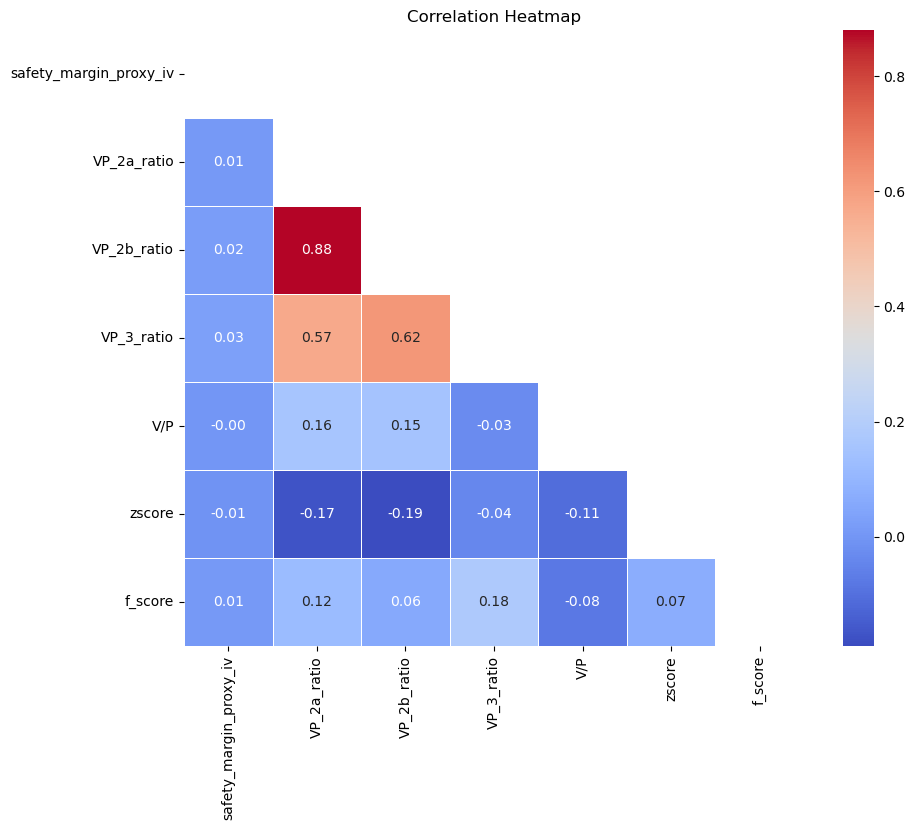

In [151]:

columns_to_check = ['safety_margin_proxy_iv','VP_2a_ratio','VP_2b_ratio','VP_3_ratio','V/P', 'zscore','f_score']
correlation_matrix = financial_beta_rf_df[columns_to_check].corr().round(2)

#plot correlation heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#plt.title('Correlation Heatmap')
#plt.show()

# Calculate the correlation matrix
correlation_matrix = financial_beta_rf_df[columns_to_check].corr().round(2)

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()


#Trade Strategy 1 and Back Test

## Long - Stock portfolio
The previous investigation into financial indicators reveals the following relationships:
- Safety Margin: There is a positive correlation between the safety margin and the average stock return.
- F-Score and Z-Score: Both the F-score and the Z-score have negative coefficients with respect to stock return. Notably, the Z-score is particularly significant in relation to stock return.

Furthermore, correlation testing indicates there is no concern about multicollinearity among these three indicators.

Strategy
Based on these statistical findings, we propose a comprehensive investment strategy as follows:
- Safety Margin:
Select stocks with a safety margin greater than 0.33.
- F-Score:
Choose stocks where the F-score is in the bottom 40%.
- Z-Score:
Select stocks with a Z-score in the bottom 20%.

#### Select Stocks

In [152]:
signals = ['tic','gvkey','pfy','logmv_win','yret_win','yret','yret_short','yret_short_win', 'rf_rate', 'f_score', 'safety_margin_proxy_iv','zscore', 'VP_2a_ratio', 'VP_2b_ratio', 'VP_3_ratio','V/P']
final_df = financial_beta_rf_df[signals]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7614 entries, 1 to 9398
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tic                     7614 non-null   object 
 1   gvkey                   7614 non-null   int64  
 2   pfy                     7614 non-null   int64  
 3   logmv_win               7614 non-null   float64
 4   yret_win                7614 non-null   float64
 5   yret                    7614 non-null   float64
 6   yret_short              7614 non-null   float64
 7   yret_short_win          7614 non-null   float64
 8   rf_rate                 7614 non-null   float64
 9   f_score                 7614 non-null   int64  
 10  safety_margin_proxy_iv  7614 non-null   float64
 11  zscore                  7614 non-null   float64
 12  VP_2a_ratio             7614 non-null   float64
 13  VP_2b_ratio             7614 non-null   float64
 14  VP_3_ratio              7614 non-null   

In [153]:
#import pandas as pd

# 假设 financial_beta_rf_df 是包含所有股票信息的数据集
# 数据集中包含列：year, enterprise_value, f_score, zscore, V_P_ratio

# 创建一个空的列表来存储每一年的筛选结果
selected_stocks_list = []
company_counts_per_year = {}

# 按年筛选股票
for year in range(2008, 2023):
    # 筛选出当前年份的股票
    financial_beta_rf_df_year = final_df[final_df['pfy'] == year]

    # 根据给定策略进行筛选
    financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['safety_margin_proxy_iv'] > 0.33]
    financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['f_score'] < financial_beta_rf_df_year['f_score'].quantile(0.4)]
    #financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['safety_margin_proxy_iv'] > financial_beta_rf_df_year['safety_margin_proxy_iv'].quantile(0.8)]
    financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['zscore'] < financial_beta_rf_df_year['zscore'].quantile(0.2)]
   # financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['V/P'] > financial_beta_rf_df_year['V/P'].quantile(0.5)]

    filtered_stocks=financial_beta_rf_df_year

    # 将筛选结果添加到列表中
    selected_stocks_list.append(filtered_stocks)

    # 统计当前年份的公司数量
    company_counts_per_year[year] = filtered_stocks['tic'].nunique()

# 将所有年份的筛选结果整合到一个数据帧中
selected_stocks_combined = pd.concat(selected_stocks_list, ignore_index=True)

# 打印每年的公司数量
for year, count in company_counts_per_year.items():
    print(f"Year: {year}, Unique Companies: {count}")

# 打印整合后的结果
print(f"Total Selected Stocks: {selected_stocks_combined.shape[0]}")

# 显示整合后的数据框架
#selected_stocks_combined.info()



Year: 2008, Unique Companies: 4
Year: 2009, Unique Companies: 7
Year: 2010, Unique Companies: 8
Year: 2011, Unique Companies: 5
Year: 2012, Unique Companies: 8
Year: 2013, Unique Companies: 9
Year: 2014, Unique Companies: 9
Year: 2015, Unique Companies: 10
Year: 2016, Unique Companies: 10
Year: 2017, Unique Companies: 9
Year: 2018, Unique Companies: 7
Year: 2019, Unique Companies: 9
Year: 2020, Unique Companies: 14
Year: 2021, Unique Companies: 11
Year: 2022, Unique Companies: 11
Total Selected Stocks: 131


In [154]:
# creat data frame to store pfy tic
portfolios_summary = selected_stocks_combined[['pfy', 'tic']]
portfolios_summary

,pfy,tic
0,2008,CAT
1,2008,TGT
2,2008,MCK
3,2008,DISH
4,2009,DD
...,...,...
126,2022,SRCL
127,2022,NCLH
128,2022,CNX
129,2022,CSIQ


In [155]:
'''
import pandas as pd
import numpy as np

# 设置随机种子以保证结果可重复
np.random.seed(42)

# 创建一个空的列表来存储每年的投资组合
portfolios_list = []

# 按年随机选出5只股票，不满5支的就保留全部
for year in selected_stocks_combined['pfy'].unique():
    stocks_year = selected_stocks_combined[selected_stocks_combined['pfy'] == year]

    if stocks_year.shape[0] < 5:
        print(f"Year {year} does not have enough stocks to form a portfolio. Keeping all {stocks_year.shape[0]} stocks.")
        selected_stocks = stocks_year
    else:
        selected_stocks = stocks_year.sample(5)

    portfolios_list.append(selected_stocks)

# 将所有年份的投资组合整合到一个数据帧中
portfolios_combined = pd.concat(portfolios_list, ignore_index=True)

# 打印每年投资组合的公司代码
for year in portfolios_combined['pfy'].unique():
    tickers = portfolios_combined[portfolios_combined['pfy'] == year]['tic'].tolist()
    print(f"Year: {year}, Selected Tickers: {tickers}")

# 打印整合后的投资组合
print(f"Total Selected Portfolios: {portfolios_combined.shape[0]}")
'''





'\nimport pandas as pd\nimport numpy as np\n\n# 设置随机种子以保证结果可重复\nnp.random.seed(42)\n\n# 创建一个空的列表来存储每年的投资组合\nportfolios_list = []\n\n# 按年随机选出5只股票，不满5支的就保留全部\nfor year in selected_stocks_combined[\'pfy\'].unique():\n    stocks_year = selected_stocks_combined[selected_stocks_combined[\'pfy\'] == year]\n\n    if stocks_year.shape[0] < 5:\n        print(f"Year {year} does not have enough stocks to form a portfolio. Keeping all {stocks_year.shape[0]} stocks.")\n        selected_stocks = stocks_year\n    else:\n        selected_stocks = stocks_year.sample(5)\n\n    portfolios_list.append(selected_stocks)\n\n# 将所有年份的投资组合整合到一个数据帧中\nportfolios_combined = pd.concat(portfolios_list, ignore_index=True)\n\n# 打印每年投资组合的公司代码\nfor year in portfolios_combined[\'pfy\'].unique():\n    tickers = portfolios_combined[portfolios_combined[\'pfy\'] == year][\'tic\'].tolist()\n    print(f"Year: {year}, Selected Tickers: {tickers}")\n\n# 打印整合后的投资组合\nprint(f"Total Selected Portfolios: {portfolios_combined.shape[0]}

### Long - Porfolio Performacne

#### Annual stock price standard deviation

In [156]:
# load stock price monly
stock_df = pd.read_csv('Securities Monthly Raw Data.csv',parse_dates = ['datadate'])

# check data structure
stock_df.info()

#  fillter common stock
stock_df = stock_df[stock_df['iid'] == 1]

# extract year and month
stock_df['year'] = stock_df['datadate'].dt.year
stock_df['month'] = stock_df['datadate'].dt.month

# compute pyf
stock_df['pfy'] = np.where(stock_df['month'] > 6, stock_df['year'], stock_df['year'] - 1)

# calculate price change per month
stock_df['monthly_return'] = stock_df.groupby('gvkey')['prccm'].pct_change()

# calculate price standard deviation
monthly_std = stock_df.groupby(['gvkey', 'pfy'])['monthly_return'].std().reset_index()


monthly_std = monthly_std.rename(columns={'monthly_return': 'monthly_std'})

# print result
print(monthly_std)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502021 entries, 0 to 502020
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gvkey     502021 non-null  int64         
 1   iid       502021 non-null  int64         
 2   datadate  502021 non-null  datetime64[ns]
 3   tic       502021 non-null  object        
 4   cusip     502021 non-null  object        
 5   conm      502021 non-null  object        
 6   prccm     502021 non-null  float64       
 7   trt1m     499411 non-null  float64       
 8   exchg     502021 non-null  int64         
 9   tpci      502021 non-null  int64         
 10  gsector   493564 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 42.1+ MB
        gvkey   pfy  monthly_std
0        1004  2005     0.098024
1        1004  2006     0.057157
2        1004  2007     0.135348
3        1004  2008     0.139183
4        1004  2009     0.15582

In [157]:
# calculate annual stock price standard deviation

monthly_std['annual_std'] = monthly_std['monthly_std'] * np.sqrt(12)

# Printing the updated DataFrame
print(monthly_std)


        gvkey   pfy  monthly_std  annual_std
0        1004  2005     0.098024    0.339567
1        1004  2006     0.057157    0.197998
2        1004  2007     0.135348    0.468859
3        1004  2008     0.139183    0.482145
4        1004  2009     0.155826    0.539798
...       ...   ...          ...         ...
46881  348615  2022     0.091640    0.317451
46882  348615  2023     0.106783    0.369906
46883  349972  2021          NaN         NaN
46884  352262  2022     0.059389    0.205729
46885  352262  2023     0.033035    0.114435

[46886 rows x 4 columns]


In [158]:
# merge to financial_beta_rf_df
final_df = pd.merge(final_df, monthly_std[['gvkey','pfy','annual_std']], on=['gvkey', 'pfy'])

In [159]:
#import pandas as pd
# combine
merged_df = pd.merge(portfolios_summary, final_df, on=['pfy', 'tic'])

# print result
print(merged_df)



      pfy   tic   gvkey  logmv_win  yret_win      yret  yret_short  \
0    2008   CAT    2817  10.720543 -0.410693 -0.533125    0.407845   
1    2008   TGT    3813  10.722705 -0.136064 -0.136064   -0.055199   
2    2008   MCK    7171   9.582351 -0.204200 -0.204200    0.036238   
3    2008  DISH   60900   9.736235 -0.410693 -0.446379    0.256755   
4    2009    DD    4060   9.543119  0.503105  0.503105   -0.475200   
..    ...   ...     ...        ...       ...       ...         ...   
126  2022  SRCL   63527   8.609028  0.059066  0.059066   -0.158058   
127  2022  NCLH  104432   9.064891  0.895841  0.957736   -0.745863   
128  2022   CNX  120093   7.936857  0.076550  0.076550   -0.123589   
129  2022  CSIQ  175982   7.602541  0.242453  0.242453   -0.412232   
130  2022   PRO  177744   7.336630  0.174226  0.174226   -0.209775   

     yret_short_win   rf_rate  f_score  safety_margin_proxy_iv    zscore  \
0          0.377755  3.648798        3                0.828206  2.825857   
1      

#### Sharp ratio

In [160]:
#import pandas as pd

rf_rate = selected_stocks_combined.groupby('pfy')['rf_rate'].first().reset_index()

rf_rate['rf_rate']=rf_rate['rf_rate']/100
rf_rate

,pfy,rf_rate
0,2008,0.036488
1,2009,0.032486
2,2010,0.031947
3,2011,0.027610
4,2012,0.017859
5,2013,0.023384
6,2014,0.025286
7,2015,0.021336
8,2016,0.018326
9,2017,0.023275


In [161]:
#import yfinance as yf
#import pandas as pd

# download ^GSPC history
gspc_data = yf.download('^GSPC', start='2000-01-01', end='2023-12-31', interval='1d')

# extract Date from year
gspc_data['pfy'] = gspc_data.index.year

# calculate daily return of S&P 500
gspc_data['daily_return'] = gspc_data['Close'].pct_change()

# Group by year, calculate daily return and daily stander deviation per year
gspc_yearly_stats = gspc_data.groupby('pfy').agg(
    daily_mean_return=('daily_return', 'mean'),
    daily_std_return=('daily_return', 'std')
).reset_index()

# calculate annual return (1+daily return) ** 252 - 1
gspc_yearly_stats['sp500_rate'] = (1 + gspc_yearly_stats['daily_mean_return']) ** 252 - 1

# calculate annual standard deviantion
gspc_yearly_stats['sp500_std'] = gspc_yearly_stats['daily_std_return'] * (252 ** 0.5)

# mergge data set
gspc_yearly_stats = pd.merge(gspc_yearly_stats, rf_rate, on='pfy', how='left')
gspc_yearly_stats['sp500_sharpe_ratio']=(gspc_yearly_stats['sp500_rate']-gspc_yearly_stats['rf_rate'])/gspc_yearly_stats['sp500_std']

# only remain 'year'、'GSPC_rate' and 'std'
sp500_df = gspc_yearly_stats[['pfy', 'sp500_rate', 'sp500_std','sp500_sharpe_ratio']]

sp500_df

[*********************100%***********************]  1 of 1 completed


,pfy,sp500_rate,sp500_std,sp500_sharpe_ratio
0,2000,-0.070438,0.222478,NaN
1,2001,-0.112063,0.215565,NaN
2,2002,-0.207440,0.260297,NaN
3,2003,0.282227,0.170676,NaN
4,2004,0.096634,0.110935,NaN
5,2005,0.035448,0.102835,NaN
6,2006,0.142468,0.100252,NaN
7,2007,0.048738,0.159856,NaN
8,2008,-0.329807,0.409733,-0.893986
9,2009,0.281092,0.272850,0.911145


In [162]:
#import pandas as pd
#import numpy as np
from scipy.optimize import minimize

# calculate weight, portfolio return and standard deviation
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std_dev

# calculate Sharpe Ratio for identifing maxium sharp ratio of portfolio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std_dev

# constraint：sum of weights = 1
def constraint(weights):
    return np.sum(weights) - 1

# Identify the weight given to creat a portfolio with maxium sharp rario
def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': constraint})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets,], args=args,
                      bounds=bounds, constraints=constraints)
    return result.x

# creat blank list
results = []

# attain unique year
years = merged_df['pfy'].unique()

# calculate the sharp ratio of stocks selected by applying strategy 1 in each year
# the pricinple to arrange the weights of stocks selected is acquiring the highest sharp ratio of this risky portfolio
for year in years:
    # read current
    yearly_data = merged_df[merged_df['pfy'] == year]
    mean_returns = yearly_data['yret'].values
    std_devs = yearly_data['annual_std'].values
    cov_matrix = np.diag(std_devs ** 2)

    # get correspondent frisk free rate
    risk_free_rate = rf_rate[rf_rate['pfy'] == year]['rf_rate'].values[0]

    # get the maxium Sharpe Ratio
    weights = max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate)
    portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # record result
    results.append({
        'pfy': year,
        'portfolio_return': portfolio_return,
        'portfolio_std_dev': portfolio_std_dev,
        'sharpe_ratio': sharpe_ratio,
        'weights': weights
    })

# 转换结果为DataFrame
results_df = pd.DataFrame(results)
results_df


,pfy,portfolio_return,portfolio_std_dev,sharpe_ratio,weights
0,2008,-0.136064,0.467837,-0.368829,"[4.052314039881821e-15, 0.9999999999999929, 6...."
1,2009,0.728754,0.183935,3.785407,"[0.10096400622342336, 0.047112118201153574, 0...."
2,2010,0.640540,0.098303,6.190986,"[0.1048728685079241, 0.34269948870174516, 0.02..."
3,2011,0.122155,0.177209,0.533524,"[0.807998032005944, 0.0, 0.0, 5.06074503418265..."
4,2012,0.481751,0.098856,4.692596,"[0.08285838633361199, 0.1590270417288255, 0.22..."
5,2013,0.450530,0.081532,5.239016,"[0.08946046461366354, 0.109229208284616, 0.025..."
6,2014,0.392926,0.105864,3.472752,"[3.6446263256064306e-15, 2.0329419037909073e-1..."
7,2015,0.169417,0.300867,0.492181,"[0.0, 0.051235375956558665, 0.4270301818658498..."
8,2016,0.141215,0.132053,0.930602,"[6.494109133482725e-16, 0.0, 0.0, 0.0, 0.08765..."
9,2017,0.540525,0.155599,3.324237,"[0.2197711524912904, 0.0, 3.560181121263495e-1..."


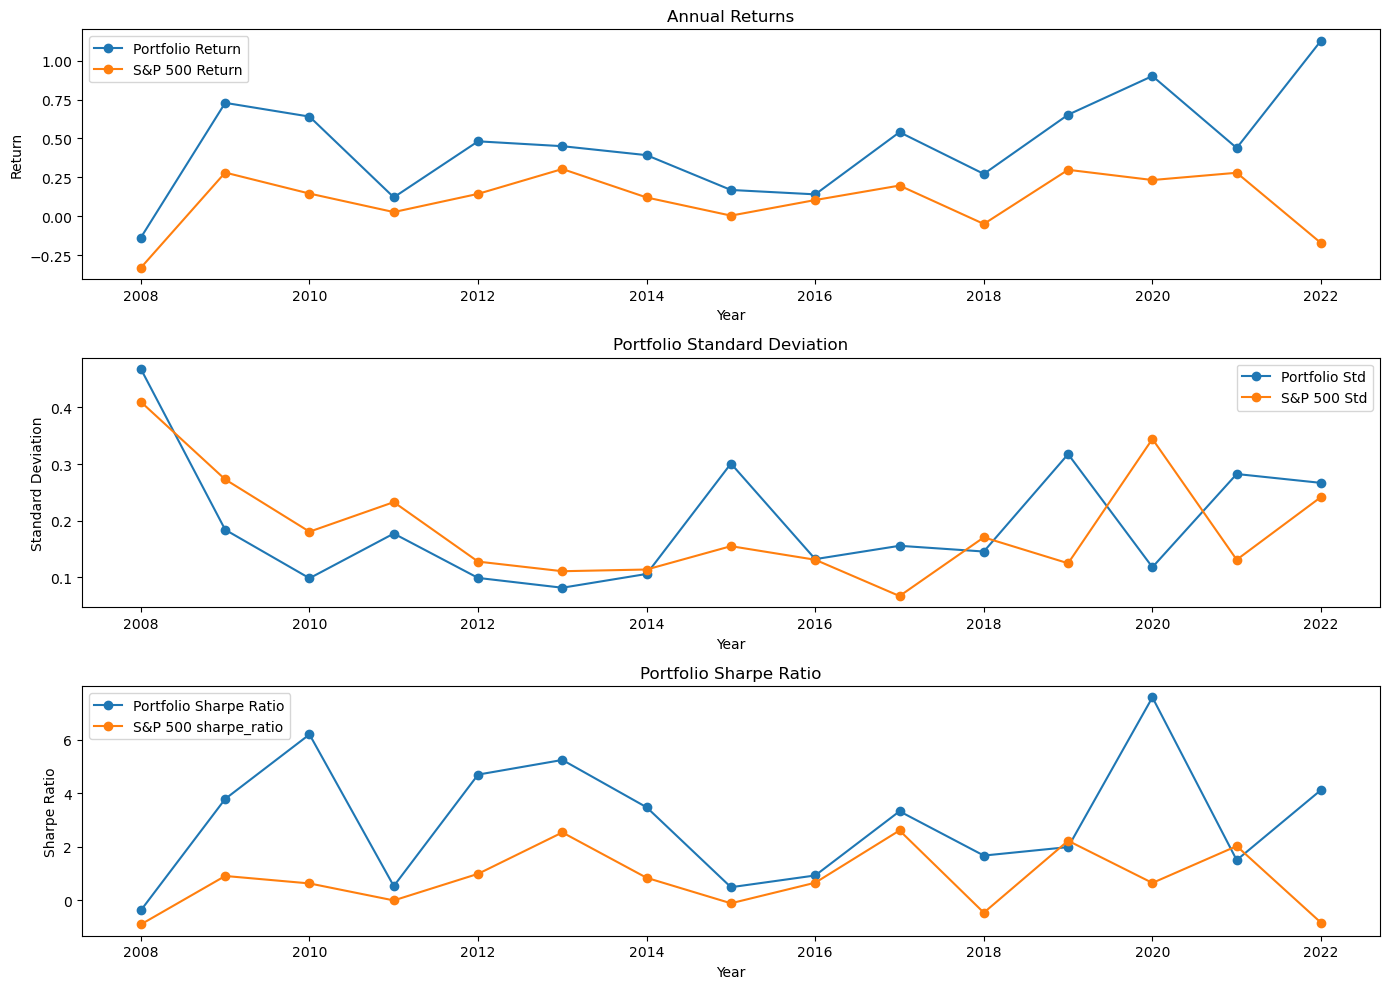

In [163]:
# risky portfolio built by appplying strategy 1 and S&P 500
comparison_df = pd.merge(results_df, sp500_df, on='pfy', how='left')

# Line Chart
plt.figure(figsize=(14, 10))

# Portfolio return and S&P500 return
plt.subplot(3, 1, 1)
plt.plot(comparison_df['pfy'], comparison_df['portfolio_return'], marker='o', label='Portfolio Return')
plt.plot(comparison_df['pfy'], comparison_df['sp500_rate'], marker='o', label='S&P 500 Return')

plt.title('Annual Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.legend()

# risky portfolio standad deviation
plt.subplot(3, 1, 2)
plt.plot(comparison_df['pfy'], comparison_df['portfolio_std_dev'], marker='o', label='Portfolio Std')
plt.plot(comparison_df['pfy'], comparison_df['sp500_std'], marker='o', label='S&P 500 Std')
plt.title('Portfolio Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.legend()

# Portfolio's Sharpe ratio
plt.subplot(3, 1, 3)
plt.plot(comparison_df['pfy'], comparison_df['sharpe_ratio'], marker='o', label='Portfolio Sharpe Ratio')
plt.plot(comparison_df['pfy'], comparison_df['sp500_sharpe_ratio'], marker='o', label='S&P 500 sharpe_ratio')
plt.title('Portfolio Sharpe Ratio')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()

plt.tight_layout()
plt.show()


## Short Sell - Stock portfolio

### Select Stocks

In [164]:
#import pandas as pd

# creat result data framework
selected_stocks_list = []
company_counts_per_year = {}

# apply strategy year by year
for year in range(2008, 2023):
    # define the year to apply strategy year by year
    financial_beta_rf_df_year = final_df[final_df['pfy'] == year]

    # short strategy
    financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['safety_margin_proxy_iv'] < 0.33]
    financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['f_score'] > financial_beta_rf_df_year['f_score'].quantile(0.6)]
    #financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['safety_margin_proxy_ev'] < financial_beta_rf_df_year['safety_margin_proxy_ev'].quantile(0.2)]
    financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['zscore'] > financial_beta_rf_df_year['zscore'].quantile(0.8)]
   # financial_beta_rf_df_year=financial_beta_rf_df_year[financial_beta_rf_df_year['V/P'] < financial_beta_rf_df_year['V/P'].quantile(0.2)]

    filtered_stocks=financial_beta_rf_df_year

    # add results
    selected_stocks_list.append(filtered_stocks)

    # size of qualified stocks
    company_counts_per_year[year] = filtered_stocks['tic'].nunique()

# merge
selected_stocks_combined2 = pd.concat(selected_stocks_list, ignore_index=True)

# print numbers of company selected year by year
for year, count in company_counts_per_year.items():
    print(f"Year: {year}, Unique Companies: {count}")

# print merged results
print(f"Total Selected Stocks: {selected_stocks_combined2.shape[0]}")

# check info of dataframe
#selected_stocks_combined.info()



Year: 2008, Unique Companies: 14
Year: 2009, Unique Companies: 13
Year: 2010, Unique Companies: 14
Year: 2011, Unique Companies: 12
Year: 2012, Unique Companies: 20
Year: 2013, Unique Companies: 14
Year: 2014, Unique Companies: 16
Year: 2015, Unique Companies: 17
Year: 2016, Unique Companies: 13
Year: 2017, Unique Companies: 21
Year: 2018, Unique Companies: 21
Year: 2019, Unique Companies: 20
Year: 2020, Unique Companies: 16
Year: 2021, Unique Companies: 36
Year: 2022, Unique Companies: 17
Total Selected Stocks: 264


In [165]:
# creat a dataframe to store pfy tic
portfolios_summary2 = selected_stocks_combined2[['pfy', 'tic']]
portfolios_summary2

,pfy,tic
0,2008,BCR
1,2008,LRCX
2,2008,MCRS
3,2008,HAR
4,2008,CERN
...,...,...
259,2022,CTSH
260,2022,EW
261,2022,EXLS
262,2022,IPGP


In [166]:
'''
#import pandas as pd
#import numpy as np

# 设置随机种子以保证结果可重复
np.random.seed(60)

# 创建一个空的列表来存储每年的投资组合
portfolios_list = []

# 按年随机选出5只股票，不满5支的就保留全部
for year in selected_stocks_combined2['pfy'].unique():
    stocks_year = selected_stocks_combined2[selected_stocks_combined2['pfy'] == year]

    if stocks_year.shape[0] < 5:
        print(f"Year {year} does not have enough stocks to form a portfolio. Keeping all {stocks_year.shape[0]} stocks.")
        selected_stocks = stocks_year
    else:
        selected_stocks = stocks_year.sample(5)

    portfolios_list.append(selected_stocks)

# 将所有年份的投资组合整合到一个数据帧中
portfolios_combined2 = pd.concat(portfolios_list, ignore_index=True)

# 打印每年投资组合的公司代码
for year in portfolios_combined2['pfy'].unique():
    tickers = portfolios_combined2[portfolios_combined2['pfy'] == year]['tic'].tolist()
    print(f"Year: {year}, Selected Tickers: {tickers}")

# 打印整合后的投资组合
print(f"Total Selected Portfolios: {portfolios_combined2.shape[0]}")
'''



'\n#import pandas as pd\n#import numpy as np\n\n# 设置随机种子以保证结果可重复\nnp.random.seed(60)\n\n# 创建一个空的列表来存储每年的投资组合\nportfolios_list = []\n\n# 按年随机选出5只股票，不满5支的就保留全部\nfor year in selected_stocks_combined2[\'pfy\'].unique():\n    stocks_year = selected_stocks_combined2[selected_stocks_combined2[\'pfy\'] == year]\n\n    if stocks_year.shape[0] < 5:\n        print(f"Year {year} does not have enough stocks to form a portfolio. Keeping all {stocks_year.shape[0]} stocks.")\n        selected_stocks = stocks_year\n    else:\n        selected_stocks = stocks_year.sample(5)\n\n    portfolios_list.append(selected_stocks)\n\n# 将所有年份的投资组合整合到一个数据帧中\nportfolios_combined2 = pd.concat(portfolios_list, ignore_index=True)\n\n# 打印每年投资组合的公司代码\nfor year in portfolios_combined2[\'pfy\'].unique():\n    tickers = portfolios_combined2[portfolios_combined2[\'pfy\'] == year][\'tic\'].tolist()\n    print(f"Year: {year}, Selected Tickers: {tickers}")\n\n# 打印整合后的投资组合\nprint(f"Total Selected Portfolios: {portfolios_combined2

In [167]:
#import pandas as pd
# merge
merged_df2 = pd.merge(portfolios_summary2, financial_beta_rf_df, on=['pfy', 'tic'])
merged_df2=merged_df2.drop_duplicates(subset=['pfy', 'tic'], keep='first')

print(merged_df2)


      pfy   tic   gvkey   datadate  fyear indfmt consol popsrc datafmt  \
0    2008   BCR    2044 2007-12-31   2007   INDL      C      D     STD   
1    2008  LRCX    6565 2007-06-30   2007   INDL      C      D     STD   
2    2008  MCRS    7331 2007-06-30   2007   INDL      C      D     STD   
3    2008   HAR   12788 2007-06-30   2007   INDL      C      D     STD   
4    2008  CERN   12850 2007-12-31   2007   INDL      C      D     STD   
..    ...   ...     ...        ...    ...    ...    ...    ...     ...   
259  2022  CTSH  111864 2021-12-31   2021   INDL      C      D     STD   
260  2022    EW  133366 2021-12-31   2021   INDL      C      D     STD   
261  2022  EXLS  162449 2021-12-31   2021   INDL      C      D     STD   
262  2022  IPGP  175955 2021-12-31   2021   INDL      C      D     STD   
263  2022  LULU  178015 2022-01-31   2021   INDL      C      D     STD   

                          conm curcd  fyr       act       ap         at  \
0              BARD (C.R.) INC   USD

### Short - Portfolio Performance

In [168]:
#import pandas as pd
#import numpy as np
from scipy.optimize import minimize

# calculate portfolio return and porfolio standard deviation
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std_dev

# Calculate negative sharp ratio for defining the maximu sharp rario subsequently
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std_dev

# the sum of weights = 1
def constraint(weights):
    return np.sum(weights) - 1

# Arrange weights to each stock selected by short strategy 1 to get the maximum sharp ratio of the portfolio
def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': constraint})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets,], args=args,
                      bounds=bounds, constraints=constraints)
    return result.x

# initial list
results = []

# abtain year
years = merged_df2['pfy'].unique()

# apply short strategy year by year
for year in years:
    # accquire anual returan and standard deviation
    yearly_data = merged_df2[merged_df2['pfy'] == year]
    mean_returns = yearly_data['yret_short'].values
    std_devs = yearly_data['annual_std'].values
    cov_matrix = np.diag(std_devs ** 2)

    # corresponding risk free rate
    risk_free_rate = rf_rate[rf_rate['pfy'] == year]['rf_rate'].values[0]

    # obtain weights result
    weights = max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate)
    portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # record results
    results.append({
        'pfy': year,
        'portfolio_return2': portfolio_return,
        'portfolio_std_dev2': portfolio_std_dev,
        'sharpe_ratio2': sharpe_ratio,
        'weights2': weights
    })

# convert to DataFrame
results_df2 = pd.DataFrame(results)
results_df2


KeyError: 'annual_std'

In [ ]:
# portfolio and S&P500
comparison_df = pd.merge(results_df, results_df2, on='pfy', how='left')
comparison_df = pd.merge(comparison_df, sp500_df, on='pfy', how='left')

# Line chart
plt.figure(figsize=(14, 10))

# annual return of portfolio and S&P500
plt.subplot(3, 1, 1)
plt.plot(comparison_df['pfy'], comparison_df['portfolio_return'], marker='o', label='Portfolio Return')
plt.plot(comparison_df['pfy'], comparison_df['portfolio_return2'], marker='o', label='Portfolio Return2')
plt.plot(comparison_df['pfy'], comparison_df['sp500_rate'], marker='o', label='S&P 500 Return')

plt.title('Annual Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.legend()

# portfolio standard deviation
plt.subplot(3, 1, 2)
plt.plot(comparison_df['pfy'], comparison_df['portfolio_std_dev'], marker='o', label='Portfolio Std')
plt.plot(comparison_df['pfy'], comparison_df['portfolio_std_dev2'], marker='o', label='Portfolio Std2')
plt.plot(comparison_df['pfy'], comparison_df['sp500_std'], marker='o', label='S&P 500 Std')
plt.title('Portfolio Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.legend()

# Portfolio Sharpe ratio
plt.subplot(3, 1, 3)
plt.plot(comparison_df['pfy'], comparison_df['sharpe_ratio'], marker='o', label='Portfolio Sharpe Ratio')
plt.plot(comparison_df['pfy'], comparison_df['sharpe_ratio2'], marker='o', label='Portfolio Sharpe Ratio2')
plt.plot(comparison_df['pfy'], comparison_df['sp500_sharpe_ratio'], marker='o', label='S&P 500 sharpe_ratio')
plt.title('Portfolio Sharpe Ratio')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()

plt.tight_layout()
plt.show()


##Maximum DD

In [ ]:
#Only apply the portfolio.No loss, the maxDD is 0
#Alternative way to compute maximum drawdown in percentage using yearly returns instead of prices
# (cumprod is a numpy function for cumulative product)
cumret1 = np.cumprod(1+results_df['portfolio_return']) #This is similar to value of security/portfolio assuming the initial investment of $1
hwm1 = cumret1.cummax()
drawdown1 = ((hwm1 - cumret1) / hwm1) * 100
maxDD_pct1 = drawdown1.max()

print('portfolio return: ')
print(results_df['portfolio_return'])
print('\n'*2)
print('Maximu Drawdown of long portfolio - strategy 1:',maxDD_pct1)



In [ ]:
#Compare our portfolio with the comparative portfolio
#Alternative way to compute maximum drawdown in percentage using yearly returns instead of prices
# (cumprod is a numpy function for cumulative product)
cumret1 = np.cumprod(1+results_df['portfolio_return']-results_df2['portfolio_return2']) #This is similar to value of security/portfolio assuming the initial investment of $1
hwm1 = cumret1.cummax()
drawdown1 = ((hwm1 - cumret1) / hwm1) * 100
maxDD_pct1 = drawdown1.max()
print(maxDD_pct1)

# Trade Strategy 2 - Composite Score

##Compute composite score and select cheap stocks
###Strategy 2a: Long cheap stocks with high composite score
###Strategy 2b: Short expensive stocks with low composite score


In [169]:
#function to compute total score
def compute_composite_score(row):
    fscore = row['f_score']
    safety_margin_score = 1 if row['safety_margin_proxy_iv'] >= 0.33 else 0
    zscore = 1 if row['zscore'] > 2.67 else 0
    return fscore + safety_margin_score + zscore

#apply the composite score calculation
financial_beta_rf_df['composite_score'] = financial_beta_rf_df.apply(compute_composite_score, axis=1)

#function to classify stocks into cheap and expensive based on V/P ratio
def classify_stocks(financial_beta_rf_df):
    quantiles = financial_beta_rf_df['VP_2b_ratio'].quantile([0.1, 0.9])
    low_quantile = quantiles[0.1]
    high_quantile = quantiles[0.9]

    financial_beta_rf_df['Category'] = np.where(financial_beta_rf_df['VP_2b_ratio'] >= high_quantile, 'Cheap',
                              np.where(financial_beta_rf_df['VP_2b_ratio'] <= low_quantile, 'Expensive', 'Neutral'))
    return financial_beta_rf_df

#classify stocks for each year
financial_beta_rf_df = financial_beta_rf_df.groupby('pfy').apply(classify_stocks)

#function to select stocks to buy and short
def select_stocks(financial_beta_rf_df):
    to_buy = financial_beta_rf_df[(financial_beta_rf_df['Category'] == 'Cheap') & (financial_beta_rf_df['composite_score'] >= 7)]
    to_short = financial_beta_rf_df[(financial_beta_rf_df['Category'] == 'Expensive') & (financial_beta_rf_df['composite_score'] <= 3)]
    return to_buy, to_short

# Initialize dictionaries to store stocks to buy and short each year
stocks_to_buy = {}
stocks_to_short = {}

# Loop over each year and select stocks
for year in range(2008, 2023+1):
    financial_beta_rf_df_year = financial_beta_rf_df[financial_beta_rf_df['pfy'] == year]
    to_buy, to_short = select_stocks(financial_beta_rf_df_year)
    stocks_to_buy[year] = to_buy['gvkey'].tolist()
    stocks_to_short[year] = to_short['gvkey'].tolist()

# Print the stocks to buy and short each year
for year in range(2008, 2023+1):
    print(f"Year: {year}")
    print(f"Stocks to Buy: {stocks_to_buy[year]}")
    print(f"Stocks to Short: {stocks_to_short[year]}")
    print()


Year: 2008
Stocks to Buy: [5581, 5860, 8068, 9258, 9299, 9778, 14908, 30098, 141400]
Stocks to Short: [6109, 113490]

Year: 2009
Stocks to Buy: [1794, 3107, 5860, 8717, 12123, 14908, 23877, 23978, 29392, 30671, 63447, 120093]
Stocks to Short: [11456, 24843, 117768]

Year: 2010
Stocks to Buy: [2269, 2807, 5860, 6730, 23945, 27914, 61513, 145977, 162254]
Stocks to Short: [2444, 2574, 6788, 11456, 18699, 30778, 164660]

Year: 2011
Stocks to Buy: [1722, 2055, 3007, 6008, 6304, 6386, 6565, 6730, 7346, 8358, 8972, 10793, 11399, 11600, 27914, 61552, 62897, 150937, 155393]
Stocks to Short: [10498, 11228, 65500, 134044]

Year: 2012
Stocks to Buy: [1773, 2055, 2593, 3650, 9778, 10581, 10793, 23714, 25180, 28195, 61552, 155393, 157415, 165675, 165678]
Stocks to Short: [10498, 24302, 29127, 64088, 164652]

Year: 2013
Stocks to Buy: [1177, 2596, 3502, 5581, 7985, 10793, 14960, 21828, 28853, 64028, 121440]
Stocks to Short: [10411, 24344, 28924, 31564, 64768, 121382, 136804, 148130, 157855]

Year: 20

In [171]:
# cut the composite score into deciles
#financial_beta_rf_df = financial_beta_rf_df.reset_index(level='pfy', drop=True)
#financial_beta_rf_df['composite_dec'] = financial_beta_rf_df.groupby('pfy')['composite_score']

# build 10 by 10 dec for composite score with VP on annual returns
VP2b_composite_dec = pd.pivot_table(financial_beta_rf_df, index='composite_score', columns='VP2b_quantile', values='yret_win', aggfunc=np.mean)
display(VP2b_composite_dec)

VP2b_quantile,0,1,2,3,4,5,6,7,8,9
composite_score,,,,,,,,,,
1,0.287343,0.441045,0.169715,0.042541,0.199268,0.285323,0.296447,0.333807,-0.019139,0.285771
2,0.059465,0.095119,0.253215,0.095230,0.124924,0.195461,0.039856,0.172226,0.142498,0.231319
3,0.213171,0.048204,0.224878,0.204103,0.037959,0.257155,0.154982,0.132924,0.224623,0.127878
4,0.130557,0.144430,0.167246,0.096198,0.132904,0.114580,0.117612,0.179919,0.216256,0.110465
5,0.162336,0.145573,0.126415,0.162677,0.132327,0.154068,0.127629,0.143803,0.150298,0.109424
6,0.205323,0.132652,0.126770,0.163619,0.146912,0.103610,0.133513,0.144960,0.175881,0.107545
7,0.166885,0.155359,0.112840,0.081494,0.128792,0.135242,0.159633,0.099929,0.158451,0.083633
8,0.259862,0.174389,0.139557,0.141291,0.122055,0.154235,0.113001,0.125031,0.133180,-0.014873
9,0.117641,0.132984,0.042101,0.038818,0.075759,0.216653,0.110525,0.107174,0.122588,0.132691


In [172]:
#annual returns on 10x10 portfolios sorted independently year-by-year on logmv and composite_score
#financial_beta_rf_df['composite_dec'] = financial_beta_rf_df.groupby('pfy')['composite_score'].transform(pd.qcut, 10, labels=False, duplicates='drop')
logmv_composite_dec = pd.pivot_table(financial_beta_rf_df, index='composite_score', columns='logmv_dec',
                                                 values='yret_win', aggfunc=np.mean)
display(logmv_composite_dec)

logmv_dec,0,1,2,3,4,5,6,7,8,9
composite_score,,,,,,,,,,
1,0.357238,0.027571,-0.014103,0.471227,0.509181,NaN,0.180050,0.405348,-0.189057,0.648556
2,0.266342,0.174480,0.058875,-0.046644,0.191965,0.065167,0.117099,-0.023152,0.281322,0.328696
3,0.216561,0.172001,0.115405,0.224699,0.059605,0.079206,0.250206,0.203440,0.146304,0.188571
4,0.192613,0.119154,0.110592,0.080645,0.235145,0.180270,0.135351,0.104838,0.135184,0.147156
5,0.130453,0.183292,0.165861,0.130747,0.124111,0.162218,0.121724,0.162554,0.137360,0.117034
6,0.174509,0.133543,0.109322,0.146768,0.167931,0.159704,0.109596,0.129194,0.160698,0.119845
7,0.129043,0.085699,0.152248,0.128758,0.159223,0.134680,0.117975,0.127644,0.122374,0.112418
8,0.143162,0.112178,0.066064,0.151721,0.157916,0.140743,0.125798,0.137389,0.137359,0.132978
9,0.058075,0.129621,0.131835,0.149701,0.165862,0.108453,0.032095,0.172448,0.109105,0.097554


###Examine Strategy : Select all cheap stocks, then 10 by 10 on logMV and Composite Score

In [174]:
# Aggregate all cheap stocks across years
cheap_stocks_all_years = financial_beta_rf_df[financial_beta_rf_df['Category'] == 'Cheap']

# Function to create a 10x10 decile portfolio for cheap stocks
def create_decile_portfolio(cheap_stocks):
    # Ensure there is enough data to create deciles
    if len(cheap_stocks) < 10:
        return None

    # Create deciles for Composite Score and logmv
    cheap_stocks['Composite_Score'] = cheap_stocks['composite_score']
    cheap_stocks['logmv_decile'] = pd.qcut(cheap_stocks['logmv'], 10, labels=False, duplicates='drop')

    # Create the 10x10 decile portfolio
    portfolio = cheap_stocks.pivot_table(index='Composite_Score', columns='logmv_decile', values='yret_win', aggfunc='mean')

    return portfolio

# Create and print the decile portfolio for all years
portfolio_all_years = create_decile_portfolio(cheap_stocks_all_years)
if portfolio_all_years is not None:
    display("10x10 Decile Portfolio on Cheap Stocks for All Years")
    display(portfolio_all_years)
else:
    display("Not enough data to create a 10x10 decile portfolio for all years")


/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/3058748841.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_stocks['Composite_Score'] = cheap_stocks['composite_score']
/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/3058748841.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_stocks['logmv_decile'] = pd.qcut(cheap_stocks['logmv'], 10, labels=False, duplicates='drop')


'10x10 Decile Portfolio on Cheap Stocks for All Years'

logmv_decile,0,1,2,3,4,5,6,7,8,9
Composite_Score,,,,,,,,,,
1,0.820491,NaN,NaN,-0.248950,NaN,NaN,NaN,NaN,NaN,NaN
2,0.370135,0.513273,NaN,-0.059330,0.230703,0.335932,-0.205372,0.325507,0.236677,NaN
3,0.358544,0.522628,0.119828,0.327434,-0.189741,0.180786,0.220448,0.731348,0.308602,0.132486
4,0.337895,0.051912,0.211236,0.084378,0.376643,0.349682,0.141677,0.149212,-0.061443,-0.153720
5,0.296379,0.183458,0.132492,0.209886,0.172127,0.147988,0.275246,0.187466,0.064339,0.133444
6,0.331646,0.014144,0.206667,0.141432,0.201747,0.257755,0.149524,0.206167,0.179889,0.120057
7,0.147248,0.200563,0.012998,0.198637,0.240881,0.146573,0.100184,0.133808,0.136434,0.084429
8,0.367997,0.189923,0.060676,-0.186378,-0.118308,0.038827,-0.050550,0.126262,-0.003347,0.014688
9,0.430506,-0.036124,NaN,NaN,0.895841,0.328386,0.069316,0.033619,0.138242,NaN


Small Firms - Select 10 by 10 decile for Cheap stocks(high VP) and high composite

In [175]:
#categorise the firms into small and large firms based on logmv (market values)
quantiles = financial_beta_rf_df['logmv'].quantile([0.1, 0.9])
low_quantile = quantiles[0.1]
high_quantile = quantiles[0.9]


financial_beta_rf_df['firm_size'] = np.where(financial_beta_rf_df['logmv'] >= high_quantile, 'large',
                              np.where(financial_beta_rf_df['logmv'] <= low_quantile, 'small', 'neutral'))

financial_beta_rf_df['firm_size'].head(10)

1     small
2     small
3     small
4     small
5     small
17    large
18    large
19    large
20    large
21    large
Name: firm_size, dtype: object

##Long Strategy : Select Small Firms, High Composite Score. High VP (10 by 10)

In [176]:
### Long Strategy : Select Small Firms, High Composite Score. High VP (10 by 10)
# form small firms stocks portfolio across all years
small_firms_all_years = financial_beta_rf_df[financial_beta_rf_df['firm_size'] == 'small']

# Function to create a 10x10 decile portfolio for cheap stocks
def create_decile_portfolio(small_firms):
    # Ensure there is enough data to create deciles
    if len(small_firms) < 10:
        return None

    # Create deciles for Composite Score and logmv
    small_firms['composite_score'] = small_firms['composite_score']
    small_firms['VP2b_dec'] = pd.qcut(small_firms['VP_2b_ratio'], 10, labels=False, duplicates='drop')

    # Create the 10x10 decile portfolio
    portfolio = small_firms.pivot_table(index='composite_score', columns='VP2b_dec', values='yret_win', aggfunc='mean')

    return portfolio

# Create and print the decile portfolio for all years
portfolio_all_years = create_decile_portfolio(small_firms_all_years)
if portfolio_all_years is not None:
    display("10x10 Decile Portfolio on Small Firms for All Years")
    display(portfolio_all_years)
else:
    display("Not enough data to create a 10x10 decile portfolio for all years")

/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/3451392704.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_firms['composite_score'] = small_firms['composite_score']
/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/3451392704.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_firms['VP2b_dec'] = pd.qcut(small_firms['VP_2b_ratio'], 10, labels=False, duplicates='drop')


'10x10 Decile Portfolio on Small Firms for All Years'

VP2b_dec,0,1,2,3,4,5,6,7,8,9
composite_score,,,,,,,,,,
1,0.354707,NaN,NaN,NaN,NaN,NaN,0.438351,-0.255583,NaN,0.820491
2,0.185622,0.895841,-0.008459,NaN,0.323450,0.314506,0.695837,NaN,0.052909,0.057848
3,0.200308,0.064373,0.319107,0.276756,0.240613,0.103639,0.143113,0.159647,0.628455,0.393861
4,0.073309,0.318467,0.189761,0.154350,0.136840,0.105870,0.262527,0.299509,0.270659,0.278392
5,0.124688,-0.104851,0.140832,0.125024,0.072359,0.391034,0.165970,0.171692,0.359454,0.317752
6,0.155200,0.271147,0.147222,0.137024,0.254483,0.085055,0.162106,0.259547,0.310630,0.245496
7,0.366170,0.217988,0.129977,0.073253,0.240447,0.019263,0.010223,0.065609,0.189760,0.232891
8,0.106712,-0.070249,0.030120,0.107622,0.180753,0.143039,0.063123,0.166846,0.366560,0.341542
9,-0.061055,0.132124,NaN,0.168646,0.032067,-0.049076,0.375936,0.343665,0.040698,0.525914


##Short Strategy : Short Large Firms with Low Composite Score and Low VP (10 by 10)

In [178]:
### Short Strategy : Short Large Firms with low composite score and low VP (expensive stocks)
# form large firms stocks portfolio across all years
large_firms_all_years = financial_beta_rf_df[financial_beta_rf_df['firm_size'] == 'large']

# Function to create a 10x10 decile portfolio for cheap stocks
def create_decile_portfolio(large_firms):
    # Ensure there is enough data to create deciles
    if len(large_firms) < 10:
        return None

    # Create deciles for Composite Score and logmv
    large_firms['composite_score'] = large_firms['composite_score']
    large_firms['VP2b_dec'] = pd.qcut(large_firms['VP_2b_ratio'], 10, labels=False, duplicates='drop')

    # Create the 10x10 decile portfolio
    portfolio = large_firms.pivot_table(index='composite_score', columns='VP2b_dec', values='yret_win', aggfunc='mean')

    return portfolio

# Create and print the decile portfolio for all years
portfolio_all_years = create_decile_portfolio(large_firms_all_years)
if portfolio_all_years is not None:
    display("10x10 Decile Portfolio for Large Firms for All Years")
    display(portfolio_all_years)
else:
    display("Not enough data to create a 10x10 decile portfolio for all years")

/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/2196814253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_firms['composite_score'] = large_firms['composite_score']
/var/folders/cy/04f7z5m5137fbn7h9j12q78r0000gn/T/ipykernel_27018/2196814253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_firms['VP2b_dec'] = pd.qcut(large_firms['VP_2b_ratio'], 10, labels=False, duplicates='drop')


'10x10 Decile Portfolio for Large Firms for All Years'

VP2b_dec,0,1,2,3,4,5,6,7,8,9
composite_score,,,,,,,,,,
1,0.648556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.032035,NaN,NaN,0.291526,NaN,NaN,0.152812,NaN,NaN,NaN
3,0.109095,0.108003,0.568338,-0.197043,NaN,0.237178,0.279607,0.016496,0.142370,0.186752
4,0.158932,0.127676,0.164290,0.175303,0.258186,-0.140594,0.102854,0.153210,0.157618,-0.099871
5,0.271180,0.259581,0.070622,0.116304,0.114414,0.024418,0.092663,0.118002,0.074859,0.149935
6,0.060545,0.163320,0.025584,0.056569,0.132276,0.067880,0.222052,0.132695,0.178922,0.206962
7,0.246112,0.095450,0.091503,0.138721,-0.020216,0.048011,0.232128,0.227615,0.201264,0.162239
8,0.180090,0.299365,0.116119,0.107078,0.063175,0.179584,0.104023,0.058389,0.082081,0.136987
9,NaN,-0.021159,NaN,0.179551,0.004674,0.177460,0.258278,0.184258,0.239650,NaN


### Strategy : Long cheap stocks with high composite score
### Short expensive stocks with low composite score

In [ ]:
import pandas as pd
import numpy as np

# 假设 financial_beta_rf_df 是包含必要信息的数据集

# 创建空列表以存储每年的筛选结果
selected_stocks_long = []
selected_stocks_short = []
longco_counts_per_year = {}
shortco_counts_per_year = {}

# 遍历每年从 2008 到 2023
for year in range(2008, 2023):
    # 筛选当年的股票
    small_firms_year = small_firms_all_years[small_firms_all_years['pfy'] == year]
    large_firms_year = large_firms_all_years[large_firms_all_years['pfy'] == year]

    # 计算 VP_2b_ratio 和 composite_score 的分位数
    vp_2b_90th_quantile = small_firms_year['VP_2b_ratio'].quantile(0.9)
    composite_90th_quantile = small_firms_year['composite_score'].quantile(0.9)

    # 根据给定策略筛选
    selected_long = small_firms_year[(small_firms_year['VP_2b_ratio'] >= vp_2b_90th_quantile) &
                                     (small_firms_year['composite_score'] >= composite_90th_quantile)]

    # 计算 VP_2b_ratio 和 composite_score 的分位数
    vp_2b_10th_quantile = large_firms_year['VP_2b_ratio'].quantile(0.1)
    composite_10th_quantile = large_firms_year['composite_score'].quantile(0.1)

    # 根据给定策略筛选
    selected_short = large_firms_year[(large_firms_year['VP_2b_ratio'] <= vp_2b_10th_quantile) &
                                     (large_firms_year['composite_score'] <= composite_10th_quantile)]

    # 将筛选结果添加到列表中
    selected_stocks_long.append(selected_long)
    selected_stocks_short.append(selected_short)

    # 统计当年的公司数量
    longco_counts_per_year[year] = selected_long['gvkey'].nunique()
    shortco_counts_per_year[year] = selected_short['gvkey'].nunique()

# 打印每年的公司数量
for year, count in longco_counts_per_year.items():
    print(f"Year: {year}, Unique Companies (Long): {count}")

for year, count in shortco_counts_per_year.items():
    print(f"Year: {year}, Unique Companies (Short): {count}")

# 将所有年份的筛选结果合并到一个 DataFrame 中
selected_stocks_long_combined = pd.concat(selected_stocks_long, ignore_index=True)
selected_stocks_short_combined = pd.concat(selected_stocks_short, ignore_index=True)

# 打印选中股票的总数量
print(f"Long Selected Stocks: {selected_stocks_long_combined.shape[0]}")
print(f"Short Selected Stocks: {selected_stocks_short_combined.shape[0]}")

# 显示合并后的 DataFrame 信息
# selected_stocks_long_combined.info()
# selected_stocks_short_combined.info()


#Back Test Strategy 2

##Long portfolio Performance

In [ ]:
# create data frame to store pfy tic
long_strategy2 = selected_stocks_long_combined[['pfy', 'tic','gvkey']]
long_strategy2_df = pd.merge(long_strategy2, financial_beta_rf_df, on=['pfy', 'tic','gvkey'])

In [ ]:
long_strategy2_df = long_strategy2_df[long_strategy2_df ['pfy']>2009 ]
long_strategy2_df['pfy'].describe()

In [ ]:
monthly_std[['gvkey','pfy','annual_std']]

In [ ]:
# merge to long_strategy2_df
long_strategy2_df = pd.merge(long_strategy2_df, monthly_std[['gvkey','pfy','annual_std']], on=['gvkey', 'pfy'])

In [ ]:
long_strategy2_df

In [ ]:
rf_rate

In [ ]:
#import pandas as pd
#import numpy as np
from scipy.optimize import minimize

# calculate weight, portfolio return and standard deviation
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std_dev

# calculate Sharpe Ratio for identifing maxium sharp ratio of portfolio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std_dev

# constraint：sum of weights = 1
def constraint(weights):
    return np.sum(weights) - 1

# Identify the weight given to creat a portfolio with maxium sharp rario
def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': constraint})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets,], args=args,
                      bounds=bounds, constraints=constraints)
    return result.x

# creat blank list
results = []

# attain unique year
years = long_strategy2_df['pfy'].unique()

# calculate the sharp ratio of stocks selected by applying strategy 1 in each year
# the pricinple to arrange the weights of stocks selected is acquiring the highest sharp ratio of this risky portfolio
for year in years:
    # read current
    yearly_data = long_strategy2_df[long_strategy2_df['pfy'] == year]
    mean_returns = yearly_data['yret'].values
    std_devs = yearly_data['annual_std'].values
    cov_matrix = np.diag(std_devs ** 2)

    # get correspondent frisk free rate
    risk_free_rate = rf_rate[rf_rate['pfy'] == year]['rf_rate'].values[0]

    # get the maxium Sharpe Ratio
    weights = max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate)
    portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # record result
    results.append({
        'pfy': year,
        'portfolio_return': portfolio_return,
        'portfolio_std_dev': portfolio_std_dev,
        'sharpe_ratio': sharpe_ratio,
        'weights': weights
    })

# 转换结果为DataFrame
long_strategy2_results = pd.DataFrame(results)
long_strategy2_results


##Short Portfolio Performance

In [ ]:
# create data frame to store pfy tic
short_strategy2 = selected_stocks_short_combined[['pfy', 'tic','gvkey']]
short_strategy2_df = pd.merge(short_strategy2, financial_beta_rf_df, on=['pfy', 'tic','gvkey'])

In [ ]:
short_strategy2_df = short_strategy2_df[short_strategy2_df ['pfy']>2009 ]
short_strategy2_df['pfy'].describe()

In [ ]:
# merge to long_strategy2_df
short_strategy2_df = pd.merge(short_strategy2_df, monthly_std[['gvkey','pfy','annual_std']], on=['gvkey', 'pfy'])

In [ ]:
short_strategy2_df

In [ ]:
#import pandas as pd
#import numpy as np
from scipy.optimize import minimize

# calculate weight, portfolio return and standard deviation
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std_dev

# calculate Sharpe Ratio for identifing maxium sharp ratio of portfolio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std_dev

# constraint：sum of weights = 1
def constraint(weights):
    return np.sum(weights) - 1

# Identify the weight given to creat a portfolio with maxium sharp rario
def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': constraint})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets,], args=args,
                      bounds=bounds, constraints=constraints)
    return result.x

# creat blank list
results = []

# attain unique year
years = short_strategy2_df['pfy'].unique()

# calculate the sharp ratio of stocks selected by applying strategy 1 in each year
# the pricinple to arrange the weights of stocks selected is acquiring the highest sharp ratio of this risky portfolio
for year in years:
    # read current
    yearly_data = short_strategy2_df[short_strategy2_df['pfy'] == year]
    mean_returns = yearly_data['yret'].values
    std_devs = yearly_data['annual_std'].values
    cov_matrix = np.diag(std_devs ** 2)

    # get correspondent frisk free rate
    risk_free_rate = rf_rate[rf_rate['pfy'] == year]['rf_rate'].values[0]

    # get the maxium Sharpe Ratio
    weights = max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate)
    portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # record result
    results.append({
        'pfy': year,
        'portfolio_return2': portfolio_return,
        'portfolio_std_dev2': portfolio_std_dev,
        'sharpe_ratio2': sharpe_ratio,
        'weights2': weights
    })

# 转换结果为DataFrame
short_strategy2_results = pd.DataFrame(results)
short_strategy2_results


##Plot Long/Short Portfolio returns against S&P500 returns

In [ ]:
# portfolio and S&P500
comparison_df = pd.merge(long_strategy2_results, short_strategy2_results, on='pfy', how='left')
comparison_df = pd.merge(comparison_df, sp500_df, on='pfy', how='left')

# Line chart
plt.figure(figsize=(14, 10))

# annual return of portfolio and S&P500
plt.subplot(3, 1, 1)
plt.plot(comparison_df['pfy'], comparison_df['portfolio_return'], marker='o', label='Portfolio Return')
plt.plot(comparison_df['pfy'], comparison_df['portfolio_return2'], marker='o', label='Portfolio Return2')
plt.plot(comparison_df['pfy'], comparison_df['sp500_rate'], marker='o', label='S&P 500 Return')

plt.title('Annual Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.legend()

# portfolio standard deviation
plt.subplot(3, 1, 2)
plt.plot(comparison_df['pfy'], comparison_df['portfolio_std_dev'], marker='o', label='Portfolio Std')
plt.plot(comparison_df['pfy'], comparison_df['portfolio_std_dev2'], marker='o', label='Portfolio Std2')
plt.plot(comparison_df['pfy'], comparison_df['sp500_std'], marker='o', label='S&P 500 Std')
plt.title('Portfolio Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.legend()

# Portfolio Sharpe ratio
plt.subplot(3, 1, 3)
plt.plot(comparison_df['pfy'], comparison_df['sharpe_ratio'], marker='o', label='Portfolio Sharpe Ratio')
plt.plot(comparison_df['pfy'], comparison_df['sharpe_ratio2'], marker='o', label='Portfolio Sharpe Ratio2')
plt.plot(comparison_df['pfy'], comparison_df['sp500_sharpe_ratio'], marker='o', label='S&P 500 sharpe_ratio')
plt.title('Portfolio Sharpe Ratio')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()

plt.tight_layout()
plt.show()
